In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('Crimenes.csv')
df

Unnamed: 0    2010    2011    2012    2013    2014  \
0                    Aguascalientes  56,089  25,511  32,368  24,711  39,453   
1                   Baja California  31,791  29,446  39,297  57,066  56,632   
2               Baja California Sur  25,779  28,884  31,049  23,747  34,700   
3                          Campeche  20,922  21,704  29,097  30,597  29,306   
4              Coahuila de Zaragoza  29,279  26,558  17,870  25,451  18,318   
5                            Colima  17,343  22,287  25,169  26,309  30,535   
6                           Chiapas  15,028  13,663  12,827  19,215  19,160   
7                         Chihuahua  41,903  30,562  35,952  31,669  24,295   
8                  Ciudad de México  44,055  40,790  49,198  51,786  59,545   
9                           Durango  23,803  21,540  27,631  22,512  30,080   
10                       Guanajuato  23,365  26,705  34,391  34,110  40,737   
11                         Guerrero  33,467  27,040  33,762  35,366  42,690   
12                          Hidalgo  22,662  25,106  21,874  23,468  23,211   
13                          Jalisco  32,980  29,351  49,083  47,278  43,076   
14                           México  32,958  40,416  56,752  93,003  83,566   
15              Michoacán de Ocampo  15,469  24,346  24,362  25,126  26,340   
16                          Morelos  28,491  25,775  35,750  36,524  43,584   
17                          Nayarit  31,741  28,751  26,006  26,609  32,936   
18                       Nuevo León  38,136  28,516  37,076  32,552  28,720   
19                           Oaxaca  25,193  20,991  18,009  20,749  29,073   
20                           Puebla  23,946  29,350  27,318  31,662  32,690   
21                        Querétaro  19,516  22,860  27,197  27,975  31,572   
22                     Quintana Roo  41,093  37,725  40,279  35,245  41,381   
23                  San Luis Potosí  30,827  33,878  35,124  39,558  41,384   
24                          Sinaloa  34,254  29,838  33,231  30,287  29,139   
25                           Sonora  46,774  39,029  34,126  31,155  26,384   
26                          Tabasco  32,185  21,357  24,368  32,037  29,508   
27                       Tamaulipas  27,083  20,645  25,255  19,417  33,414   
28                         Tlaxcala  26,065  22,387  18,530  26,660  33,700   
29  Veracruz de Ignacio de la Llave  19,867  22,579  23,411  28,101  20,832   
30                          Yucatán  37,647  16,599  22,945  23,728  31,857   
31                        Zacatecas  29,688  18,772  20,506  27,290  30,058   

      2015    2016    2017    2018    2019    2020    2021    2022    2023  
0   35,457  41,254  39,912  36,500  48,443  29,984  29,584  26,305  45,262  
1   32,758  51,286  43,921  42,725  35,655  27,377  31,690  27,211  31,198  
2   25,577  29,939  25,690  28,377  18,887  22,739  21,756  22,704  25,661  
3   22,114  28,892  28,283  26,466  18,595  25,390  18,610  27,727  31,793  
4   24,800  25,215  25,299  24,813  21,896  26,383  24,418  29,560  24,661  
5   27,045  29,449  27,074  28,376  29,280  26,793  26,565  26,361  28,522  
6   16,687  20,055  20,464  19,409  13,903  15,689  16,386  14,111  16,038  
7   31,274  34,920  28,857  28,622  23,133  25,690  26,432  23,726  29,090  
8   52,718  49,913  68,954  69,716  62,008  53,334  45,336  46,032  52,723  
9   25,640  23,283  22,566  22,586  21,373  22,970  17,387  22,685  18,230  
10  33,154  33,384  29,231  38,067  50,894  29,106  29,936  23,011  26,620  
11  53,875  47,392  45,006  43,051  30,864  30,769  26,481  31,376  23,989  
12  21,159  23,564  22,135  25,987  20,732  23,605  19,205  19,649  26,894  
13  49,317  41,874  43,023  40,543  34,703  33,248  31,944  28,926  31,731  
14  56,835  62,751  65,381  51,520  48,916  39,539  45,501  36,583  51,881  
15  23,876  26,366  22,624  22,999  20,414  21,521  18,102  19,484  19,688  
16  43,419  43,749  48,528  45,312  40,298  35,794  32,059  32,333  36,278  
17  21,288  26,260  33,105  23,

In [3]:
# Rename the 'Unnamed: 0' column to 'State'
df.rename(columns={'Unnamed: 0': 'Entidad'}, inplace=True)
df

Entidad    2010    2011    2012    2013    2014  \
0                    Aguascalientes  56,089  25,511  32,368  24,711  39,453   
1                   Baja California  31,791  29,446  39,297  57,066  56,632   
2               Baja California Sur  25,779  28,884  31,049  23,747  34,700   
3                          Campeche  20,922  21,704  29,097  30,597  29,306   
4              Coahuila de Zaragoza  29,279  26,558  17,870  25,451  18,318   
5                            Colima  17,343  22,287  25,169  26,309  30,535   
6                           Chiapas  15,028  13,663  12,827  19,215  19,160   
7                         Chihuahua  41,903  30,562  35,952  31,669  24,295   
8                  Ciudad de México  44,055  40,790  49,198  51,786  59,545   
9                           Durango  23,803  21,540  27,631  22,512  30,080   
10                       Guanajuato  23,365  26,705  34,391  34,110  40,737   
11                         Guerrero  33,467  27,040  33,762  35,366  42,690   
12                          Hidalgo  22,662  25,106  21,874  23,468  23,211   
13                          Jalisco  32,980  29,351  49,083  47,278  43,076   
14                           México  32,958  40,416  56,752  93,003  83,566   
15              Michoacán de Ocampo  15,469  24,346  24,362  25,126  26,340   
16                          Morelos  28,491  25,775  35,750  36,524  43,584   
17                          Nayarit  31,741  28,751  26,006  26,609  32,936   
18                       Nuevo León  38,136  28,516  37,076  32,552  28,720   
19                           Oaxaca  25,193  20,991  18,009  20,749  29,073   
20                           Puebla  23,946  29,350  27,318  31,662  32,690   
21                        Querétaro  19,516  22,860  27,197  27,975  31,572   
22                     Quintana Roo  41,093  37,725  40,279  35,245  41,381   
23                  San Luis Potosí  30,827  33,878  35,124  39,558  41,384   
24                          Sinaloa  34,254  29,838  33,231  30,287  29,139   
25                           Sonora  46,774  39,029  34,126  31,155  26,384   
26                          Tabasco  32,185  21,357  24,368  32,037  29,508   
27                       Tamaulipas  27,083  20,645  25,255  19,417  33,414   
28                         Tlaxcala  26,065  22,387  18,530  26,660  33,700   
29  Veracruz de Ignacio de la Llave  19,867  22,579  23,411  28,101  20,832   
30                          Yucatán  37,647  16,599  22,945  23,728  31,857   
31                        Zacatecas  29,688  18,772  20,506  27,290  30,058   

      2015    2016    2017    2018    2019    2020    2021    2022    2023  
0   35,457  41,254  39,912  36,500  48,443  29,984  29,584  26,305  45,262  
1   32,758  51,286  43,921  42,725  35,655  27,377  31,690  27,211  31,198  
2   25,577  29,939  25,690  28,377  18,887  22,739  21,756  22,704  25,661  
3   22,114  28,892  28,283  26,466  18,595  25,390  18,610  27,727  31,793  
4   24,800  25,215  25,299  24,813  21,896  26,383  24,418  29,560  24,661  
5   27,045  29,449  27,074  28,376  29,280  26,793  26,565  26,361  28,522  
6   16,687  20,055  20,464  19,409  13,903  15,689  16,386  14,111  16,038  
7   31,274  34,920  28,857  28,622  23,133  25,690  26,432  23,726  29,090  
8   52,718  49,913  68,954  69,716  62,008  53,334  45,336  46,032  52,723  
9   25,640  23,283  22,566  22,586  21,373  22,970  17,387  22,685  18,230  
10  33,154  33,384  29,231  38,067  50,894  29,106  29,936  23,011  26,620  
11  53,875  47,392  45,006  43,051  30,864  30,769  26,481  31,376  23,989  
12  21,159  23,564  22,135  25,987  20,732  23,605  19,205  19,649  26,894  
13  49,317  41,874  43,023  40,543  34,703  33,248  31,944  28,926  31,731  
14  56,835  62,751  65,381  51,520  48,916  39,539  45,501  36,583  51,881  
15  23,876  26,366  22,624  22,999  20,414  21,521  18,102  19,484  19,688  
16  43,419  43,749  48,528  45,312  40,298  35,794  32,059  32,333  36,278  
17  21,288  26,260  33,105  23,670

In [4]:
df.dtypes

Entidad    object
2010       object
2011       object
2012       object
2013       object
2014       object
2015       object
2016       object
2017       object
2018       object
2019       object
2020       object
2021       object
2022       object
2023       object
dtype: object

In [5]:
df['2010'] = df['2010'].str.replace(',', '').astype(int)
df['2011'] = df['2011'].str.replace(',', '').astype(int)
df['2012'] = df['2012'].str.replace(',', '').astype(int)
df['2013'] = df['2013'].str.replace(',', '').astype(int)
df['2014'] = df['2014'].str.replace(',', '').astype(int)
df['2015'] = df['2015'].str.replace(',', '').astype(int)
df['2016'] = df['2016'].str.replace(',', '').astype(int)
df['2017'] = df['2017'].str.replace(',', '').astype(int)
df['2018'] = df['2018'].str.replace(',', '').astype(int)
df['2019'] = df['2019'].str.replace(',', '').astype(int)
df['2020'] = df['2020'].str.replace(',', '').astype(int)
df['2021'] = df['2021'].str.replace(',', '').astype(int)
df['2022'] = df['2022'].str.replace(',', '').astype(int)
df['2023'] = df['2023'].str.replace(',', '').astype(int)

In [6]:
df.dtypes

Entidad    object
2010        int64
2011        int64
2012        int64
2013        int64
2014        int64
2015        int64
2016        int64
2017        int64
2018        int64
2019        int64
2020        int64
2021        int64
2022        int64
2023        int64
dtype: object

# Select specific columns to create a new DataFrame
# BEGIN: Drop certain columns

# END: Drop certain columns

In [7]:
# BEGIN: Drop certain columns
aux_df = df[['Entidad', '2018', '2019', '2020', '2021', '2022', '2023']]
aux_df
# END: Drop certain columns


Entidad   2018   2019   2020   2021   2022   2023
0                    Aguascalientes  36500  48443  29984  29584  26305  45262
1                   Baja California  42725  35655  27377  31690  27211  31198
2               Baja California Sur  28377  18887  22739  21756  22704  25661
3                          Campeche  26466  18595  25390  18610  27727  31793
4              Coahuila de Zaragoza  24813  21896  26383  24418  29560  24661
5                            Colima  28376  29280  26793  26565  26361  28522
6                           Chiapas  19409  13903  15689  16386  14111  16038
7                         Chihuahua  28622  23133  25690  26432  23726  29090
8                  Ciudad de México  69716  62008  53334  45336  46032  52723
9                           Durango  22586  21373  22970  17387  22685  18230
10                       Guanajuato  38067  50894  29106  29936  23011  26620
11                         Guerrero  43051  30864  30769  26481  31376  23989
12                          Hidalgo  25987  20732  23605  19205  19649  26894
13                          Jalisco  40543  34703  33248  31944  28926  31731
14                           México  51520  48916  39539  45501  36583  51881
15              Michoacán de Ocampo  22999  20414  21521  18102  19484  19688
16                          Morelos  45312  40298  35794  32059  32333  36278
17                          Nayarit  23670  18214  22099  21214  24023  23607
18                       Nuevo León  27805  28319  29064  34099  31742  28171
19                           Oaxaca  26221  22069  22060  18552  18825  18575
20                           Puebla  37647  33014  31685  36234  32656  38642
21                        Querétaro  32756  36034  31664  31817  35823  40755
22                     Quintana Roo  33243  35535  33342  31538  30400  30294
23                  San Luis Potosí  32342  29384  32136  29122  32681  31764
24                          Sinaloa  29507  25945  22026  30230  28329  29984
25                           Sonora  50861  25646  33098  30200  28601  37613
26                          Tabasco  36546  32148  35677  35448  30798  38004
27                       Tamaulipas  25368  21954  20594  20473  18205  25129
28                         Tlaxcala  40336  30177  27130  28718  31304  28576
29  Veracruz de Ignacio de la Llave  25350  19542  18778  19545  17129  20272
30                          Yucatán  26462  17686  21348  23600  23914  24952
31                        Zacatecas  26670  22363  21510  22474  20680  27007

In [8]:
df_2018 = aux_df[['Entidad', '2018']].rename(columns={'2018': 'Valor'})
df_2019 = aux_df[['Entidad', '2019']].rename(columns={'2019': 'Valor'})
df_2020 = aux_df[['Entidad', '2020']].rename(columns={'2020': 'Valor'})
df_2021 = aux_df[['Entidad', '2021']].rename(columns={'2021': 'Valor'})
df_2022 = aux_df[['Entidad', '2022']].rename(columns={'2022': 'Valor'})
df_2023 = aux_df[['Entidad', '2023']].rename(columns={'2023': 'Valor'})

In [9]:
df_2018

Entidad  Valor
0                    Aguascalientes  36500
1                   Baja California  42725
2               Baja California Sur  28377
3                          Campeche  26466
4              Coahuila de Zaragoza  24813
5                            Colima  28376
6                           Chiapas  19409
7                         Chihuahua  28622
8                  Ciudad de México  69716
9                           Durango  22586
10                       Guanajuato  38067
11                         Guerrero  43051
12                          Hidalgo  25987
13                          Jalisco  40543
14                           México  51520
15              Michoacán de Ocampo  22999
16                          Morelos  45312
17                          Nayarit  23670
18                       Nuevo León  27805
19                           Oaxaca  26221
20                           Puebla  37647
21                        Querétaro  32756
22                     Quintana Roo  33243
23                  San Luis Potosí  32342
24                          Sinaloa  29507
25                           Sonora  50861
26                          Tabasco  36546
27                       Tamaulipas  25368
28                         Tlaxcala  40336
29  Veracruz de Ignacio de la Llave  25350
30                          Yucatán  26462
31                        Zacatecas  26670

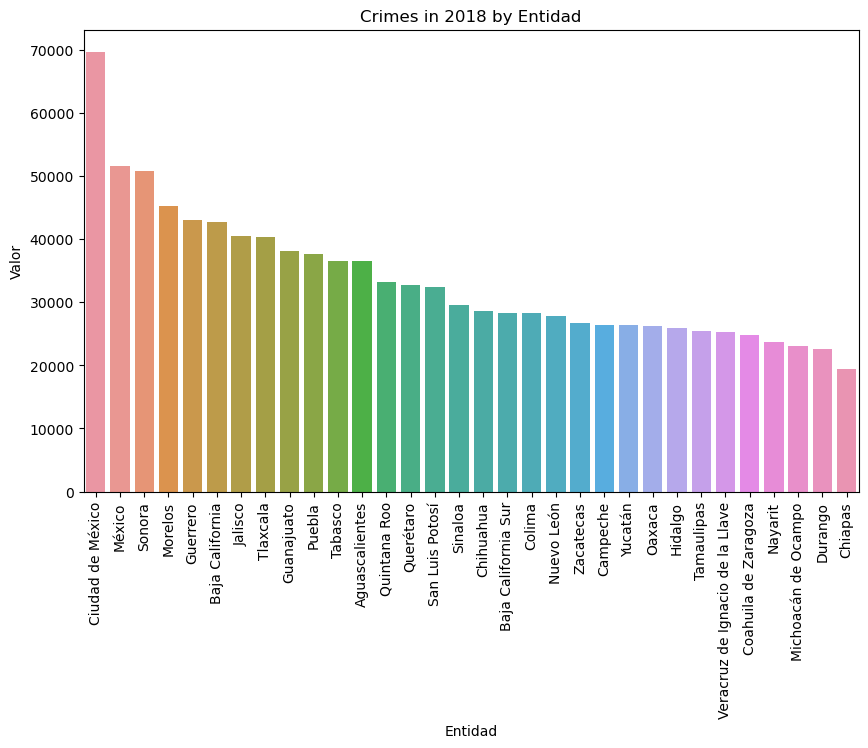

In [10]:
df_2018_sorted = df_2018.sort_values(by='Valor', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Entidad', y='Valor', data=df_2018_sorted)
plt.xticks(rotation=90)
plt.title('Crimes in 2018 by Entidad')
plt.show()

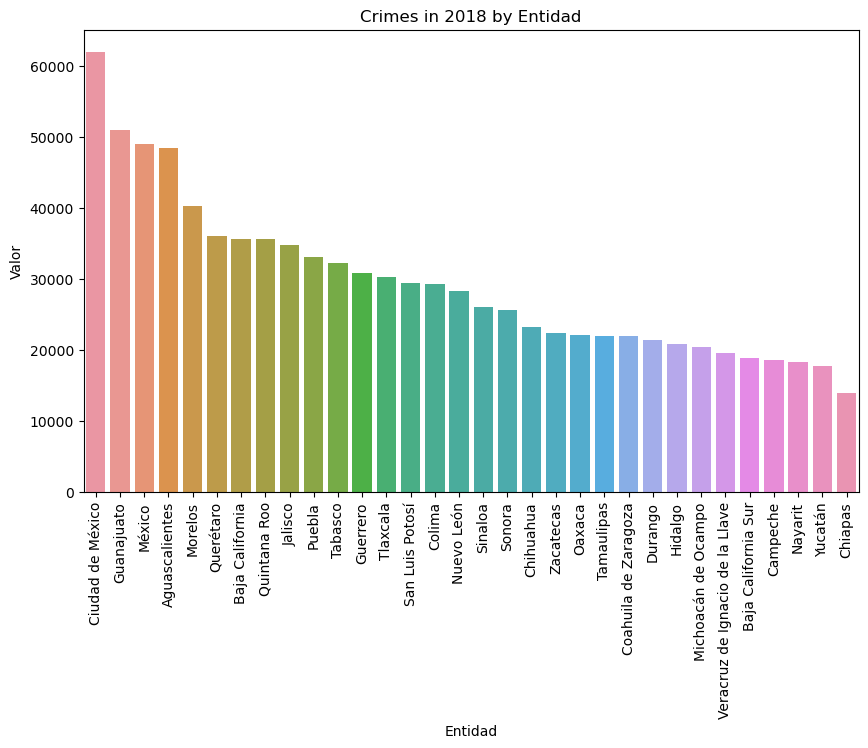

In [11]:
df_2019_sorted = df_2019.sort_values(by='Valor', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Entidad', y='Valor', data=df_2019_sorted)
plt.xticks(rotation=90)
plt.title('Crimes in 2018 by Entidad')
plt.show()

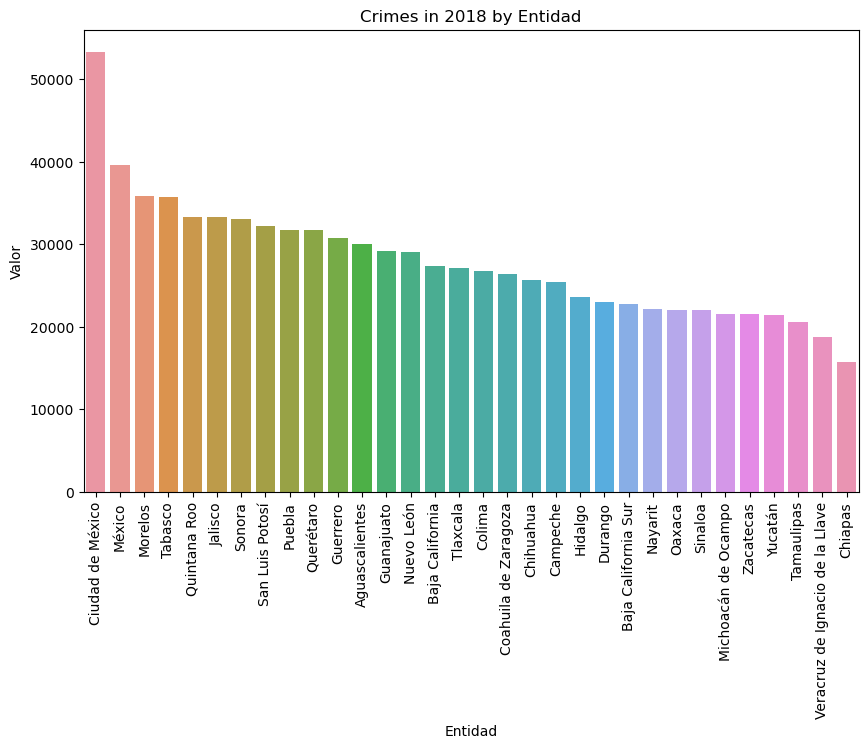

In [12]:
df_2020_sorted = df_2020.sort_values(by='Valor', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Entidad', y='Valor', data=df_2020_sorted)
plt.xticks(rotation=90)
plt.title('Crimes in 2018 by Entidad')
plt.show()

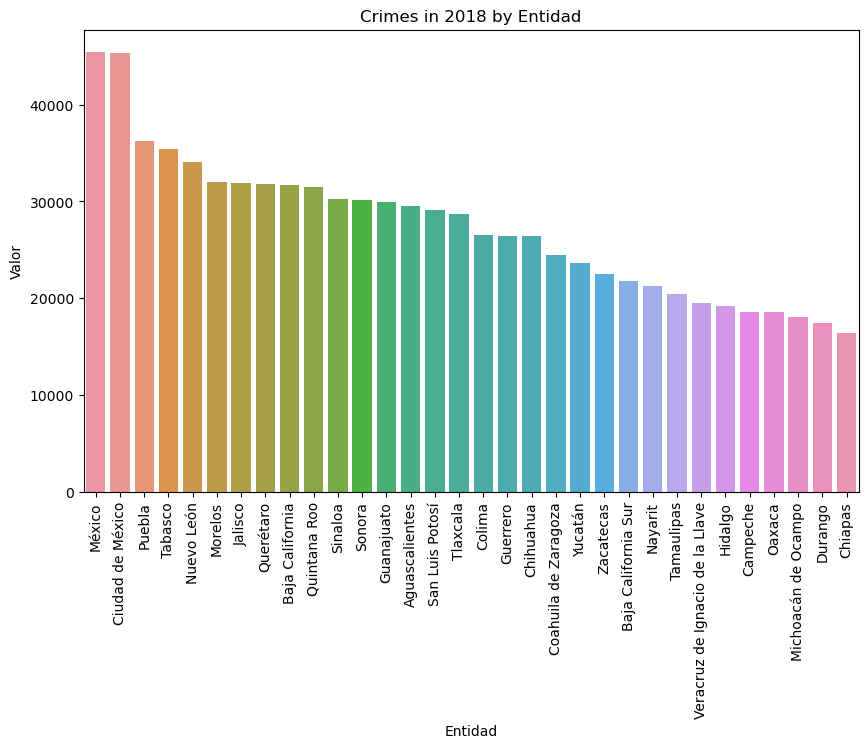

In [13]:
df_2021_sorted = df_2021.sort_values(by='Valor', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Entidad', y='Valor', data=df_2021_sorted)
plt.xticks(rotation=90)
plt.title('Crimes in 2018 by Entidad')
plt.show()

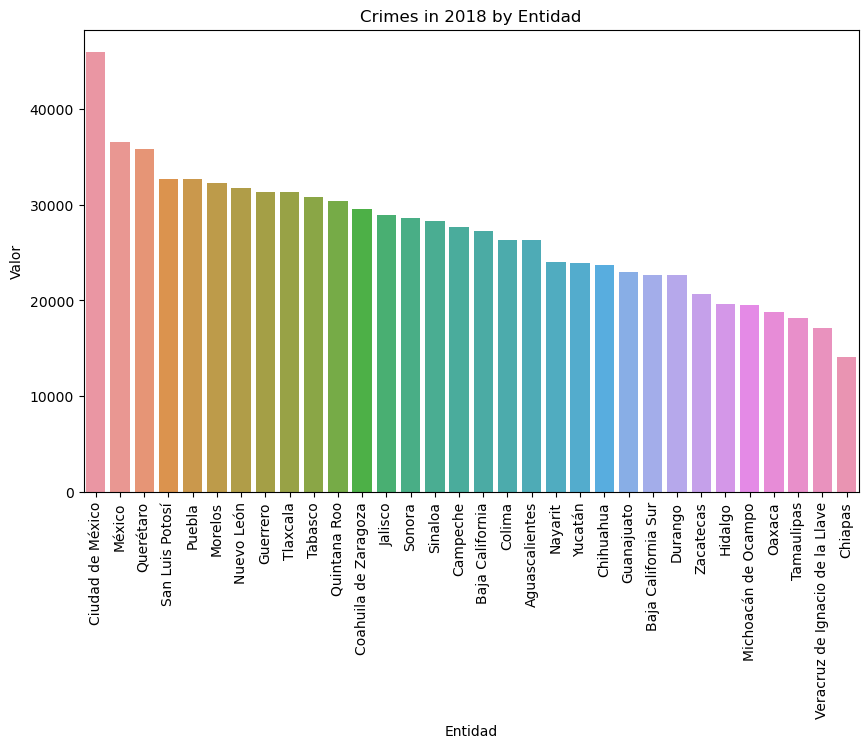

In [14]:
df_2022_sorted = df_2022.sort_values(by='Valor', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Entidad', y='Valor', data=df_2022_sorted)
plt.xticks(rotation=90)
plt.title('Crimes in 2018 by Entidad')
plt.show()

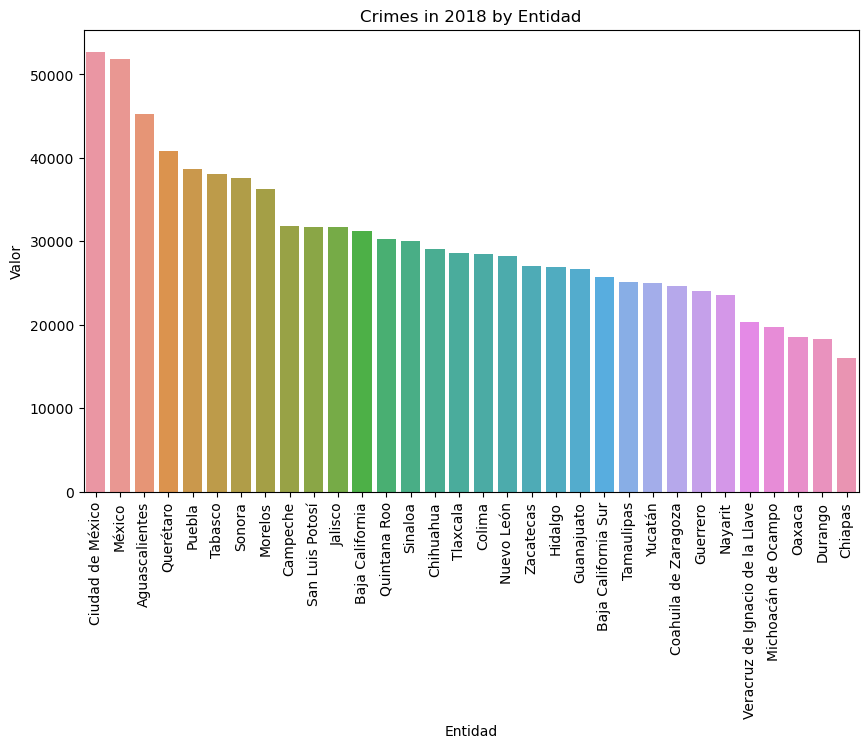

In [15]:
df_2023_sorted = df_2023.sort_values(by='Valor', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Entidad', y='Valor', data=df_2023_sorted)
plt.xticks(rotation=90)
plt.title('Crimes in 2018 by Entidad')
plt.show()

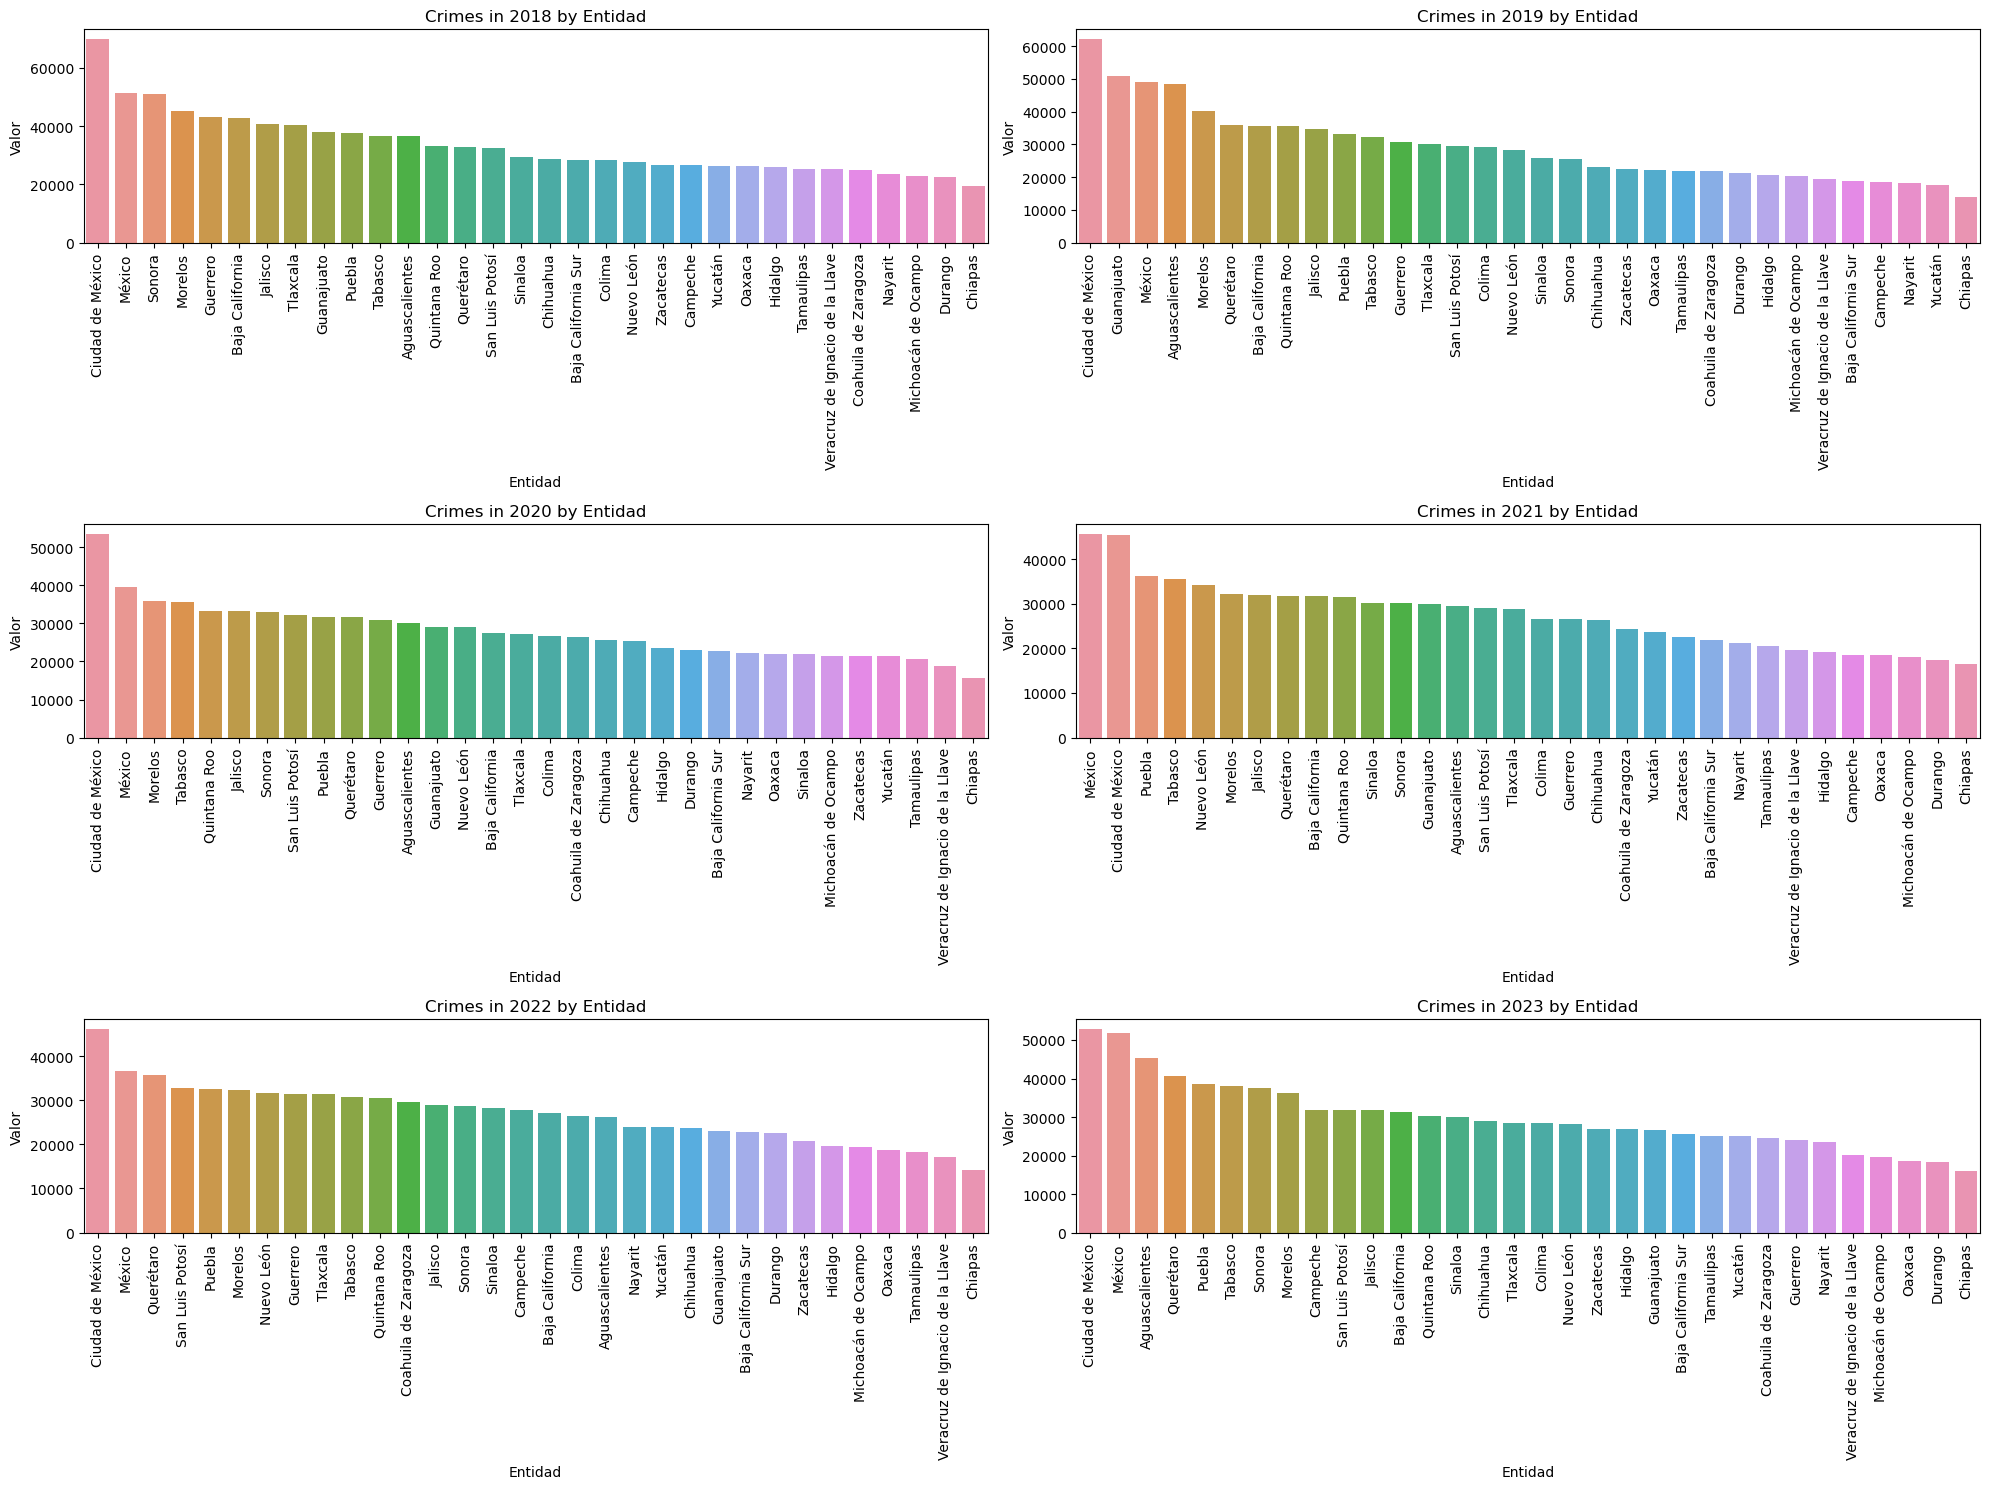

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

# Plot for 2018
df_2018_sorted = df_2018.sort_values(by='Valor', ascending=False)
sns.barplot(ax=axes[0, 0], x='Entidad', y='Valor', data=df_2018_sorted)
axes[0, 0].set_title('Crimes in 2018 by Entidad')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

# Plot for 2019
df_2019_sorted = df_2019.sort_values(by='Valor', ascending=False)
sns.barplot(ax=axes[0, 1], x='Entidad', y='Valor', data=df_2019_sorted)
axes[0, 1].set_title('Crimes in 2019 by Entidad')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)

# Plot for 2020
df_2020_sorted = df_2020.sort_values(by='Valor', ascending=False)
sns.barplot(ax=axes[1, 0], x='Entidad', y='Valor', data=df_2020_sorted)
axes[1, 0].set_title('Crimes in 2020 by Entidad')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)

# Plot for 2021
df_2021_sorted = df_2021.sort_values(by='Valor', ascending=False)
sns.barplot(ax=axes[1, 1], x='Entidad', y='Valor', data=df_2021_sorted)
axes[1, 1].set_title('Crimes in 2021 by Entidad')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)

# Plot for 2022
df_2022_sorted = df_2022.sort_values(by='Valor', ascending=False)
sns.barplot(ax=axes[2, 0], x='Entidad', y='Valor', data=df_2022_sorted)
axes[2, 0].set_title('Crimes in 2022 by Entidad')
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=90)

# Plot for 2023
df_2023_sorted = df_2023.sort_values(by='Valor', ascending=False)
sns.barplot(ax=axes[2, 1], x='Entidad', y='Valor', data=df_2023_sorted)
axes[2, 1].set_title('Crimes in 2023 by Entidad')
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

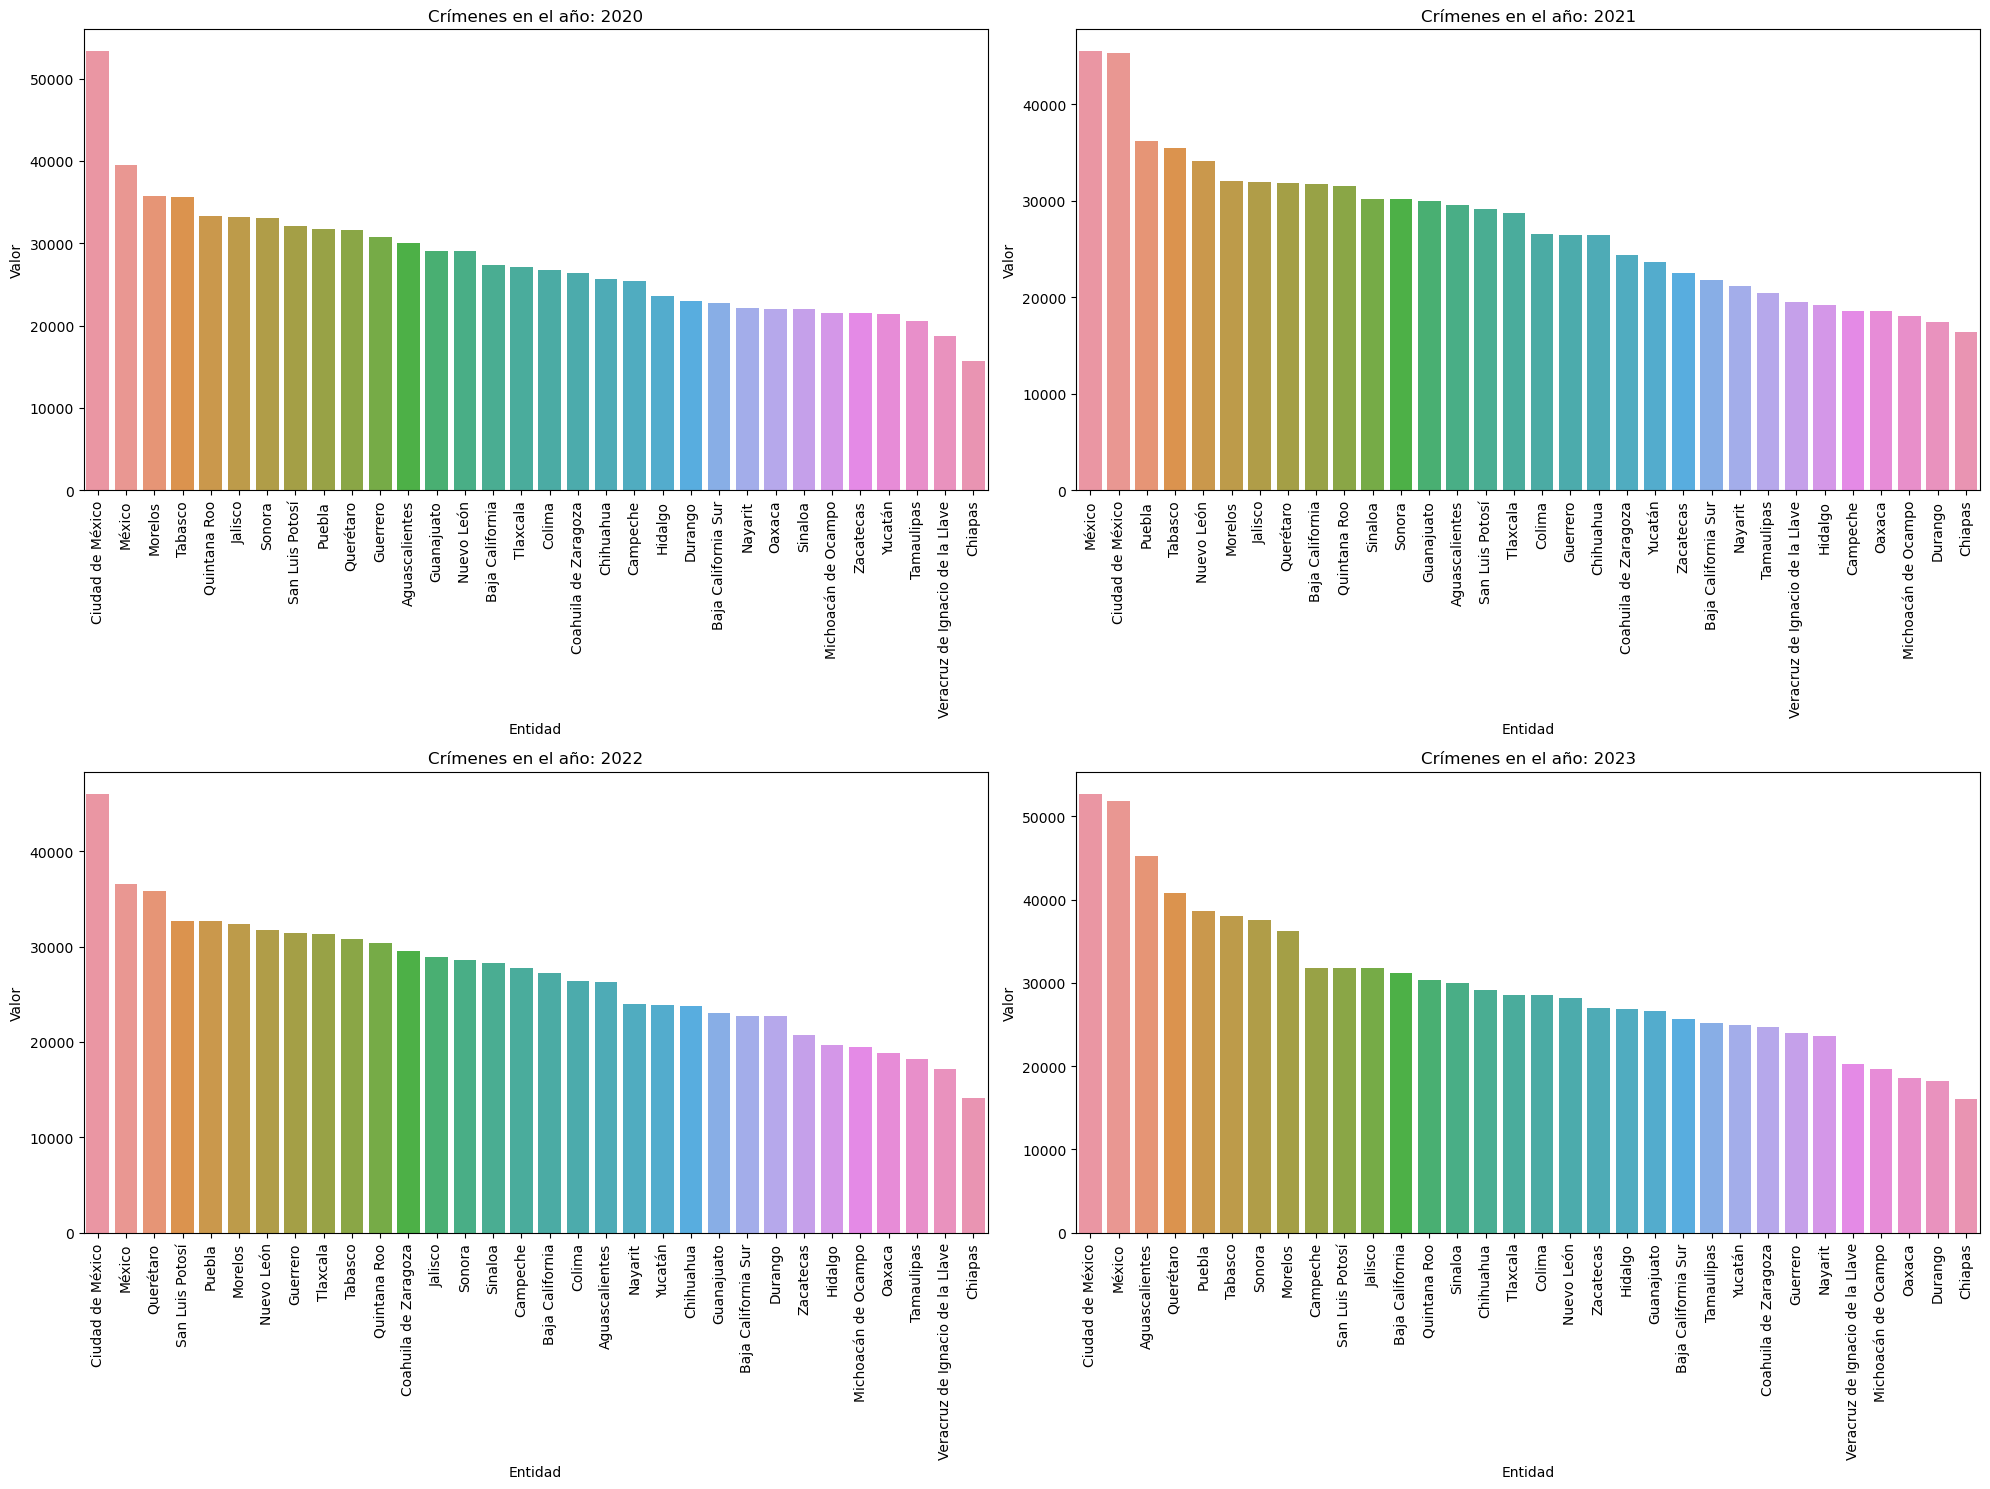

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Plot for 2020
df_2020_sorted = df_2020.sort_values(by='Valor', ascending=False)
sns.barplot(ax=axes[0, 0], x='Entidad', y='Valor', data=df_2020_sorted)
axes[0, 0].set_title('Crímenes en el año: 2020')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

# Plot for 2021
df_2021_sorted = df_2021.sort_values(by='Valor', ascending=False)
sns.barplot(ax=axes[0, 1], x='Entidad', y='Valor', data=df_2021_sorted)
axes[0, 1].set_title('Crímenes en el año: 2021')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)

# Plot for 2022
df_2022_sorted = df_2022.sort_values(by='Valor', ascending=False)
sns.barplot(ax=axes[1, 0], x='Entidad', y='Valor', data=df_2022_sorted)
axes[1, 0].set_title('Crímenes en el año: 2022')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)

# Plot for 2023
df_2023_sorted = df_2023.sort_values(by='Valor', ascending=False)
sns.barplot(ax=axes[1, 1], x='Entidad', y='Valor', data=df_2023_sorted)
axes[1, 1].set_title('Crímenes en el año: 2023')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


In [18]:
df_crime = pd.read_csv('IDEFC_NM_ago24.csv', encoding='latin1') 
df_crime

Año  Clave_Ent         Entidad  \
0      2015          1  Aguascalientes   
1      2015          1  Aguascalientes   
2      2015          1  Aguascalientes   
3      2015          1  Aguascalientes   
4      2015          1  Aguascalientes   
...     ...        ...             ...   
31355  2024         32       Zacatecas   
31356  2024         32       Zacatecas   
31357  2024         32       Zacatecas   
31358  2024         32       Zacatecas   
31359  2024         32       Zacatecas   

                                  Bien jurídico afectado  \
0                       La vida y la Integridad corporal   
1                       La vida y la Integridad corporal   
2                       La vida y la Integridad corporal   
3                       La vida y la Integridad corporal   
4                       La vida y la Integridad corporal   
...                                                  ...   
31355  Otros bienes jurídicos afectados (del fuero co...   
31356  Otros bienes jurídicos afectados (del fuero co...   
31357  Otros bienes jurídicos afectados (del fuero co...   
31358  Otros bienes jurídicos afectados (del fuero co...   
31359  Otros bienes jurídicos afectados (del fuero co...   

                                  Tipo de delito  \
0                                      Homicidio   
1                                      Homicidio   
2                                      Homicidio   
3                                      Homicidio   
4                                      Homicidio   
...                                          ...   
31355                              Falsificación   
31356                   Contra el medio ambiente   
31357  Delitos cometidos por servidores públicos   
31358                                Electorales   
31359              Otros delitos del Fuero Común   

                               Subtipo de delito  \
0                               Homicidio doloso   
1                               Homicidio doloso   
2                               Homicidio doloso   
3                               Homicidio doloso   
4                              Homicidio culposo   
...                                          ...   
31355                              Falsificación   
31356                   Contra el medio ambiente   
31357  Delitos cometidos por servidores públicos   
31358                                Electorales   
31359              Otros delitos del Fuero Común   

                                       Modalidad  Enero  Febrero  Marzo  \
0                              Con arma de fuego      3        0      2   
1                                Con arma blanca      1        1      0   
2                              Con otro elemento      0        0      2   
3                                No especificado      2        0      0   
4                              Con arma de fuego      0        0      0   
...                                          ...    ...      ...    ...   
31355                              Falsificación      3        9     17   
31356                   Contra el medio ambiente      0        0      0   
31357  Delitos cometidos por servidores públicos     21       22     34   
31358                                Electorales      0        1      0   
31359              Otros delitos del Fuero Común    151      184    173   

       Abril  Mayo  Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  \
0          1     1      1      2       1         2.0      2.0        2.0   
1          0     0      1      0       1         0.0      0.0        0.0   
2          2     3      2      0       1         2.0      0.0        0.0   
3          1     0      0      0       0         0.0      0.0        0.0   
4          0     1      0      0       0         0.0      0.0        0.0   
...      ...   ...    ...    ...     ...         ...      ...        ...   
31355     14     8      8      9       9         NaN      NaN        NaN   
31356      0     0     

In [19]:
# Get distinct values of 'Tipo de delito' and 'Subtipo de delito' columns
distinct_tipo_delito = df_crime['Tipo de delito'].unique()
distinct_subtipo_delito = df_crime['Subtipo de delito'].unique()

print("Distinct 'Tipo de delito':")
print(distinct_tipo_delito)

""" print("\nDistinct 'Subtipo de delito':")
print(distinct_subtipo_delito) """

# TODO extorsion.

Distinct 'Tipo de delito':
['Homicidio' 'Lesiones' 'Feminicidio' 'Aborto'
 'Otros delitos que atentan contra la vida y la integridad corporal'
 'Secuestro' 'Tráfico de menores' 'Rapto'
 'Otros delitos que atentan contra la libertad personal' 'Abuso sexual'
 'Acoso sexual' 'Hostigamiento sexual' 'Violación simple'
 'Violación equiparada' 'Incesto'
 'Otros delitos que atentan contra la libertad y la seguridad sexual'
 'Robo' 'Fraude' 'Abuso de confianza' 'Extorsión' 'Daño a la propiedad'
 'Despojo' 'Otros delitos contra el patrimonio' 'Violencia familiar'
 'Violencia de género en todas sus modalidades distinta a la violencia familiar'
 'Incumplimiento de obligaciones de asistencia familiar'
 'Otros delitos contra la familia' 'Corrupción de menores'
 'Trata de personas' 'Otros delitos contra la sociedad' 'Narcomenudeo'
 'Amenazas' 'Allanamiento de morada' 'Evasión de presos' 'Falsedad'
 'Falsificación' 'Contra el medio ambiente'
 'Delitos cometidos por servidores públicos' 'Electorales'
 

' print("\nDistinct \'Subtipo de delito\':")\nprint(distinct_subtipo_delito) '

In [39]:
# Filter the DataFrame to keep only rows where 'Tipo de delito' is 'Extorsión'
df_extorsion = df_crime[df_crime['Subtipo de delito'] == 'Robo a negocio']
df_extorsion

Año  Clave_Ent                          Entidad  \
63     2015          1                   Aguascalientes   
64     2015          1                   Aguascalientes   
161    2015          2                  Baja California   
162    2015          2                  Baja California   
259    2015          3              Baja California Sur   
...     ...        ...                              ...   
31130  2024         30  Veracruz de Ignacio de la Llave   
31227  2024         31                          Yucatán   
31228  2024         31                          Yucatán   
31325  2024         32                        Zacatecas   
31326  2024         32                        Zacatecas   

      Bien jurídico afectado Tipo de delito Subtipo de delito      Modalidad  \
63             El patrimonio           Robo    Robo a negocio  Con violencia   
64             El patrimonio           Robo    Robo a negocio  Sin violencia   
161            El patrimonio           Robo    Robo a negocio  Con violencia   
162            El patrimonio           Robo    Robo a negocio  Sin violencia   
259            El patrimonio           Robo    Robo a negocio  Con violencia   
...                      ...            ...               ...            ...   
31130          El patrimonio           Robo    Robo a negocio  Sin violencia   
31227          El patrimonio           Robo    Robo a negocio  Con violencia   
31228          El patrimonio           Robo    Robo a negocio  Sin violencia   
31325          El patrimonio           Robo    Robo a negocio  Con violencia   
31326          El patrimonio           Robo    Robo a negocio  Sin violencia   

       Enero  Febrero  Marzo  Abril  Mayo  Junio  Julio  Agosto  Septiembre  \
63        10       11     16     14    12      6     13      21        10.0   
64       109       80    123    104   116    106     98     125       113.0   
161      455      383    305    351   314    312    273     282       269.0   
162      161      117    172    152   127    178    139     138       146.0   
259        0        0      0      0     0      0      0       0         0.0   
...      ...      ...    ...    ...   ...    ...    ...     ...         ...   
31130    160      186    202    209   127    145    155     115         NaN   
31227      0        0      0      0     0      0      0       0         NaN   
31228      8        7      7      6    16      4     10      10         NaN   
31325     16       23     19     14    22     12     19      19         NaN   
31326     10       13     12     16    10     12     13      18         NaN   

       Octubre  Noviembre  Diciembre  
63         4.0       14.0       15.0  
64       120.0       97.0      101.0  
161      297.0      236.0      246.0  
162      165.0      139.0      175.0  
259        0.0        0.0        0.0  
...        ...        ...        ...  
31130      NaN        NaN        NaN  
31227      NaN        NaN        NaN  
31228      NaN        NaN        NaN  
31325      NaN        NaN        NaN  
31326      NaN        NaN        NaN  

[640 rows x 19 columns]

In [21]:
df_robo = df_crime[df_crime['Tipo de delito'] == 'Extorsión'] #añadir daño a propiedad, otros delitos contra el patrimonio, amenazas, narcomenudeo


In [22]:
df_crime_DT = df_crime[df_crime['Tipo de delito'] == 'Daño a la propiedad'  ]

In [23]:
df_crime_DT = df_crime[
    (df_crime['Tipo de delito'] == 'Robo') |
    (df_crime['Tipo de delito'] == 'Daño a la propiedad') |
    (df_crime['Tipo de delito'] == 'Otros delitos contra el patrimonio') |
    (df_crime['Tipo de delito'] == 'Amenazas') |
    (df_crime['Tipo de delito'] == 'Narcomenudeo')
]


In [24]:
print(df_crime_DT['Tipo de delito'].unique())

['Robo' 'Daño a la propiedad' 'Otros delitos contra el patrimonio'
 'Narcomenudeo' 'Amenazas']


In [25]:
df_crime_DT.fillna(0, inplace=True)
df_crime_DT

/var/folders/1_/0gj_v5x54fxd8gllt64jsbp80000gn/T/ipykernel_92406/91777272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crime_DT.fillna(0, inplace=True)


Año  Clave_Ent         Entidad  \
39     2015          1  Aguascalientes   
40     2015          1  Aguascalientes   
41     2015          1  Aguascalientes   
42     2015          1  Aguascalientes   
43     2015          1  Aguascalientes   
...     ...        ...             ...   
31336  2024         32       Zacatecas   
31340  2024         32       Zacatecas   
31342  2024         32       Zacatecas   
31350  2024         32       Zacatecas   
31351  2024         32       Zacatecas   

                                  Bien jurídico afectado  \
39                                         El patrimonio   
40                                         El patrimonio   
41                                         El patrimonio   
42                                         El patrimonio   
43                                         El patrimonio   
...                                                  ...   
31336                                      El patrimonio   
31340                                      El patrimonio   
31342                                      El patrimonio   
31350  Otros bienes jurídicos afectados (del fuero co...   
31351  Otros bienes jurídicos afectados (del fuero co...   

                           Tipo de delito                   Subtipo de delito  \
39                                   Robo              Robo a casa habitación   
40                                   Robo              Robo a casa habitación   
41                                   Robo          Robo de vehículo automotor   
42                                   Robo          Robo de vehículo automotor   
43                                   Robo          Robo de vehículo automotor   
...                                   ...                                 ...   
31336                                Robo                         Otros robos   
31340                 Daño a la propiedad                 Daño a la propiedad   
31342  Otros delitos contra el patrimonio  Otros delitos contra el patrimonio   
31350                        Narcomenudeo                        Narcomenudeo   
31351                            Amenazas                            Amenazas   

                                     Modalidad  Enero  Febrero  Marzo  Abril  \
39                               Con violencia      5        3      0      7   
40                               Sin violencia    215      176    202    190   
41     Robo de coche de 4 ruedas Con violencia      4        3      5      4   
42     Robo de coche de 4 ruedas Sin violencia    128      120    138    134   
43           Robo de motocicleta Con violencia      1        0      1      0   
...                                        ...    ...      ...    ...    ...   
31336                            Sin violencia    228      207    182    184   
31340                      Daño a la propiedad    250      241    214    227   
31342       Otros delitos contra el patrimonio      5        4      9      6   
31350                             Narcomenudeo     15       30     17     30   
31351                                 Amenazas    117       90     97     99   

       Mayo  Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  
39        6      8      5       3         4.0      2.0        4.0        7.0  
40      215    228    233     229       202.0    175.0      226.0      180.0  
41        4      2      2       7         5.0      6.0        9.0        5.0  
42      143    105    109     105       141.0    115.0      165.0      182.0  
43        2      0      0       2         0.0      0.0        4.0        0.0  
...     ...    ...    ...     ...         ...      ...        ...        ...  
31336   197    188    196     187         0.0      0.0        0.0        0.0  
31340   263    255    198     197         0.0      0.0        0.0        0.0  
31342     5      6      7       2         0.0      0.0        0.0        0.0  
31350    31     32     43      44         0.0      0.0    

In [26]:
df_extorsion.fillna(0, inplace=True)
df_extorsion

/var/folders/1_/0gj_v5x54fxd8gllt64jsbp80000gn/T/ipykernel_92406/3752990935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extorsion.fillna(0, inplace=True)


Año  Clave_Ent                          Entidad  \
63     2015          1                   Aguascalientes   
64     2015          1                   Aguascalientes   
161    2015          2                  Baja California   
162    2015          2                  Baja California   
259    2015          3              Baja California Sur   
...     ...        ...                              ...   
31130  2024         30  Veracruz de Ignacio de la Llave   
31227  2024         31                          Yucatán   
31228  2024         31                          Yucatán   
31325  2024         32                        Zacatecas   
31326  2024         32                        Zacatecas   

      Bien jurídico afectado Tipo de delito Subtipo de delito      Modalidad  \
63             El patrimonio           Robo    Robo a negocio  Con violencia   
64             El patrimonio           Robo    Robo a negocio  Sin violencia   
161            El patrimonio           Robo    Robo a negocio  Con violencia   
162            El patrimonio           Robo    Robo a negocio  Sin violencia   
259            El patrimonio           Robo    Robo a negocio  Con violencia   
...                      ...            ...               ...            ...   
31130          El patrimonio           Robo    Robo a negocio  Sin violencia   
31227          El patrimonio           Robo    Robo a negocio  Con violencia   
31228          El patrimonio           Robo    Robo a negocio  Sin violencia   
31325          El patrimonio           Robo    Robo a negocio  Con violencia   
31326          El patrimonio           Robo    Robo a negocio  Sin violencia   

       Enero  Febrero  Marzo  Abril  Mayo  Junio  Julio  Agosto  Septiembre  \
63        10       11     16     14    12      6     13      21        10.0   
64       109       80    123    104   116    106     98     125       113.0   
161      455      383    305    351   314    312    273     282       269.0   
162      161      117    172    152   127    178    139     138       146.0   
259        0        0      0      0     0      0      0       0         0.0   
...      ...      ...    ...    ...   ...    ...    ...     ...         ...   
31130    160      186    202    209   127    145    155     115         0.0   
31227      0        0      0      0     0      0      0       0         0.0   
31228      8        7      7      6    16      4     10      10         0.0   
31325     16       23     19     14    22     12     19      19         0.0   
31326     10       13     12     16    10     12     13      18         0.0   

       Octubre  Noviembre  Diciembre  
63         4.0       14.0       15.0  
64       120.0       97.0      101.0  
161      297.0      236.0      246.0  
162      165.0      139.0      175.0  
259        0.0        0.0        0.0  
...        ...        ...        ...  
31130      0.0        0.0        0.0  
31227      0.0        0.0        0.0  
31228      0.0        0.0        0.0  
31325      0.0        0.0        0.0  
31326      0.0        0.0        0.0  

[640 rows x 19 columns]

In [27]:
df_extorsion.columns = df_extorsion.columns.str.strip()


In [28]:
df_crime_DT.columns = df_crime_DT.columns.str.strip()

In [29]:
df_extorsion['total'] = df_extorsion[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 
                                      'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)
df_extorsion

/var/folders/1_/0gj_v5x54fxd8gllt64jsbp80000gn/T/ipykernel_92406/3704318814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extorsion['total'] = df_extorsion[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',


Año  Clave_Ent                          Entidad  \
63     2015          1                   Aguascalientes   
64     2015          1                   Aguascalientes   
161    2015          2                  Baja California   
162    2015          2                  Baja California   
259    2015          3              Baja California Sur   
...     ...        ...                              ...   
31130  2024         30  Veracruz de Ignacio de la Llave   
31227  2024         31                          Yucatán   
31228  2024         31                          Yucatán   
31325  2024         32                        Zacatecas   
31326  2024         32                        Zacatecas   

      Bien jurídico afectado Tipo de delito Subtipo de delito      Modalidad  \
63             El patrimonio           Robo    Robo a negocio  Con violencia   
64             El patrimonio           Robo    Robo a negocio  Sin violencia   
161            El patrimonio           Robo    Robo a negocio  Con violencia   
162            El patrimonio           Robo    Robo a negocio  Sin violencia   
259            El patrimonio           Robo    Robo a negocio  Con violencia   
...                      ...            ...               ...            ...   
31130          El patrimonio           Robo    Robo a negocio  Sin violencia   
31227          El patrimonio           Robo    Robo a negocio  Con violencia   
31228          El patrimonio           Robo    Robo a negocio  Sin violencia   
31325          El patrimonio           Robo    Robo a negocio  Con violencia   
31326          El patrimonio           Robo    Robo a negocio  Sin violencia   

       Enero  Febrero  Marzo  Abril  Mayo  Junio  Julio  Agosto  Septiembre  \
63        10       11     16     14    12      6     13      21        10.0   
64       109       80    123    104   116    106     98     125       113.0   
161      455      383    305    351   314    312    273     282       269.0   
162      161      117    172    152   127    178    139     138       146.0   
259        0        0      0      0     0      0      0       0         0.0   
...      ...      ...    ...    ...   ...    ...    ...     ...         ...   
31130    160      186    202    209   127    145    155     115         0.0   
31227      0        0      0      0     0      0      0       0         0.0   
31228      8        7      7      6    16      4     10      10         0.0   
31325     16       23     19     14    22     12     19      19         0.0   
31326     10       13     12     16    10     12     13      18         0.0   

       Octubre  Noviembre  Diciembre   total  
63         4.0       14.0       15.0   146.0  
64       120.0       97.0      101.0  1292.0  
161      297.0      236.0      246.0  3723.0  
162      165.0      139.0      175.0  1809.0  
259        0.0        0.0        0.0     0.0  
...        ...        ...        ...     ...  
31130      0.0        0.0        0.0  1299.0  
31227      0.0        0.0        0.0     0.0  
31228      0.0        0.0        0.0    68.0  
31325      0.0        0.0        0.0   144.0  
31326      0.0        0.0        0.0   104.0  

[640 rows x 20 columns]

In [30]:
df_crime_DT['total'] = df_crime_DT[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 
                                      'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)
df_crime_DT

/var/folders/1_/0gj_v5x54fxd8gllt64jsbp80000gn/T/ipykernel_92406/1660666350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crime_DT['total'] = df_crime_DT[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',


Año  Clave_Ent         Entidad  \
39     2015          1  Aguascalientes   
40     2015          1  Aguascalientes   
41     2015          1  Aguascalientes   
42     2015          1  Aguascalientes   
43     2015          1  Aguascalientes   
...     ...        ...             ...   
31336  2024         32       Zacatecas   
31340  2024         32       Zacatecas   
31342  2024         32       Zacatecas   
31350  2024         32       Zacatecas   
31351  2024         32       Zacatecas   

                                  Bien jurídico afectado  \
39                                         El patrimonio   
40                                         El patrimonio   
41                                         El patrimonio   
42                                         El patrimonio   
43                                         El patrimonio   
...                                                  ...   
31336                                      El patrimonio   
31340                                      El patrimonio   
31342                                      El patrimonio   
31350  Otros bienes jurídicos afectados (del fuero co...   
31351  Otros bienes jurídicos afectados (del fuero co...   

                           Tipo de delito                   Subtipo de delito  \
39                                   Robo              Robo a casa habitación   
40                                   Robo              Robo a casa habitación   
41                                   Robo          Robo de vehículo automotor   
42                                   Robo          Robo de vehículo automotor   
43                                   Robo          Robo de vehículo automotor   
...                                   ...                                 ...   
31336                                Robo                         Otros robos   
31340                 Daño a la propiedad                 Daño a la propiedad   
31342  Otros delitos contra el patrimonio  Otros delitos contra el patrimonio   
31350                        Narcomenudeo                        Narcomenudeo   
31351                            Amenazas                            Amenazas   

                                     Modalidad  Enero  Febrero  Marzo  Abril  \
39                               Con violencia      5        3      0      7   
40                               Sin violencia    215      176    202    190   
41     Robo de coche de 4 ruedas Con violencia      4        3      5      4   
42     Robo de coche de 4 ruedas Sin violencia    128      120    138    134   
43           Robo de motocicleta Con violencia      1        0      1      0   
...                                        ...    ...      ...    ...    ...   
31336                            Sin violencia    228      207    182    184   
31340                      Daño a la propiedad    250      241    214    227   
31342       Otros delitos contra el patrimonio      5        4      9      6   
31350                             Narcomenudeo     15       30     17     30   
31351                                 Amenazas    117       90     97     99   

       Mayo  Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  \
39        6      8      5       3         4.0      2.0        4.0        7.0   
40      215    228    233     229       202.0    175.0      226.0      180.0   
41        4      2      2       7         5.0      6.0        9.0        5.0   
42      143    105    109     105       141.0    115.0      165.0      182.0   
43        2      0      0       2         0.0      0.0        4.0        0.0   
...     ...    ...    ...     ...         ...      ...        ...        ...   
31336   197    188    196     187         0.0      0.0        0.0        0.0   
31340   263    255    198     197         0.0      0.0        0.0        0.0   
31342     5      6      7       2         0.0      0.0        0.0        0.0   
31350    31     32     43      44         0.0   

In [31]:
df_crime_DT_copy = df_crime_DT.copy()

# Agrupar por las columnas no numéricas, excepto la columna 'Modalidad', y sumar las columnas numéricas
suma_por_entidad = df_crime_DT.groupby(['Año', 'Clave_Ent', 'Entidad', 'Bien jurídico afectado', 'Tipo de delito', 'Subtipo de delito']).sum()

# Convertir la agrupación en un dataframe y restablecer el índice
suma_por_entidad = suma_por_entidad.reset_index()

# Añadir la columna 'Modalidad' con el valor "suma total"
suma_por_entidad['Modalidad'] = 'suma total'

# Concatenar el nuevo registro con el dataframe original
df_crime_DT_final = pd.concat([df_crime_DT_copy, suma_por_entidad], ignore_index=True)

In [32]:
df_crime_DT_final

Año  Clave_Ent         Entidad  \
0      2015          1  Aguascalientes   
1      2015          1  Aguascalientes   
2      2015          1  Aguascalientes   
3      2015          1  Aguascalientes   
4      2015          1  Aguascalientes   
...     ...        ...             ...   
18555  2024         32       Zacatecas   
18556  2024         32       Zacatecas   
18557  2024         32       Zacatecas   
18558  2024         32       Zacatecas   
18559  2024         32       Zacatecas   

                                  Bien jurídico afectado Tipo de delito  \
0                                          El patrimonio           Robo   
1                                          El patrimonio           Robo   
2                                          El patrimonio           Robo   
3                                          El patrimonio           Robo   
4                                          El patrimonio           Robo   
...                                                  ...            ...   
18555                                      El patrimonio           Robo   
18556                                      El patrimonio           Robo   
18557                                      El patrimonio           Robo   
18558  Otros bienes jurídicos afectados (del fuero co...       Amenazas   
18559  Otros bienes jurídicos afectados (del fuero co...   Narcomenudeo   

                           Subtipo de delito  \
0                     Robo a casa habitación   
1                     Robo a casa habitación   
2                 Robo de vehículo automotor   
3                 Robo de vehículo automotor   
4                 Robo de vehículo automotor   
...                                      ...   
18555          Robo en transporte individual   
18556   Robo en transporte público colectivo   
18557  Robo en transporte público individual   
18558                               Amenazas   
18559                           Narcomenudeo   

                                     Modalidad  Enero  Febrero  Marzo  Abril  \
0                                Con violencia      5        3      0      7   
1                                Sin violencia    215      176    202    190   
2      Robo de coche de 4 ruedas Con violencia      4        3      5      4   
3      Robo de coche de 4 ruedas Sin violencia    128      120    138    134   
4            Robo de motocicleta Con violencia      1        0      1      0   
...                                        ...    ...      ...    ...    ...   
18555                               suma total      1        0      0      0   
18556                               suma total      0        0      1      0   
18557                               suma total      0        0      0      1   
18558                               suma total    117       90     97     99   
18559                               suma total     15       30     17     30   

       Mayo  Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  \
0         6      8      5       3         4.0      2.0        4.0        7.0   
1       215    228    233     229       202.0    175.0      226.0      180.0   
2         4      2      2       7         5.0      6.0        9.0        5.0   
3       143    105    109     105       141.0    115.0      165.0      182.0   
4         2      0      0       2         0.0      0.0        4.0        0.0   
...     ...    ...    ...     ...         ...      ...        ...        ...   
18555     1      0      1       1         0.0      0.0        0.0        0.0   
18556     0      0      0       0         0.0      0.0        0.0        0.0   
18557     0      0      1       1         0.0      0.0        0.0        0.0   
18558   148    139    102     100         0.0      0.0        0.0        0.0   
18559    31     32     43      44         0.0      0.0        0.0        0.0   

        total  
0        54.0  
1      2471.0  
2        56.0  
3      1585.0  
4        10.0  
...    

In [33]:
df_crime_DT_final = df_crime_DT_final[df_crime_DT_final['Modalidad'] == 'suma total']
df_crime_DT_final

Año  Clave_Ent         Entidad  \
12800  2015          1  Aguascalientes   
12801  2015          1  Aguascalientes   
12802  2015          1  Aguascalientes   
12803  2015          1  Aguascalientes   
12804  2015          1  Aguascalientes   
...     ...        ...             ...   
18555  2024         32       Zacatecas   
18556  2024         32       Zacatecas   
18557  2024         32       Zacatecas   
18558  2024         32       Zacatecas   
18559  2024         32       Zacatecas   

                                  Bien jurídico afectado  \
12800                                      El patrimonio   
12801                                      El patrimonio   
12802                                      El patrimonio   
12803                                      El patrimonio   
12804                                      El patrimonio   
...                                                  ...   
18555                                      El patrimonio   
18556                                      El patrimonio   
18557                                      El patrimonio   
18558  Otros bienes jurídicos afectados (del fuero co...   
18559  Otros bienes jurídicos afectados (del fuero co...   

                           Tipo de delito  \
12800                 Daño a la propiedad   
12801  Otros delitos contra el patrimonio   
12802                                Robo   
12803                                Robo   
12804                                Robo   
...                                   ...   
18555                                Robo   
18556                                Robo   
18557                                Robo   
18558                            Amenazas   
18559                        Narcomenudeo   

                           Subtipo de delito   Modalidad  Enero  Febrero  \
12800                    Daño a la propiedad  suma total    201      180   
12801     Otros delitos contra el patrimonio  suma total      0        0   
12802                            Otros robos  suma total    104      103   
12803                 Robo a casa habitación  suma total    220      179   
12804            Robo a institución bancaria  suma total      1        0   
...                                      ...         ...    ...      ...   
18555          Robo en transporte individual  suma total      1        0   
18556   Robo en transporte público colectivo  suma total      0        0   
18557  Robo en transporte público individual  suma total      0        0   
18558                               Amenazas  suma total    117       90   
18559                           Narcomenudeo  suma total     15       30   

       Marzo  Abril  Mayo  Junio  Julio  Agosto  Septiembre  Octubre  \
12800    182    160   121    166    160     151       178.0    133.0   
12801      0      0     0      0      0       0         0.0      0.0   
12802    109     93   237    203    219     201       214.0    216.0   
12803    202    197   221    236    238     232       206.0    177.0   
12804      1      0     0      0      0       0         0.0      0.0   
...      ...    ...   ...    ...    ...     ...         ...      ...   
18555      0      0     1      0      1       1         0.0      0.0   
18556      1      0     0      0      0       0         0.0      0.0   
18557      0      1     0      0      1       1         0.0      0.0   
18558     97     99   148    139    102     100         0.0      0.0   
18559     17     30    31     32     43      44         0.0      0.0   

       Noviembre  Diciembre   total  
12800      121.0      107.0  1860.0  
12801        1.0        0.0     1.0  
12802      218.0      210.0  2127.0  
12803      230.0      187.0  2525.0  
12804        0.0        0.0     2.0  
...          ...        ...     ...  
18555        0.0        0.0     4.0  
18556        0.0        0.0     1.0  
18557        0.0        0.0     3.0  
18558        0.0        0.0   892.0  
18559        0.0        0.0   242.0  

[5760 

In [34]:
df_extorsion_copy = df_extorsion.copy()

# Agrupar por las columnas no numéricas, excepto la columna 'Modalidad', y sumar las columnas numéricas
suma_por_entidad = df_extorsion.groupby(['Año', 'Clave_Ent', 'Entidad', 'Bien jurídico afectado', 'Tipo de delito', 'Subtipo de delito']).sum()

# Convertir la agrupación en un dataframe y restablecer el índice
suma_por_entidad = suma_por_entidad.reset_index()

# Añadir la columna 'Modalidad' con el valor "suma total"
suma_por_entidad['Modalidad'] = 'suma total'

# Concatenar el nuevo registro con el dataframe original
df_extorsion_final = pd.concat([df_extorsion, suma_por_entidad], ignore_index=True)

In [35]:
df_extorsion_final = df_extorsion_final[df_extorsion_final['Modalidad'] == 'suma total']
df_extorsion_final

Año  Clave_Ent                          Entidad Bien jurídico afectado  \
640  2015          1                   Aguascalientes          El patrimonio   
641  2015          2                  Baja California          El patrimonio   
642  2015          3              Baja California Sur          El patrimonio   
643  2015          4                         Campeche          El patrimonio   
644  2015          5             Coahuila de Zaragoza          El patrimonio   
..    ...        ...                              ...                    ...   
955  2024         28                       Tamaulipas          El patrimonio   
956  2024         29                         Tlaxcala          El patrimonio   
957  2024         30  Veracruz de Ignacio de la Llave          El patrimonio   
958  2024         31                          Yucatán          El patrimonio   
959  2024         32                        Zacatecas          El patrimonio   

    Tipo de delito Subtipo de delito   Modalidad  Enero  Febrero  Marzo  \
640           Robo    Robo a negocio  suma total    119       91    139   
641           Robo    Robo a negocio  suma total    616      500    477   
642           Robo    Robo a negocio  suma total      1        0      0   
643           Robo    Robo a negocio  suma total      4        3     10   
644           Robo    Robo a negocio  suma total    356      242    246   
..             ...               ...         ...    ...      ...    ...   
955           Robo    Robo a negocio  suma total    188      162    142   
956           Robo    Robo a negocio  suma total     18       16     14   
957           Robo    Robo a negocio  suma total    402      404    369   
958           Robo    Robo a negocio  suma total      8        7      7   
959           Robo    Robo a negocio  suma total     26       36     31   

     Abril  Mayo  Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  \
640    118   128    112    111     146       123.0    124.0      111.0   
641    503   441    490    412     420       415.0    462.0      375.0   
642      0     0      0      2       1         0.0      0.0        0.0   
643      3     6      5      8      10         3.0      5.0        3.0   
644    310   249    251    251     187       197.0    169.0       75.0   
..     ...   ...    ...    ...     ...         ...      ...        ...   
955    141   107    142    125     106         0.0      0.0        0.0   
956     11     7     14     17      18         0.0      0.0        0.0   
957    345   257    285    344     231         0.0      0.0        0.0   
958      6    16      4     10      10         0.0      0.0        0.0   
959     30    32     24     32      37         0.0      0.0        0.0   

     Diciembre   total  
640      116.0  1438.0  
641      421.0  5532.0  
642        0.0     4.0  
643        8.0    68.0  
644       79.0  2612.0  
..         ...     ...  
955        0.0  1113.0  
956        0.0   115.0  
957        0.0  2637.0  
958        0.0    68.0  
959        0.0   248.0  

[320 rows x 20 columns]

In [36]:
aux1= df_crime_DT_final

In [37]:
aux1 = aux1.drop(columns=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre', "Modalidad"])
aux1

Año  Clave_Ent         Entidad  \
12800  2015          1  Aguascalientes   
12801  2015          1  Aguascalientes   
12802  2015          1  Aguascalientes   
12803  2015          1  Aguascalientes   
12804  2015          1  Aguascalientes   
...     ...        ...             ...   
18555  2024         32       Zacatecas   
18556  2024         32       Zacatecas   
18557  2024         32       Zacatecas   
18558  2024         32       Zacatecas   
18559  2024         32       Zacatecas   

                                  Bien jurídico afectado  \
12800                                      El patrimonio   
12801                                      El patrimonio   
12802                                      El patrimonio   
12803                                      El patrimonio   
12804                                      El patrimonio   
...                                                  ...   
18555                                      El patrimonio   
18556                                      El patrimonio   
18557                                      El patrimonio   
18558  Otros bienes jurídicos afectados (del fuero co...   
18559  Otros bienes jurídicos afectados (del fuero co...   

                           Tipo de delito  \
12800                 Daño a la propiedad   
12801  Otros delitos contra el patrimonio   
12802                                Robo   
12803                                Robo   
12804                                Robo   
...                                   ...   
18555                                Robo   
18556                                Robo   
18557                                Robo   
18558                            Amenazas   
18559                        Narcomenudeo   

                           Subtipo de delito   total  
12800                    Daño a la propiedad  1860.0  
12801     Otros delitos contra el patrimonio     1.0  
12802                            Otros robos  2127.0  
12803                 Robo a casa habitación  2525.0  
12804            Robo a institución bancaria     2.0  
...                                      ...     ...  
18555          Robo en transporte individual     4.0  
18556   Robo en transporte público colectivo     1.0  
18557  Robo en transporte público individual     3.0  
18558                               Amenazas   892.0  
18559                           Narcomenudeo   242.0  

[5760 rows x 7 columns]

In [ ]:
# Drop all month columns from the aux DataFrame
aux = aux.drop(columns=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre', "Modalidad"])
aux

In [40]:
df_2018_1 = aux1[aux1['Año'] == 2018]
df_2019_1 = aux1[aux1['Año'] == 2019]
df_2020_1 = aux1[aux1['Año'] == 2020]
df_2021_1 = aux1[aux1['Año'] == 2021]
df_2022_1= aux1[aux1['Año'] == 2022]
df_2023_1 = aux1[aux1['Año'] == 2023]
df_2024_1= aux1[aux1['Año'] == 2024]

In [41]:
df_2019_1["Tipo de delito"].unique()

array(['Daño a la propiedad', 'Otros delitos contra el patrimonio',
       'Robo', 'Amenazas', 'Narcomenudeo'], dtype=object)

In [ ]:
df_2019_1["Subtipo de delito"].unique()
""" 'Robo de autopartes', 'Robo de ganado', 'Robo de maquinaria',
       'Robo de vehículo automotor', 'Robo en transporte individual',
       'Robo en transporte público colectivo',
       'Robo en transporte público individual' """

In [42]:
df_2019_1["Subtipo de delito"].unique()
#df_2019_1["Tipo de delito"].unique()

array(['Daño a la propiedad', 'Otros delitos contra el patrimonio',
       'Otros robos', 'Robo a casa habitación',
       'Robo a institución bancaria', 'Robo a negocio',
       'Robo a transeúnte en espacio abierto al público',
       'Robo a transeúnte en vía pública', 'Robo a transportista',
       'Robo de autopartes', 'Robo de ganado', 'Robo de maquinaria',
       'Robo de vehículo automotor', 'Robo en transporte individual',
       'Robo en transporte público colectivo',
       'Robo en transporte público individual', 'Amenazas',
       'Narcomenudeo'], dtype=object)

In [46]:
""" df_2019_1_filtered = df_2019_1[df_2019_1['Subtipo de delito'].isin([
    'Daño a la propiedad', 
    'Otros delitos contra el patrimonio', 
    'Otros robos', 
    'Robo a transportista', 
    'Amenazas'
])] """
df_2019_1_filtered["Subtipo de delito"].unique()

array(['Daño a la propiedad', 'Otros delitos contra el patrimonio',
       'Otros robos', 'Robo a transportista', 'Amenazas', 'Narcomenudeo'],
      dtype=object)

In [47]:
df_2018_1_filtered["Subtipo de delito"].unique()

array(['Daño a la propiedad', 'Otros delitos contra el patrimonio',
       'Otros robos', 'Robo a transportista', 'Amenazas', 'Narcomenudeo'],
      dtype=object)

In [45]:
# Filtrar df_2018_1
df_2018_1_filtered = df_2018_1[df_2018_1['Subtipo de delito'].isin([
    'Daño a la propiedad', 
    'Otros delitos contra el patrimonio', 
    'Otros robos', 
    'Robo a transportista', 
    'Amenazas', 
    'Narcomenudeo'
])]

df_2019_1_filtered = df_2019_1[df_2019_1['Subtipo de delito'].isin([
    'Daño a la propiedad', 
    'Otros delitos contra el patrimonio', 
    'Otros robos', 
    'Robo a transportista', 
    'Amenazas', 
    'Narcomenudeo'
])]


# Filtrar df_2020_1
df_2020_1_filtered = df_2020_1[df_2020_1['Subtipo de delito'].isin([
    'Daño a la propiedad', 
    'Otros delitos contra el patrimonio', 
    'Otros robos', 
    'Robo a transportista', 
    'Amenazas',
    'Narcomenudeo'
])]

# Filtrar df_2021_1
df_2021_1_filtered = df_2021_1[df_2021_1['Subtipo de delito'].isin([
    'Daño a la propiedad', 
    'Otros delitos contra el patrimonio', 
    'Otros robos', 
    'Robo a transportista', 
    'Amenazas',
    'Narcomenudeo'
])]

# Filtrar df_2022_1
df_2022_1_filtered = df_2022_1[df_2022_1['Subtipo de delito'].isin([
    'Daño a la propiedad', 
    'Otros delitos contra el patrimonio', 
    'Otros robos', 
    'Robo a transportista', 
    'Amenazas'
    , 'Narcomenudeo'
])]

# Filtrar df_2023_1
df_2023_1_filtered = df_2023_1[df_2023_1['Subtipo de delito'].isin([
    'Daño a la propiedad', 
    'Otros delitos contra el patrimonio', 
    'Otros robos', 
    'Robo a transportista', 
    'Amenazas',
    'Narcomenudeo'
])]

# Filtrar df_2024_1
df_2024_1_filtered = df_2024_1[df_2024_1['Subtipo de delito'].isin([
    'Daño a la propiedad', 
    'Otros delitos contra el patrimonio', 
    'Otros robos', 
    'Robo a transportista', 
    'Amenazas',
    'Narcomenudeo'
])]


In [48]:

print(df_2018_1_filtered["Tipo de delito"].unique(), df_2018_1_filtered["Subtipo de delito"].unique())
print(df_2019_1_filtered["Tipo de delito"].unique(), df_2019_1_filtered["Subtipo de delito"].unique())
print(df_2020_1_filtered["Tipo de delito"].unique(), df_2020_1_filtered["Subtipo de delito"].unique())
print(df_2021_1_filtered["Tipo de delito"].unique(), df_2021_1_filtered["Subtipo de delito"].unique())
print(df_2022_1_filtered["Tipo de delito"].unique(), df_2022_1_filtered["Subtipo de delito"].unique())
print(df_2023_1_filtered["Tipo de delito"].unique(), df_2023_1_filtered["Subtipo de delito"].unique())
print(df_2024_1_filtered["Tipo de delito"].unique(), df_2024_1_filtered["Subtipo de delito"].unique())


['Daño a la propiedad' 'Otros delitos contra el patrimonio' 'Robo'
 'Amenazas' 'Narcomenudeo'] ['Daño a la propiedad' 'Otros delitos contra el patrimonio' 'Otros robos'
 'Robo a transportista' 'Amenazas' 'Narcomenudeo']
['Daño a la propiedad' 'Otros delitos contra el patrimonio' 'Robo'
 'Amenazas' 'Narcomenudeo'] ['Daño a la propiedad' 'Otros delitos contra el patrimonio' 'Otros robos'
 'Robo a transportista' 'Amenazas' 'Narcomenudeo']
['Daño a la propiedad' 'Otros delitos contra el patrimonio' 'Robo'
 'Amenazas' 'Narcomenudeo'] ['Daño a la propiedad' 'Otros delitos contra el patrimonio' 'Otros robos'
 'Robo a transportista' 'Amenazas' 'Narcomenudeo']
['Daño a la propiedad' 'Otros delitos contra el patrimonio' 'Robo'
 'Amenazas' 'Narcomenudeo'] ['Daño a la propiedad' 'Otros delitos contra el patrimonio' 'Otros robos'
 'Robo a transportista' 'Amenazas' 'Narcomenudeo']
['Daño a la propiedad' 'Otros delitos contra el patrimonio' 'Robo'
 'Amenazas' 'Narcomenudeo'] ['Daño a la propiedad' 'O

KeyError: 'total'

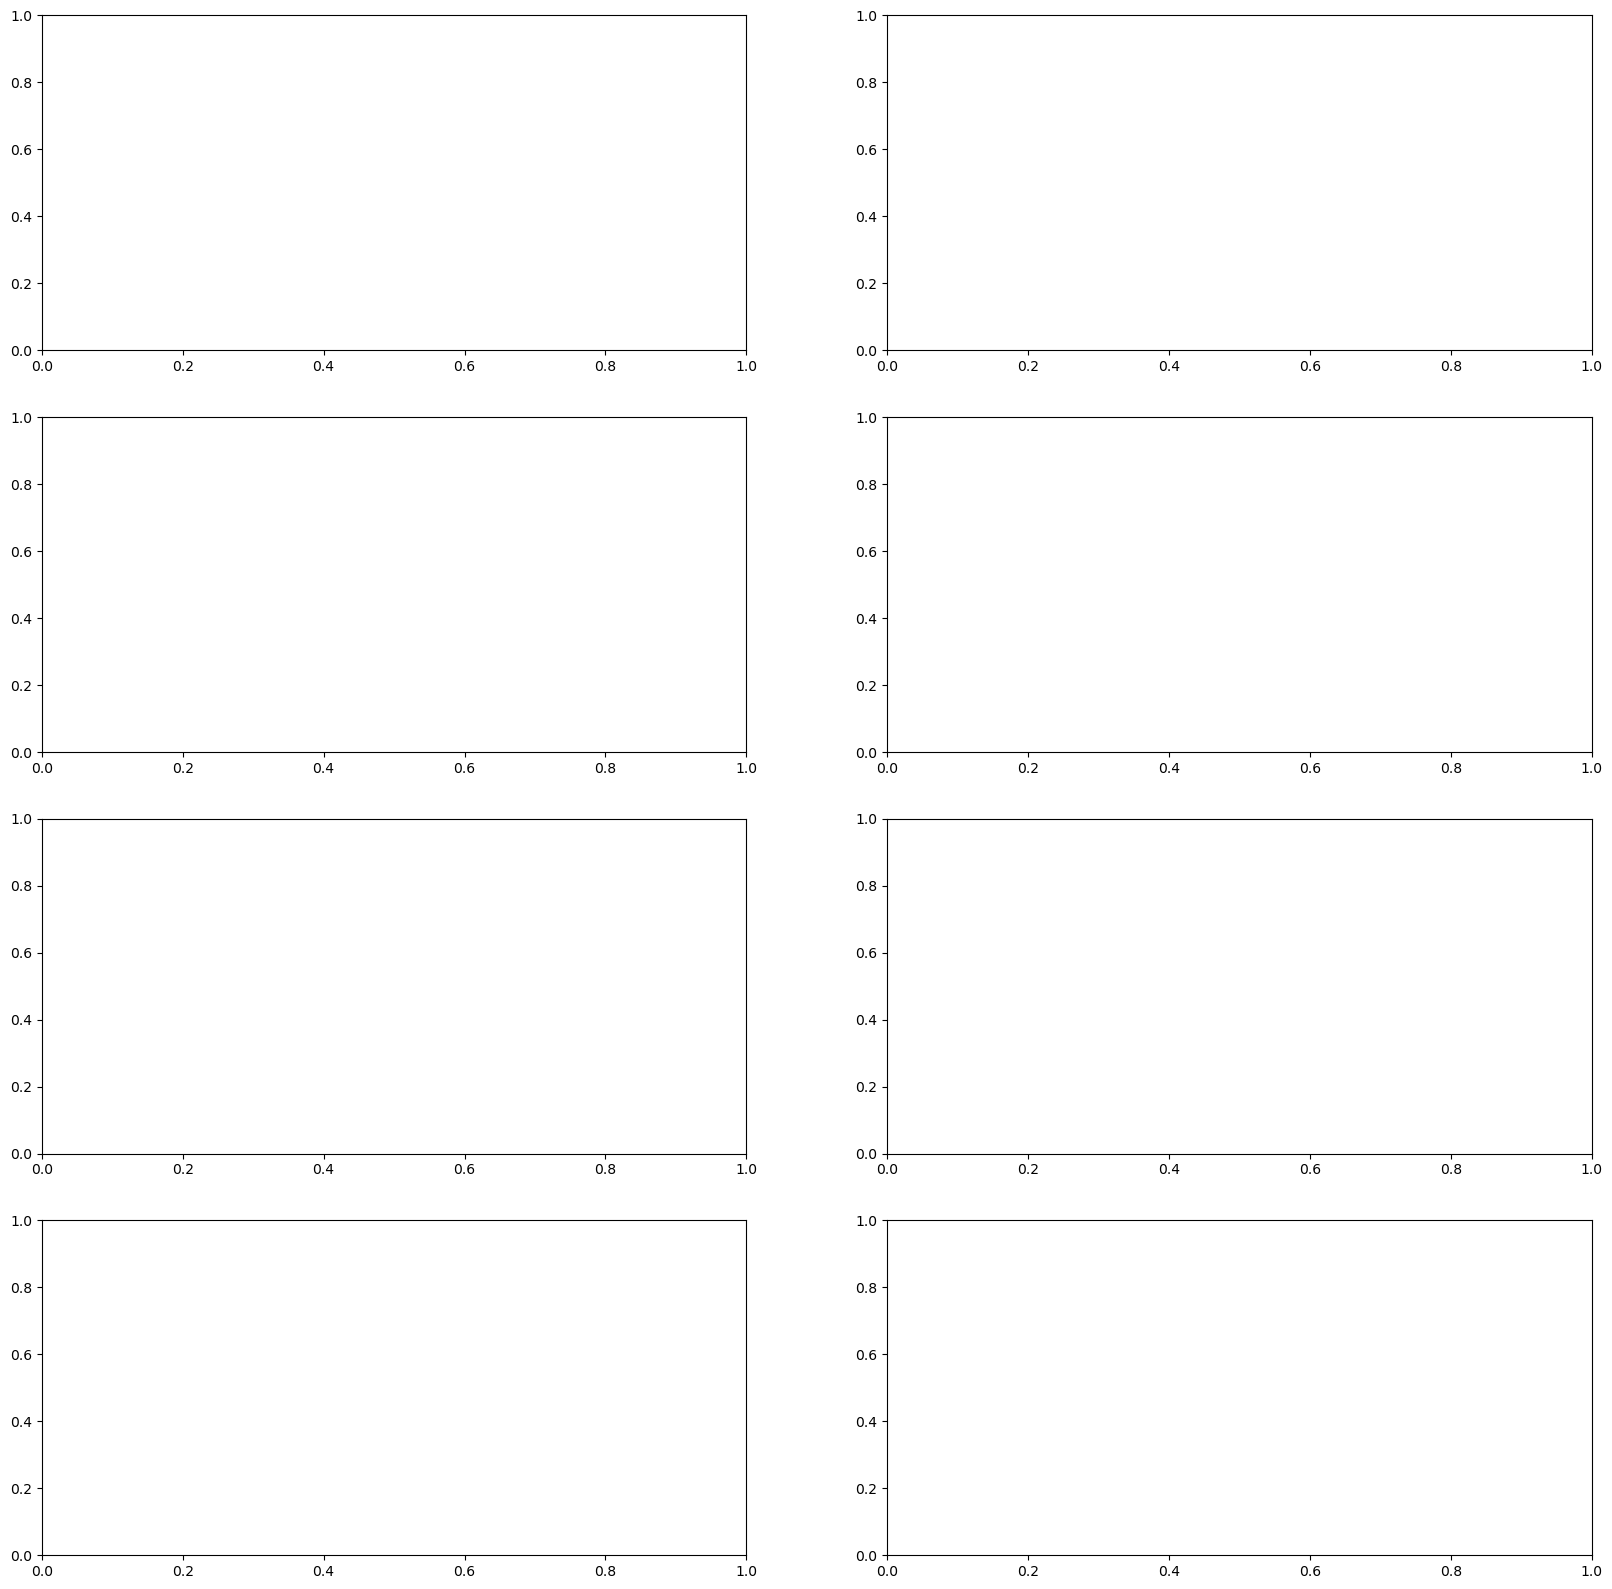

In [49]:
# Crear la figura con subplots (4 filas, 2 columnas)
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

# Gráfica para 2017
# Gráfica para 2018
df_2018_sorted = df_2018.sort_values(by='total', ascending=False)
sns.barplot(ax=axes[0, 1], x='Entidad', y='total', data=df_2018_sorted)
axes[0, 1].set_title('Total de casos por entidad en 2018')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)

# Gráfica para 2019
df_2019_sorted = df_2019.sort_values(by='total', ascending=False)
sns.barplot(ax=axes[1, 0], x='Entidad', y='total', data=df_2019_sorted)
axes[1, 0].set_title('Total de casos por entidad en 2019')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)

# Gráfica para 2020
df_2020_sorted = df_2020.sort_values(by='total', ascending=False)
sns.barplot(ax=axes[1, 1], x='Entidad', y='total', data=df_2020_sorted)
axes[1, 1].set_title('Total de casos por entidad en 2020')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)

# Gráfica para 2021
df_2021_sorted = df_2021.sort_values(by='total', ascending=False)
sns.barplot(ax=axes[2, 0], x='Entidad', y='total', data=df_2021_sorted)
axes[2, 0].set_title('Total de casos por entidad en 2021')
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=90)

# Gráfica para 2022
df_2022_sorted = df_2022.sort_values(by='total', ascending=False)
sns.barplot(ax=axes[2, 1], x='Entidad', y='total', data=df_2022_sorted)
axes[2, 1].set_title('Total de casos por entidad en 2022')
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=90)

# Gráfica para 2023
df_2023_sorted = df_2023.sort_values(by='total', ascending=False)
sns.barplot(ax=axes[3, 0], x='Entidad', y='total', data=df_2023_sorted)
axes[3, 0].set_title('Total de casos por entidad en 2023')
axes[3, 0].set_xticklabels(axes[3, 0].get_xticklabels(), rotation=90)

# Gráfica para 2024
df_2024_sorted = df_2024.sort_values(by='total', ascending=False)
sns.barplot(ax=axes[3, 1], x='Entidad', y='total', data=df_2024_sorted)
axes[3, 1].set_title('Total de casos por entidad en 2024')
axes[3, 1].set_xticklabels(axes[3, 1].get_xticklabels(), rotation=90)

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar todas las gráficas concatenadas
plt.show()

## Analizando Veracruz


In [ ]:
veracruz = df_crime[df_crime['Entidad'] == 'Veracruz de Ignacio de la Llave']
veracruz #Delimitar por año (si es relevante)

In [ ]:
veracruz.fillna(0, inplace=True)
veracruz

In [57]:
veracruz.columns = veracruz.columns.str.strip()


In [ ]:
veracruz['Total'] = veracruz[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 
                  'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)

In [ ]:
veracruz = veracruz.drop(columns=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
veracruz

In [ ]:
veracruz = veracruz.drop(columns=["Subtipo de delito", "Bien jurídico afectado", "Modalidad"])
veracruz

In [ ]:
total_delitos = veracruz["Tipo de delito"].unique()
print(total_delitos)

In [61]:
veracruz_sum = veracruz.groupby(['Año', 'Clave_Ent', 'Entidad', 'Tipo de delito'], as_index=False)['Total'].sum()

# Crear un nuevo dataframe con un registro para cada "Tipo de delito" con la suma total
veracruz_total = veracruz_sum.copy()
veracruz_total['Tipo de delito'] = veracruz_total['Tipo de delito'] + ' total'

# Concatenar el dataframe original con los registros de suma total
veracruz_final = pd.concat([veracruz, veracruz_total], ignore_index=True)

In [ ]:
veracruz_final

In [ ]:
veracruz_total_only = veracruz_final[veracruz_final['Tipo de delito'].str.contains('total')]
veracruz_total_only

In [ ]:
veracruz_filtered = veracruz_total_only[~veracruz_total_only['Tipo de delito'].str.contains('Otros')]
veracruz_filtered

In [67]:
ver_2018 = veracruz_filtered[veracruz_filtered['Año'] == 2018]
ver_2019 = veracruz_filtered[veracruz_filtered['Año'] == 2019]
ver_2020 = veracruz_filtered[veracruz_filtered['Año'] == 2020]
ver_2021 = veracruz_filtered[veracruz_filtered['Año'] == 2021]
ver_2022 = veracruz_filtered[veracruz_filtered['Año'] == 2022]
ver_2023 = veracruz_filtered[veracruz_filtered['Año'] == 2023]
ver_2024 = veracruz_filtered[veracruz_filtered['Año'] == 2024]

In [ ]:
ver_2018

In [ ]:
# Crear la figura con subplots (7 filas, 1 columna)
fig, axes = plt.subplots(7, 1, figsize=(12, 35))

# Gráfica para 2018
ver_2018_sorted = ver_2018.sort_values(by='Total', ascending=False)
sns.barplot(ax=axes[0], x='Tipo de delito', y='Total', data=ver_2018_sorted, palette='Blues_d')
axes[0].set_title('Total de delitos por tipo en Veracruz en 2018')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Gráfica para 2019
ver_2019_sorted = ver_2019.sort_values(by='Total', ascending=False)
sns.barplot(ax=axes[1], x='Tipo de delito', y='Total', data=ver_2019_sorted, palette='Blues_d')
axes[1].set_title('Total de delitos por tipo en Veracruz en 2019')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

# Gráfica para 2020
ver_2020_sorted = ver_2020.sort_values(by='Total', ascending=False)
sns.barplot(ax=axes[2], x='Tipo de delito', y='Total', data=ver_2020_sorted, palette='Blues_d')
axes[2].set_title('Total de delitos por tipo en Veracruz en 2020')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)

# Gráfica para 2021
ver_2021_sorted = ver_2021.sort_values(by='Total', ascending=False)
sns.barplot(ax=axes[3], x='Tipo de delito', y='Total', data=ver_2021_sorted, palette='Blues_d')
axes[3].set_title('Total de delitos por tipo en Veracruz en 2021')
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=90)

# Gráfica para 2022
ver_2022_sorted = ver_2022.sort_values(by='Total', ascending=False)
sns.barplot(ax=axes[4], x='Tipo de delito', y='Total', data=ver_2022_sorted, palette='Blues_d')
axes[4].set_title('Total de delitos por tipo en Veracruz en 2022')
axes[4].set_xticklabels(axes[4].get_xticklabels(), rotation=90)

# Gráfica para 2023
ver_2023_sorted = ver_2023.sort_values(by='Total', ascending=False)
sns.barplot(ax=axes[5], x='Tipo de delito', y='Total', data=ver_2023_sorted, palette='Blues_d')
axes[5].set_title('Total de delitos por tipo en Veracruz en 2023')
axes[5].set_xticklabels(axes[5].get_xticklabels(), rotation=90)

# Gráfica para 2024
ver_2024_sorted = ver_2024.sort_values(by='Total', ascending=False)
sns.barplot(ax=axes[6], x='Tipo de delito', y='Total', data=ver_2024_sorted, palette='Blues_d')
axes[6].set_title('Total de delitos por tipo en Veracruz en 2024')
axes[6].set_xticklabels(axes[6].get_xticklabels(), rotation=90)

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar todas las gráficas concatenadas
plt.show()

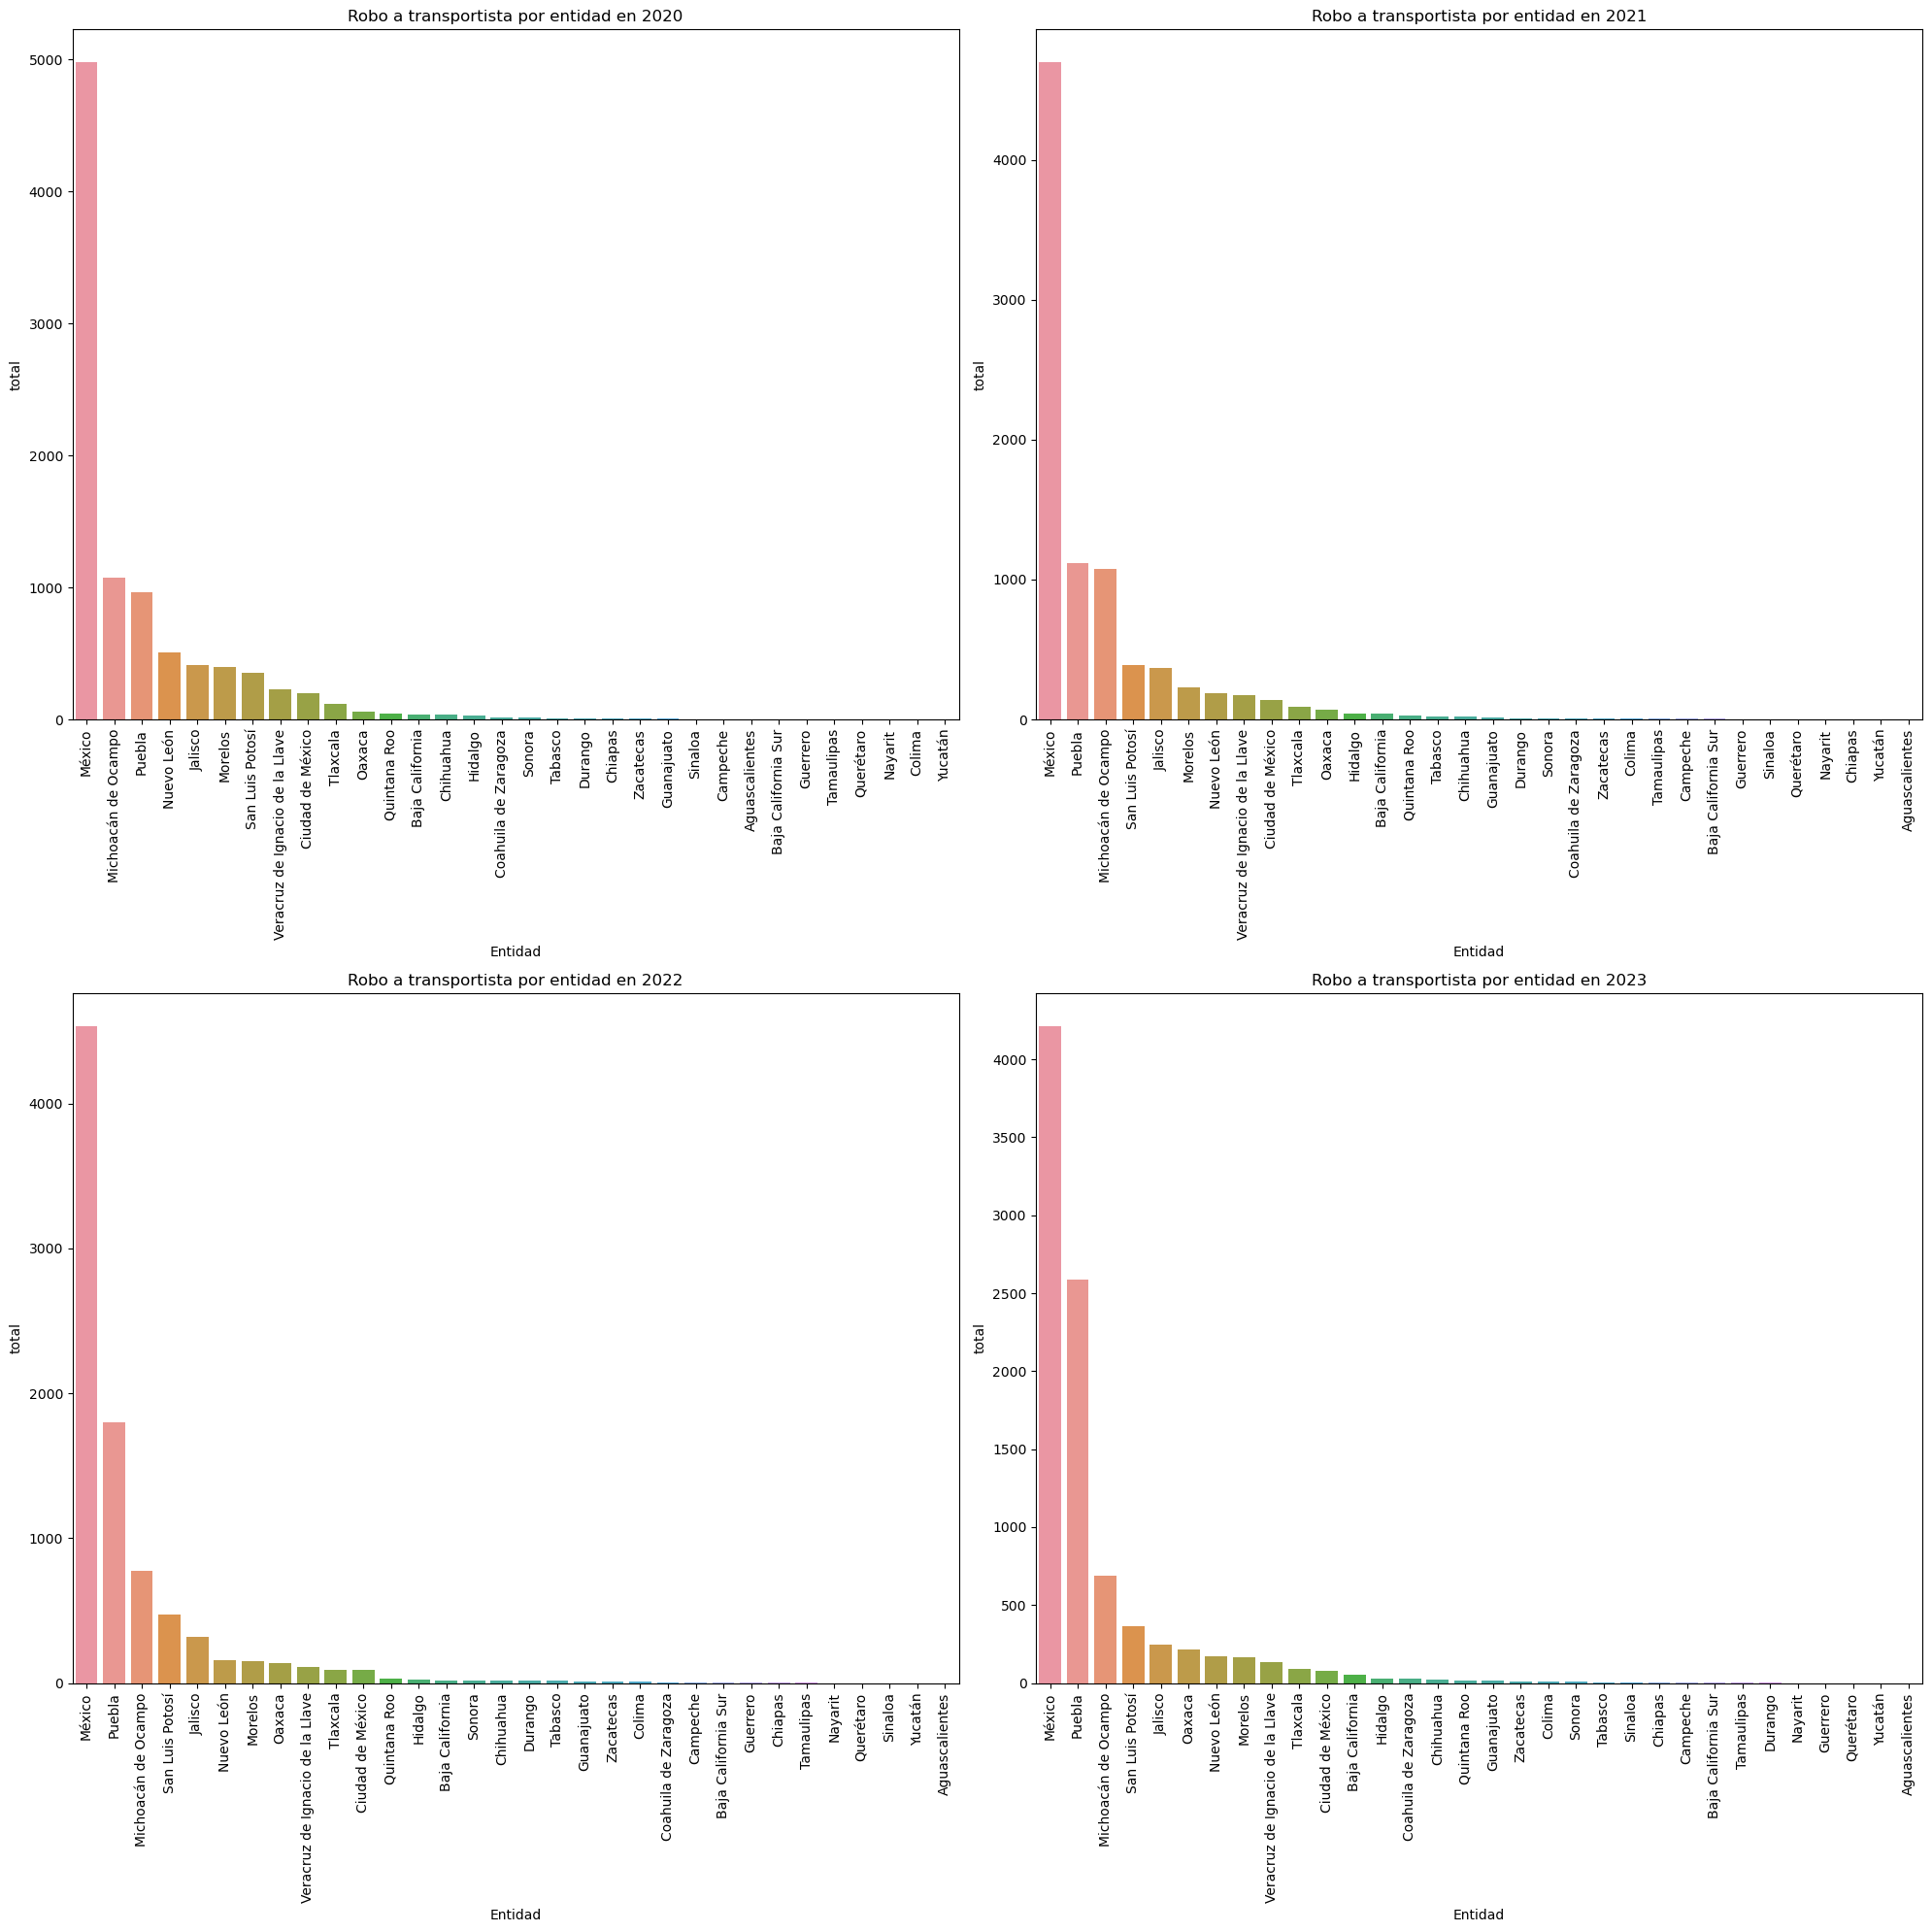

In [69]:
# Crear la figura con subplots (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Gráfica para 2020
df_2020_sorted = df_2020_1_filtered[df_2020_1_filtered['Subtipo de delito'] == 'Robo a transportista'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[0, 0], x='Entidad', y='total', data=df_2020_sorted, errorbar=None)
axes[0, 0].set_title('Robo a transportista por entidad en 2020')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

# Gráfica para 2021
df_2021_sorted = df_2021_1_filtered[df_2021_1_filtered['Subtipo de delito'] == 'Robo a transportista'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[0, 1], x='Entidad', y='total', data=df_2021_sorted, errorbar=None)
axes[0, 1].set_title('Robo a transportista por entidad en 2021')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)

# Gráfica para 2022
df_2022_sorted = df_2022_1_filtered[df_2022_1_filtered['Subtipo de delito'] == 'Robo a transportista'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[1, 0], x='Entidad', y='total', data=df_2022_sorted, errorbar=None)
axes[1, 0].set_title('Robo a transportista por entidad en 2022')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)

# Gráfica para 2023
df_2023_sorted = df_2023_1_filtered[df_2023_1_filtered['Subtipo de delito'] == 'Robo a transportista'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[1, 1], x='Entidad', y='total', data=df_2023_sorted, errorbar=None)
axes[1, 1].set_title('Robo a transportista por entidad en 2023')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar todas las gráficas concatenadas
plt.show()


/var/folders/1_/0gj_v5x54fxd8gllt64jsbp80000gn/T/ipykernel_92406/43398134.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[0, 0], x='Entidad', y='total', data=df_2018_sorted, ci=None)
/var/folders/1_/0gj_v5x54fxd8gllt64jsbp80000gn/T/ipykernel_92406/43398134.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[0, 1], x='Entidad', y='total', data=df_2019_sorted, ci=None)
/var/folders/1_/0gj_v5x54fxd8gllt64jsbp80000gn/T/ipykernel_92406/43398134.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[1, 0], x='Entidad', y='total', data=df_2020_sorted, ci=None)
/var/folders/1_/0gj_v5x54fxd8gllt64jsbp80000gn/T/ipykernel_92406/43398134.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[1, 1], x='Entidad', y='total', dat

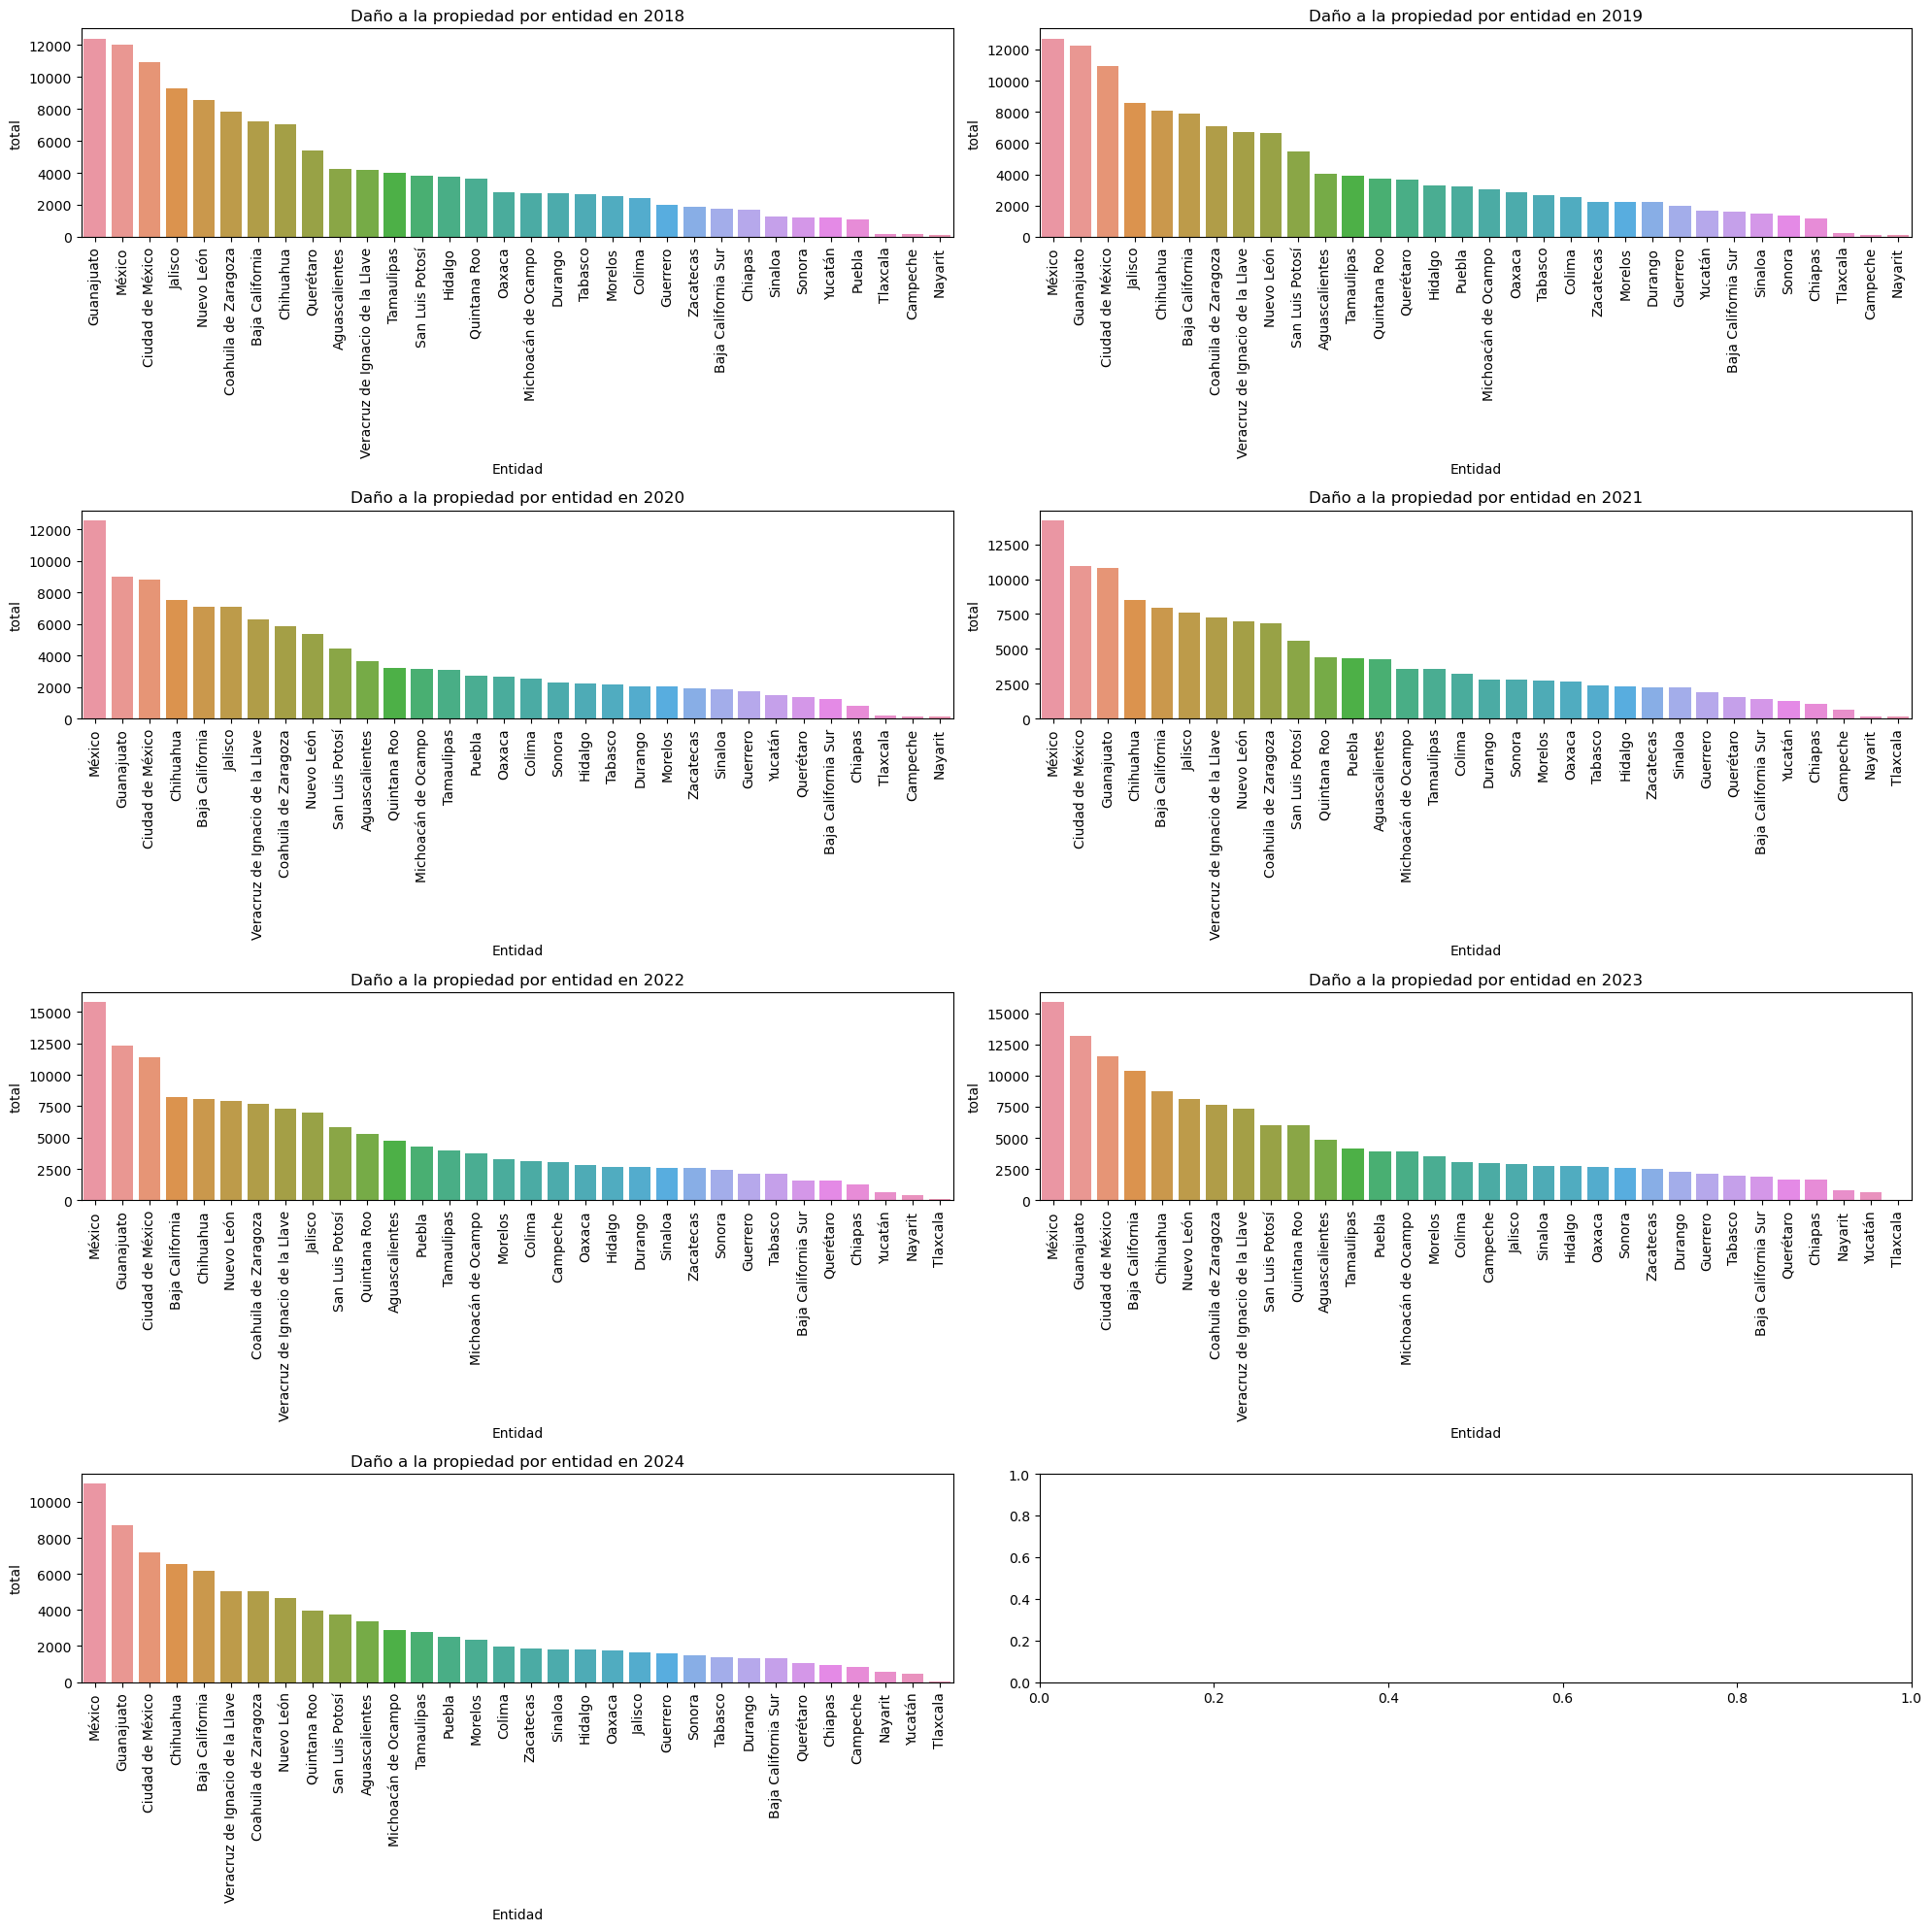

In [50]:
# Crear la figura con subplots (4 filas, 2 columnas)
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

# Gráfica para 2018
df_2018_sorted = df_2018_1_filtered[df_2018_1_filtered['Subtipo de delito'] == 'Daño a la propiedad'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[0, 0], x='Entidad', y='total', data=df_2018_sorted, ci=None)
axes[0, 0].set_title('Daño a la propiedad por entidad en 2018')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

# Gráfica para 2019
df_2019_sorted = df_2019_1_filtered[df_2019_1_filtered['Subtipo de delito'] == 'Daño a la propiedad'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[0, 1], x='Entidad', y='total', data=df_2019_sorted, ci=None)
axes[0, 1].set_title('Daño a la propiedad por entidad en 2019')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)

# Gráfica para 2020
df_2020_sorted = df_2020_1_filtered[df_2020_1_filtered['Subtipo de delito'] == 'Daño a la propiedad'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[1, 0], x='Entidad', y='total', data=df_2020_sorted, ci=None)
axes[1, 0].set_title('Daño a la propiedad por entidad en 2020')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)

# Gráfica para 2021
df_2021_sorted = df_2021_1_filtered[df_2021_1_filtered['Subtipo de delito'] == 'Daño a la propiedad'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[1, 1], x='Entidad', y='total', data=df_2021_sorted, ci=None)
axes[1, 1].set_title('Daño a la propiedad por entidad en 2021')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)

# Gráfica para 2022
df_2022_sorted = df_2022_1_filtered[df_2022_1_filtered['Subtipo de delito'] == 'Daño a la propiedad'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[2, 0], x='Entidad', y='total', data=df_2022_sorted, ci=None)
axes[2, 0].set_title('Daño a la propiedad por entidad en 2022')
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=90)

# Gráfica para 2023
df_2023_sorted = df_2023_1_filtered[df_2023_1_filtered['Subtipo de delito'] == 'Daño a la propiedad'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[2, 1], x='Entidad', y='total', data=df_2023_sorted, ci=None)
axes[2, 1].set_title('Daño a la propiedad por entidad en 2023')
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=90)

# Gráfica para 2024
df_2024_sorted = df_2024_1_filtered[df_2024_1_filtered['Subtipo de delito'] == 'Daño a la propiedad'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[3, 0], x='Entidad', y='total', data=df_2024_sorted, ci=None)
axes[3, 0].set_title('Daño a la propiedad por entidad en 2024')
axes[3, 0].set_xticklabels(axes[3, 0].get_xticklabels(), rotation=90)

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar todas las gráficas concatenadas
plt.show()


/var/folders/1_/0gj_v5x54fxd8gllt64jsbp80000gn/T/ipykernel_92406/359820834.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[0, 0], x='Entidad', y='total', data=df_2018_sorted, ci=None)
/var/folders/1_/0gj_v5x54fxd8gllt64jsbp80000gn/T/ipykernel_92406/359820834.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[0, 1], x='Entidad', y='total', data=df_2019_sorted, ci=None)
/var/folders/1_/0gj_v5x54fxd8gllt64jsbp80000gn/T/ipykernel_92406/359820834.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[1, 0], x='Entidad', y='total', data=df_2020_sorted, ci=None)
/var/folders/1_/0gj_v5x54fxd8gllt64jsbp80000gn/T/ipykernel_92406/359820834.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[1, 1], x='Entidad', y='total',

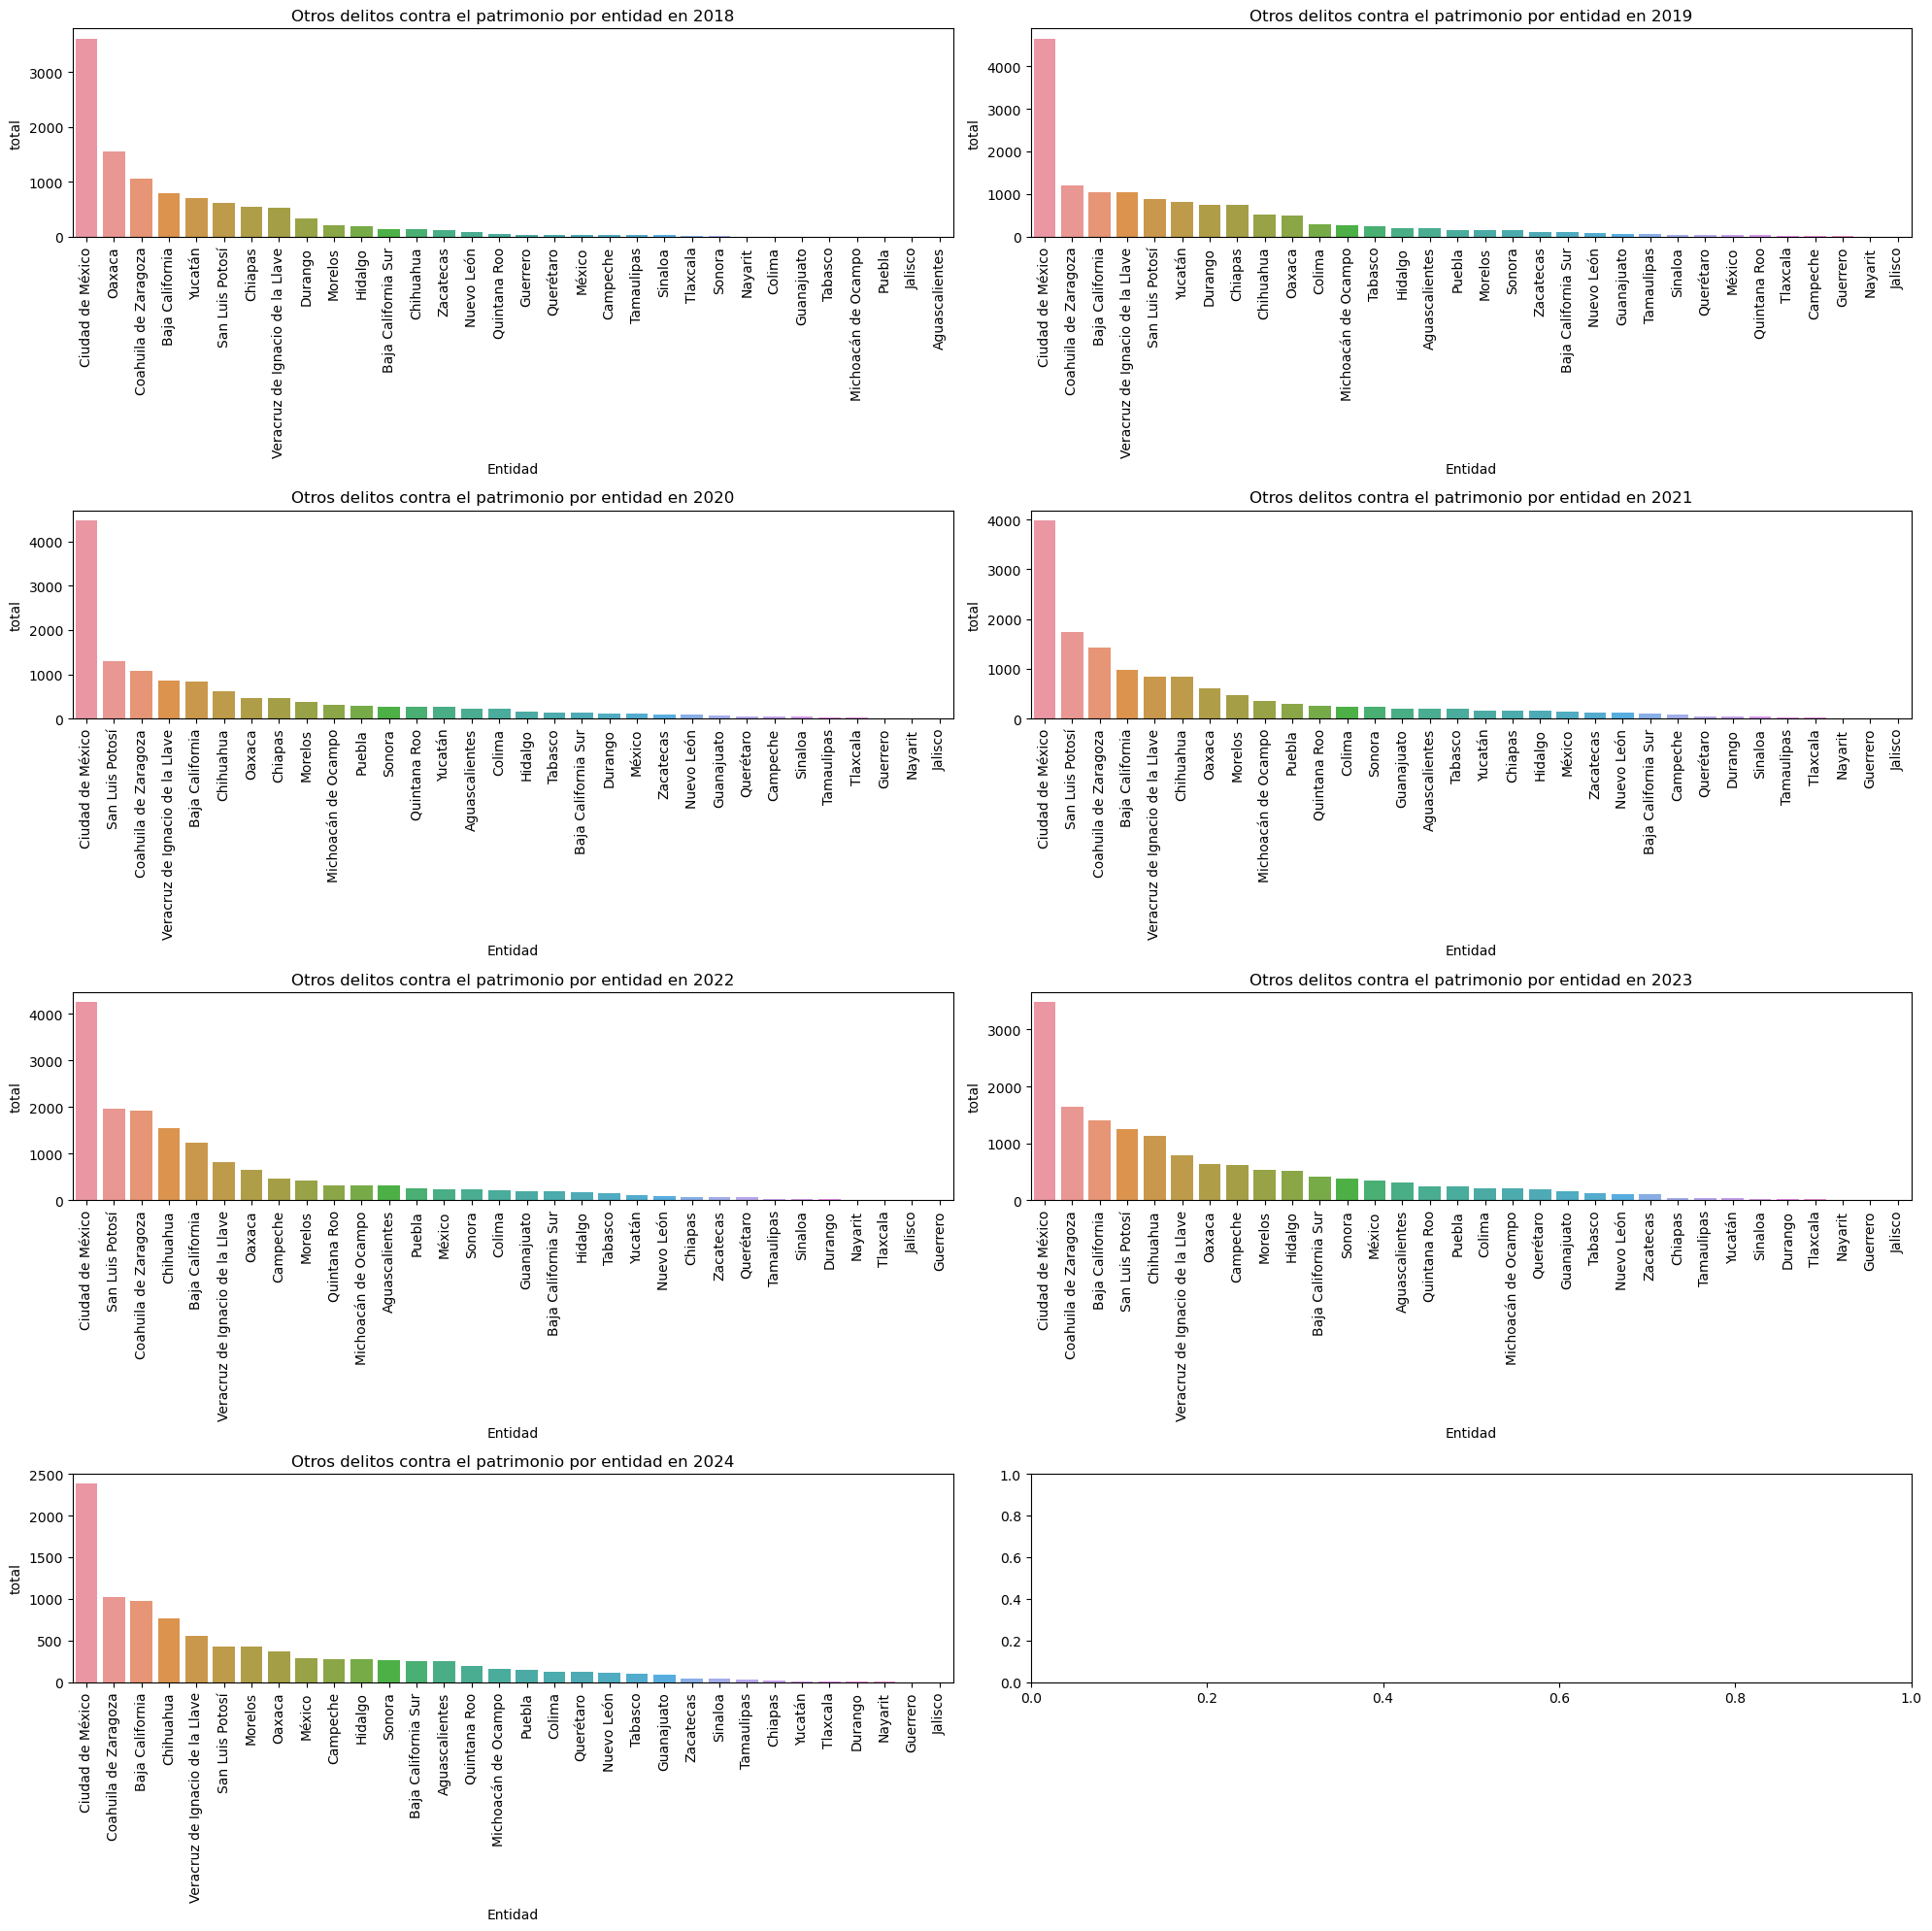

In [51]:
# Crear la figura con subplots (4 filas, 2 columnas)
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

# Gráfica para 2018
df_2018_sorted = df_2018_1_filtered[df_2018_1_filtered['Subtipo de delito'] == 'Otros delitos contra el patrimonio'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[0, 0], x='Entidad', y='total', data=df_2018_sorted, ci=None)
axes[0, 0].set_title('Otros delitos contra el patrimonio por entidad en 2018')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

# Gráfica para 2019
df_2019_sorted = df_2019_1_filtered[df_2019_1_filtered['Subtipo de delito'] == 'Otros delitos contra el patrimonio'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[0, 1], x='Entidad', y='total', data=df_2019_sorted, ci=None)
axes[0, 1].set_title('Otros delitos contra el patrimonio por entidad en 2019')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)

# Gráfica para 2020
df_2020_sorted = df_2020_1_filtered[df_2020_1_filtered['Subtipo de delito'] == 'Otros delitos contra el patrimonio'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[1, 0], x='Entidad', y='total', data=df_2020_sorted, ci=None)
axes[1, 0].set_title('Otros delitos contra el patrimonio por entidad en 2020')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)

# Gráfica para 2021
df_2021_sorted = df_2021_1_filtered[df_2021_1_filtered['Subtipo de delito'] == 'Otros delitos contra el patrimonio'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[1, 1], x='Entidad', y='total', data=df_2021_sorted, ci=None)
axes[1, 1].set_title('Otros delitos contra el patrimonio por entidad en 2021')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)

# Gráfica para 2022
df_2022_sorted = df_2022_1_filtered[df_2022_1_filtered['Subtipo de delito'] == 'Otros delitos contra el patrimonio'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[2, 0], x='Entidad', y='total', data=df_2022_sorted, ci=None)
axes[2, 0].set_title('Otros delitos contra el patrimonio por entidad en 2022')
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=90)

# Gráfica para 2023
df_2023_sorted = df_2023_1_filtered[df_2023_1_filtered['Subtipo de delito'] == 'Otros delitos contra el patrimonio'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[2, 1], x='Entidad', y='total', data=df_2023_sorted, ci=None)
axes[2, 1].set_title('Otros delitos contra el patrimonio por entidad en 2023')
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=90)

# Gráfica para 2024
df_2024_sorted = df_2024_1_filtered[df_2024_1_filtered['Subtipo de delito'] == 'Otros delitos contra el patrimonio'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[3, 0], x='Entidad', y='total', data=df_2024_sorted, ci=None)
axes[3, 0].set_title('Otros delitos contra el patrimonio por entidad en 2024')
axes[3, 0].set_xticklabels(axes[3, 0].get_xticklabels(), rotation=90)

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar todas las gráficas concatenadas
plt.show()


/var/folders/1_/0gj_v5x54fxd8gllt64jsbp80000gn/T/ipykernel_92406/1052023555.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[0, 0], x='Entidad', y='total', data=df_2018_sorted, ci=None)
/var/folders/1_/0gj_v5x54fxd8gllt64jsbp80000gn/T/ipykernel_92406/1052023555.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[0, 1], x='Entidad', y='total', data=df_2019_sorted, ci=None)
/var/folders/1_/0gj_v5x54fxd8gllt64jsbp80000gn/T/ipykernel_92406/1052023555.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[1, 0], x='Entidad', y='total', data=df_2020_sorted, ci=None)
/var/folders/1_/0gj_v5x54fxd8gllt64jsbp80000gn/T/ipykernel_92406/1052023555.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[1, 1], x='Entidad', y='tot

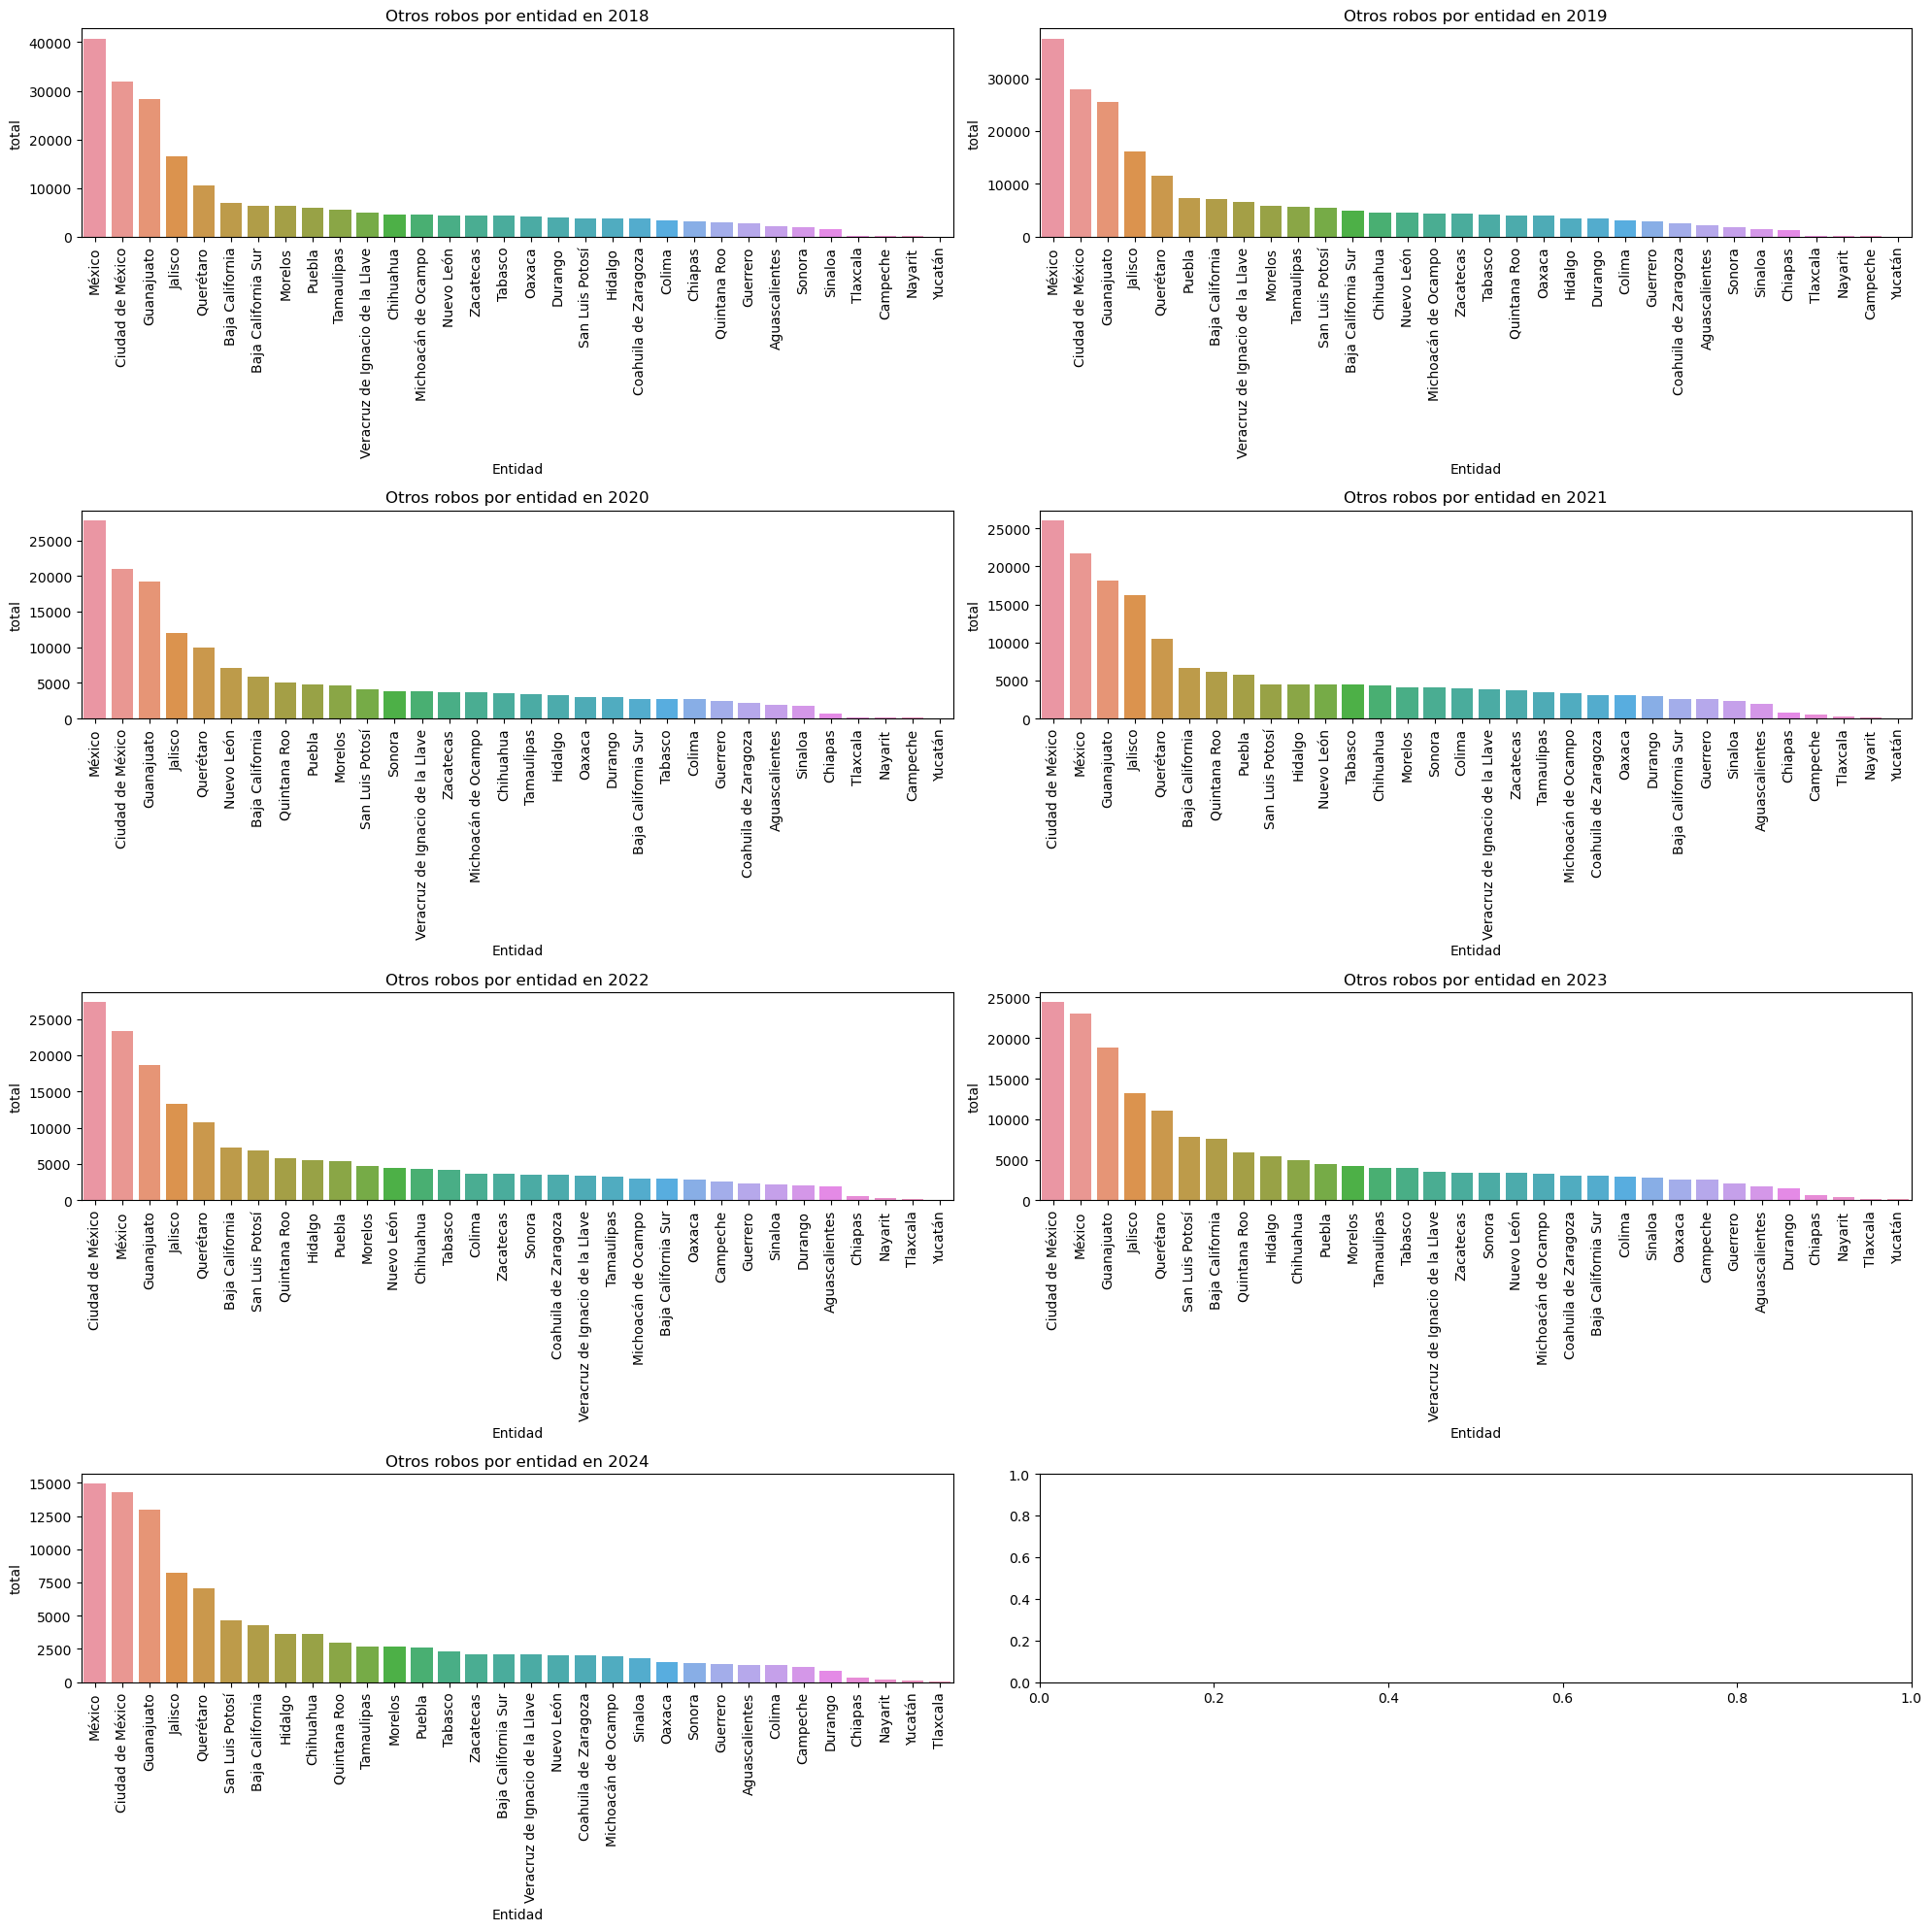

In [52]:
# Crear la figura con subplots (4 filas, 2 columnas)
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

# Gráfica para 2018
df_2018_sorted = df_2018_1_filtered[df_2018_1_filtered['Subtipo de delito'] == 'Otros robos'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[0, 0], x='Entidad', y='total', data=df_2018_sorted, ci=None)
axes[0, 0].set_title('Otros robos por entidad en 2018')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

# Gráfica para 2019
df_2019_sorted = df_2019_1_filtered[df_2019_1_filtered['Subtipo de delito'] == 'Otros robos'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[0, 1], x='Entidad', y='total', data=df_2019_sorted, ci=None)
axes[0, 1].set_title('Otros robos por entidad en 2019')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)

# Gráfica para 2020
df_2020_sorted = df_2020_1_filtered[df_2020_1_filtered['Subtipo de delito'] == 'Otros robos'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[1, 0], x='Entidad', y='total', data=df_2020_sorted, ci=None)
axes[1, 0].set_title('Otros robos por entidad en 2020')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)

# Gráfica para 2021
df_2021_sorted = df_2021_1_filtered[df_2021_1_filtered['Subtipo de delito'] == 'Otros robos'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[1, 1], x='Entidad', y='total', data=df_2021_sorted, ci=None)
axes[1, 1].set_title('Otros robos por entidad en 2021')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)

# Gráfica para 2022
df_2022_sorted = df_2022_1_filtered[df_2022_1_filtered['Subtipo de delito'] == 'Otros robos'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[2, 0], x='Entidad', y='total', data=df_2022_sorted, ci=None)
axes[2, 0].set_title('Otros robos por entidad en 2022')
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=90)

# Gráfica para 2023
df_2023_sorted = df_2023_1_filtered[df_2023_1_filtered['Subtipo de delito'] == 'Otros robos'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[2, 1], x='Entidad', y='total', data=df_2023_sorted, ci=None)
axes[2, 1].set_title('Otros robos por entidad en 2023')
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=90)

# Gráfica para 2024
df_2024_sorted = df_2024_1_filtered[df_2024_1_filtered['Subtipo de delito'] == 'Otros robos'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[3, 0], x='Entidad', y='total', data=df_2024_sorted, ci=None)
axes[3, 0].set_title('Otros robos por entidad en 2024')
axes[3, 0].set_xticklabels(axes[3, 0].get_xticklabels(), rotation=90)

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar todas las gráficas concatenadas
plt.show()


IndexError: index 2 is out of bounds for axis 0 with size 2

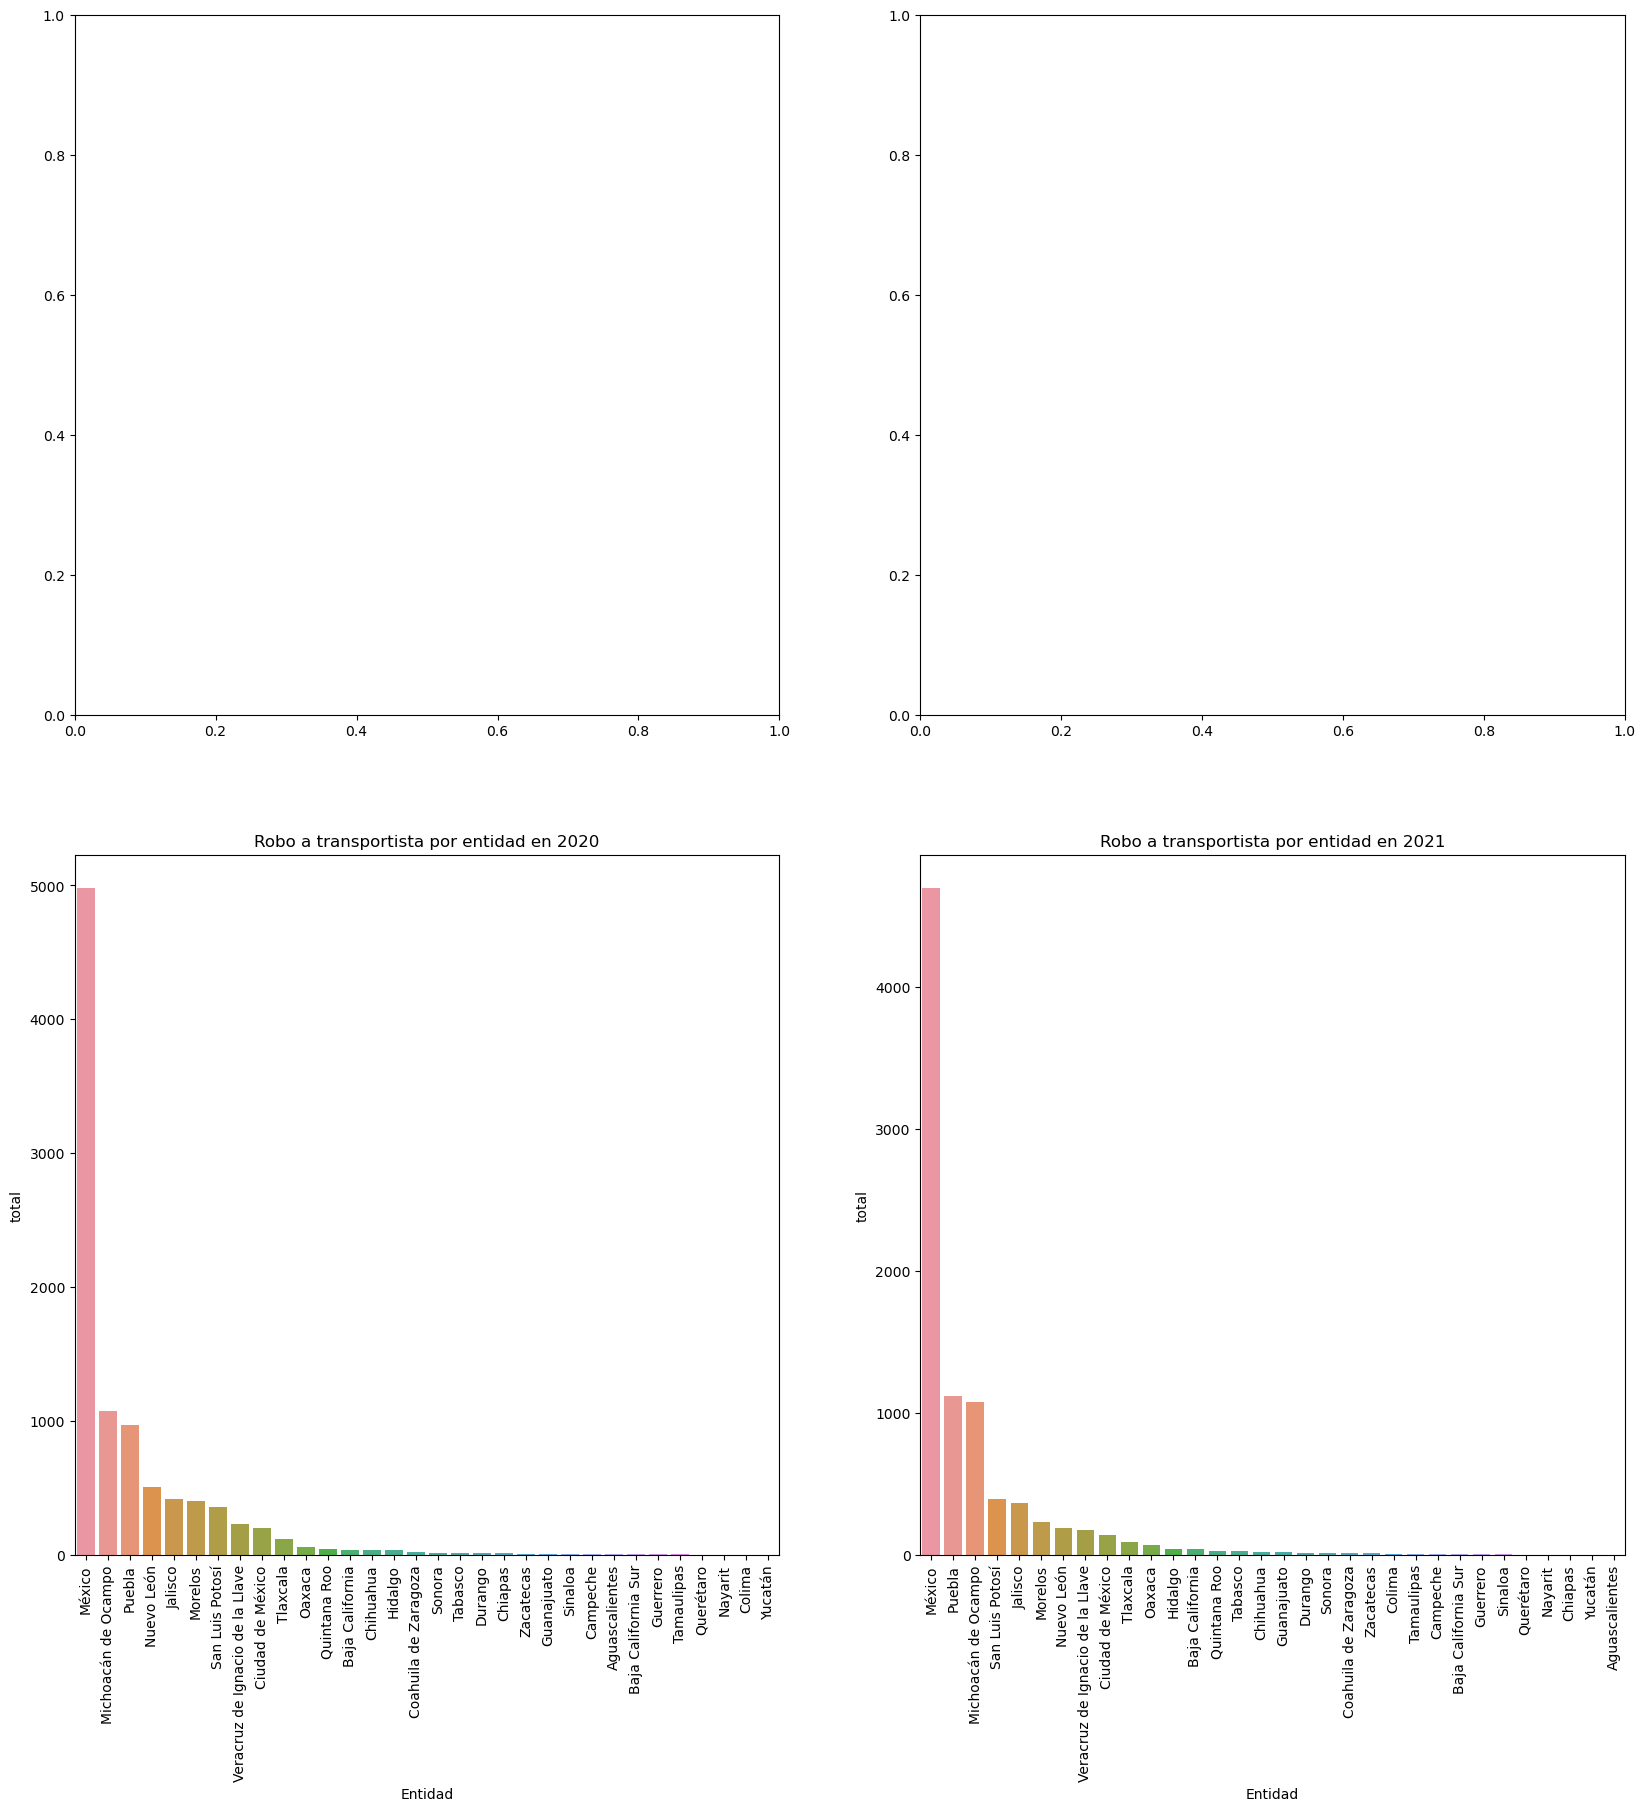

In [64]:
# Crear la figura con subplots (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Gráfica para 2020
df_2020_sorted = df_2020_1_filtered[df_2020_1_filtered['Subtipo de delito'] == 'Robo a transportista'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[1, 0], x='Entidad', y='total', data=df_2020_sorted, errorbar=None)
axes[1, 0].set_title('Robo a transportista por entidad en 2020')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)

# Gráfica para 2021
df_2021_sorted = df_2021_1_filtered[df_2021_1_filtered['Subtipo de delito'] == 'Robo a transportista'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[1, 1], x='Entidad', y='total', data=df_2021_sorted, errorbar=None)
axes[1, 1].set_title('Robo a transportista por entidad en 2021')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)

# Gráfica para 2022
df_2022_sorted = df_2022_1_filtered[df_2022_1_filtered['Subtipo de delito'] == 'Robo a transportista'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[2, 0], x='Entidad', y='total', data=df_2022_sorted, errorbar=None)
axes[2, 0].set_title('Robo a transportista por entidad en 2022')
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=90)



# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar todas las gráficas concatenadas
plt.show()


In [ ]:
df_2018_sorted

/var/folders/1_/0gj_v5x54fxd8gllt64jsbp80000gn/T/ipykernel_92406/1031372101.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[0, 0], x='Entidad', y='total', data=df_2018_sorted, ci=None)
/var/folders/1_/0gj_v5x54fxd8gllt64jsbp80000gn/T/ipykernel_92406/1031372101.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[0, 1], x='Entidad', y='total', data=df_2019_sorted, ci=None)
/var/folders/1_/0gj_v5x54fxd8gllt64jsbp80000gn/T/ipykernel_92406/1031372101.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[1, 0], x='Entidad', y='total', data=df_2020_sorted, ci=None)
/var/folders/1_/0gj_v5x54fxd8gllt64jsbp80000gn/T/ipykernel_92406/1031372101.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[1, 1], x='Entidad', y='tot

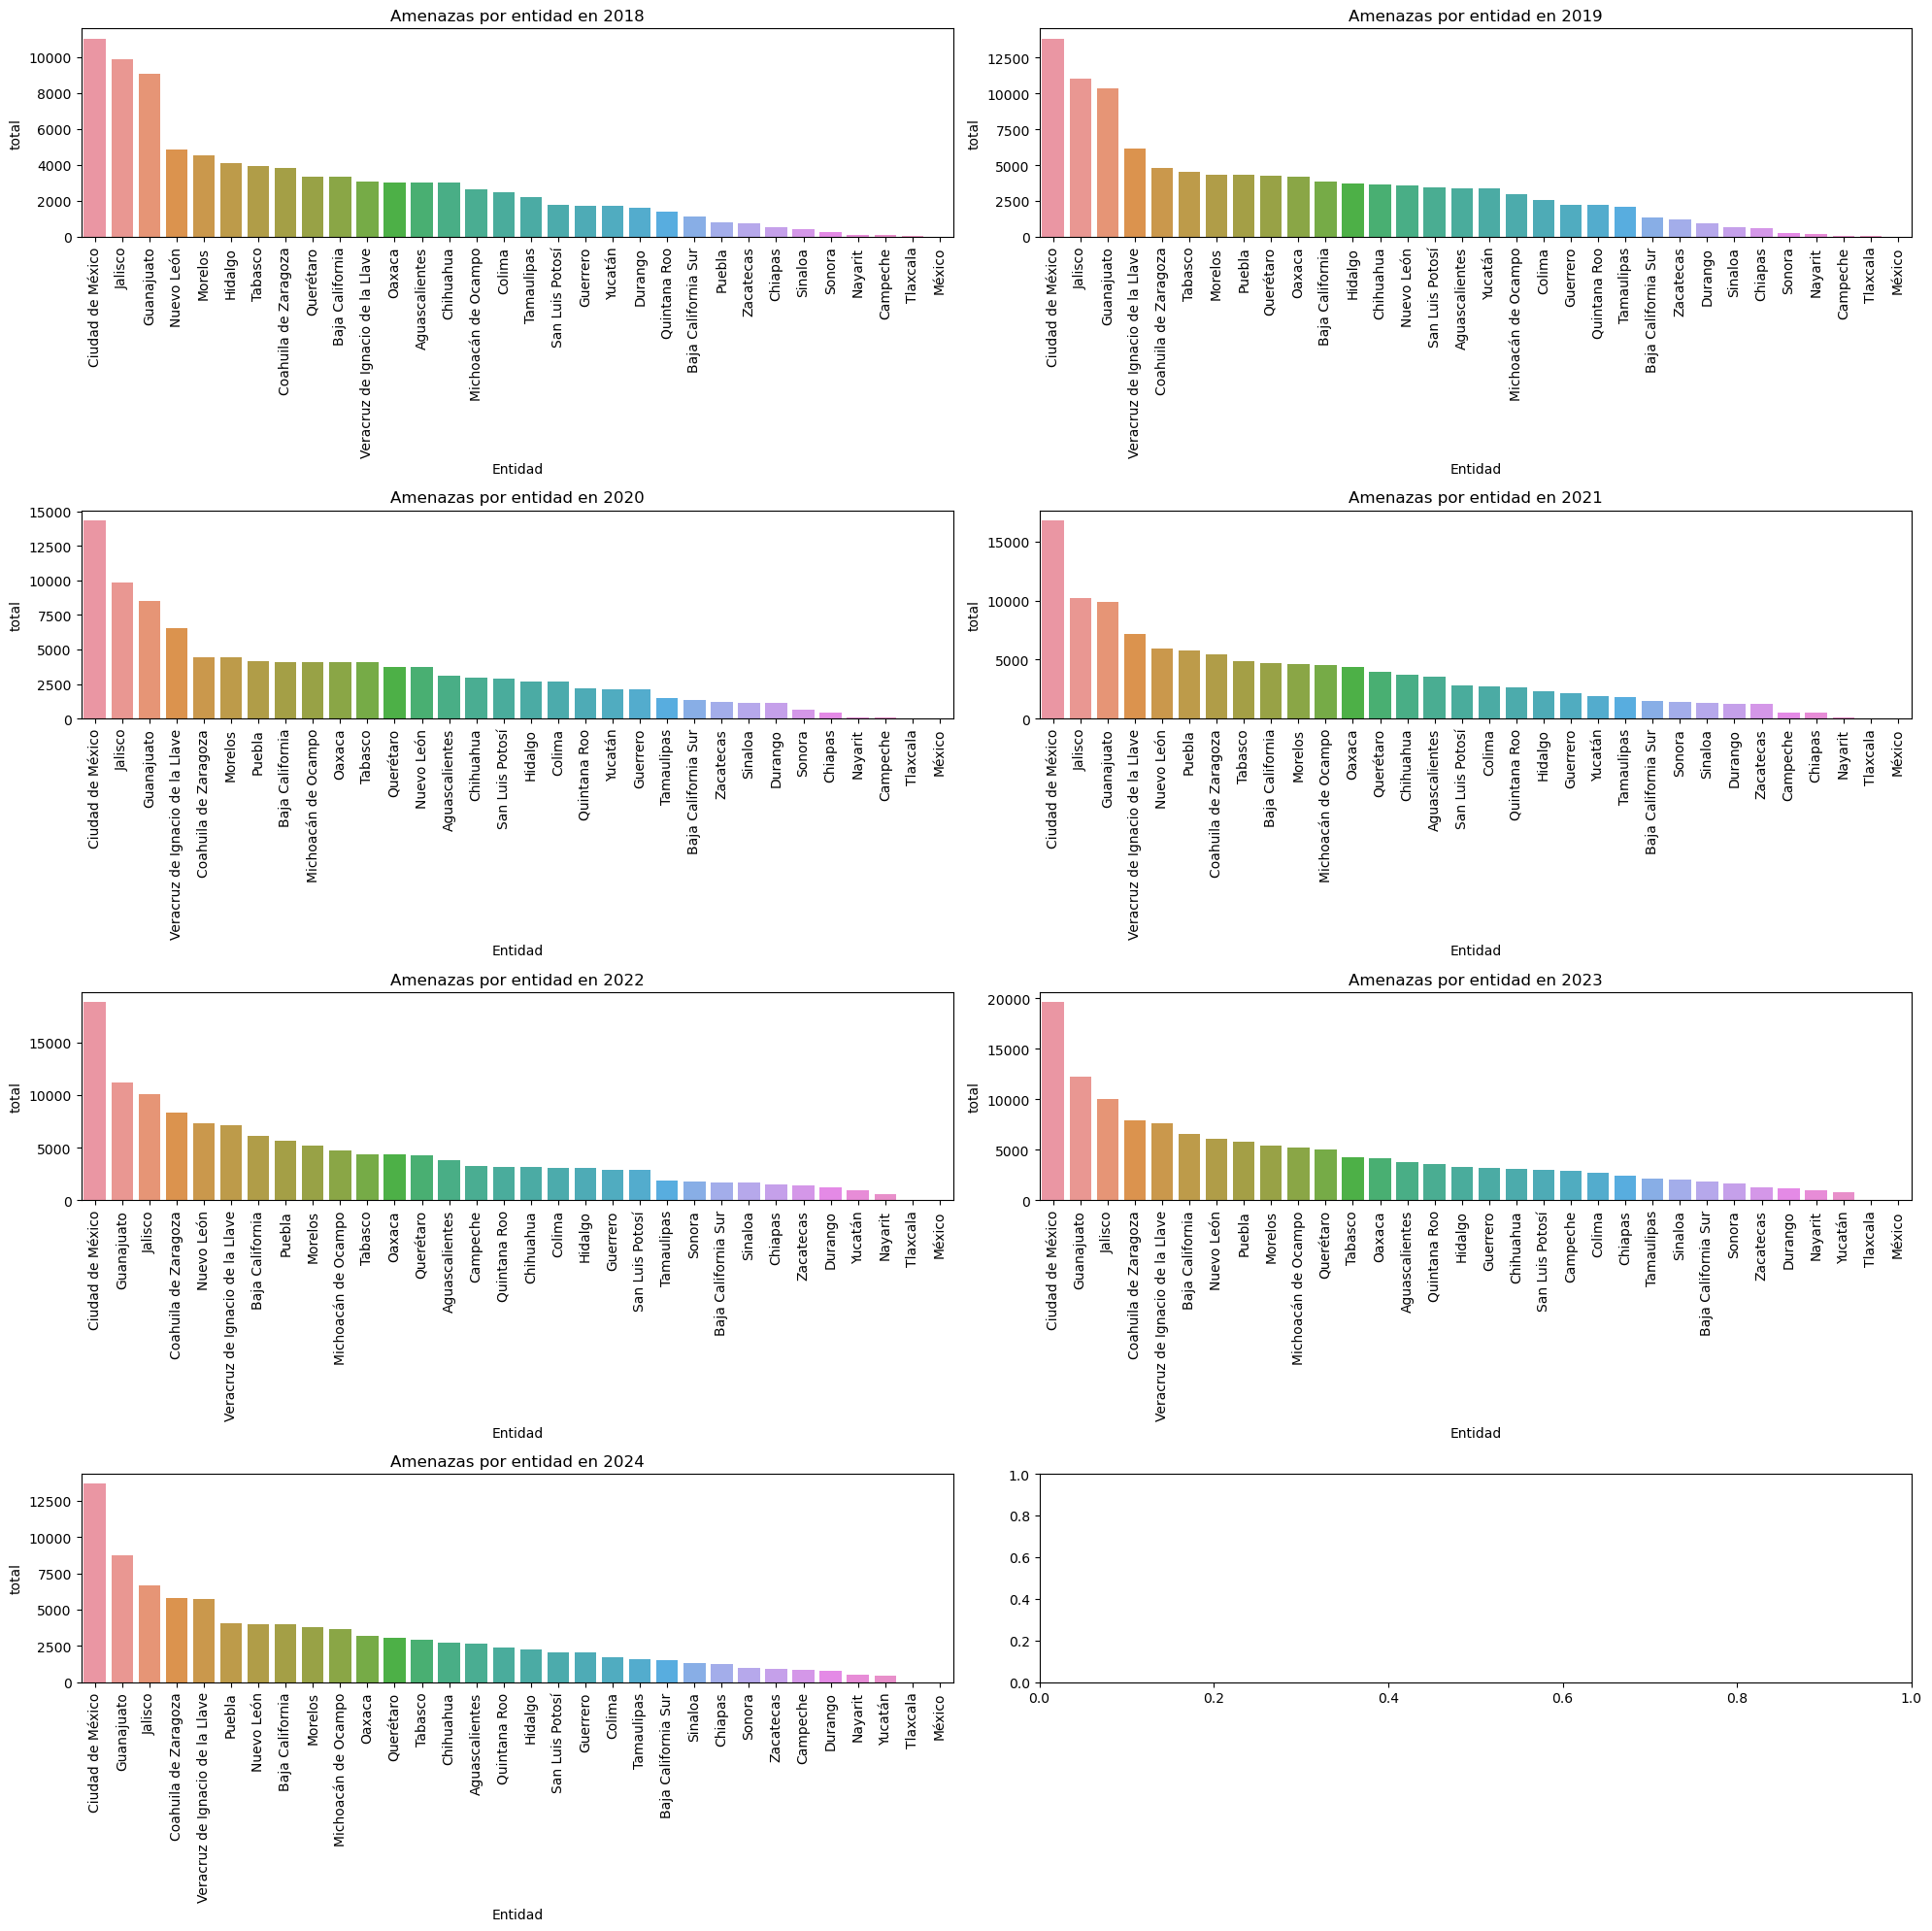

In [54]:
# Crear la figura con subplots (4 filas, 2 columnas)
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

# Gráfica para 2018
df_2018_sorted = df_2018_1_filtered[df_2018_1_filtered['Subtipo de delito'] == 'Amenazas'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[0, 0], x='Entidad', y='total', data=df_2018_sorted, ci=None)
axes[0, 0].set_title('Amenazas por entidad en 2018')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

# Gráfica para 2019
df_2019_sorted = df_2019_1_filtered[df_2019_1_filtered['Subtipo de delito'] == 'Amenazas'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[0, 1], x='Entidad', y='total', data=df_2019_sorted, ci=None)
axes[0, 1].set_title('Amenazas por entidad en 2019')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)

# Gráfica para 2020
df_2020_sorted = df_2020_1_filtered[df_2020_1_filtered['Subtipo de delito'] == 'Amenazas'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[1, 0], x='Entidad', y='total', data=df_2020_sorted, ci=None)
axes[1, 0].set_title('Amenazas por entidad en 2020')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)

# Gráfica para 2021
df_2021_sorted = df_2021_1_filtered[df_2021_1_filtered['Subtipo de delito'] == 'Amenazas'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[1, 1], x='Entidad', y='total', data=df_2021_sorted, ci=None)
axes[1, 1].set_title('Amenazas por entidad en 2021')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)

# Gráfica para 2022
df_2022_sorted = df_2022_1_filtered[df_2022_1_filtered['Subtipo de delito'] == 'Amenazas'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[2, 0], x='Entidad', y='total', data=df_2022_sorted, ci=None)
axes[2, 0].set_title('Amenazas por entidad en 2022')
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=90)

# Gráfica para 2023
df_2023_sorted = df_2023_1_filtered[df_2023_1_filtered['Subtipo de delito'] == 'Amenazas'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[2, 1], x='Entidad', y='total', data=df_2023_sorted, ci=None)
axes[2, 1].set_title('Amenazas por entidad en 2023')
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=90)

# Gráfica para 2024
df_2024_sorted = df_2024_1_filtered[df_2024_1_filtered['Subtipo de delito'] == 'Amenazas'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[3, 0], x='Entidad', y='total', data=df_2024_sorted, ci=None)
axes[3, 0].set_title('Amenazas por entidad en 2024')
axes[3, 0].set_xticklabels(axes[3, 0].get_xticklabels(), rotation=90)

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar todas las gráficas concatenadas
plt.show()


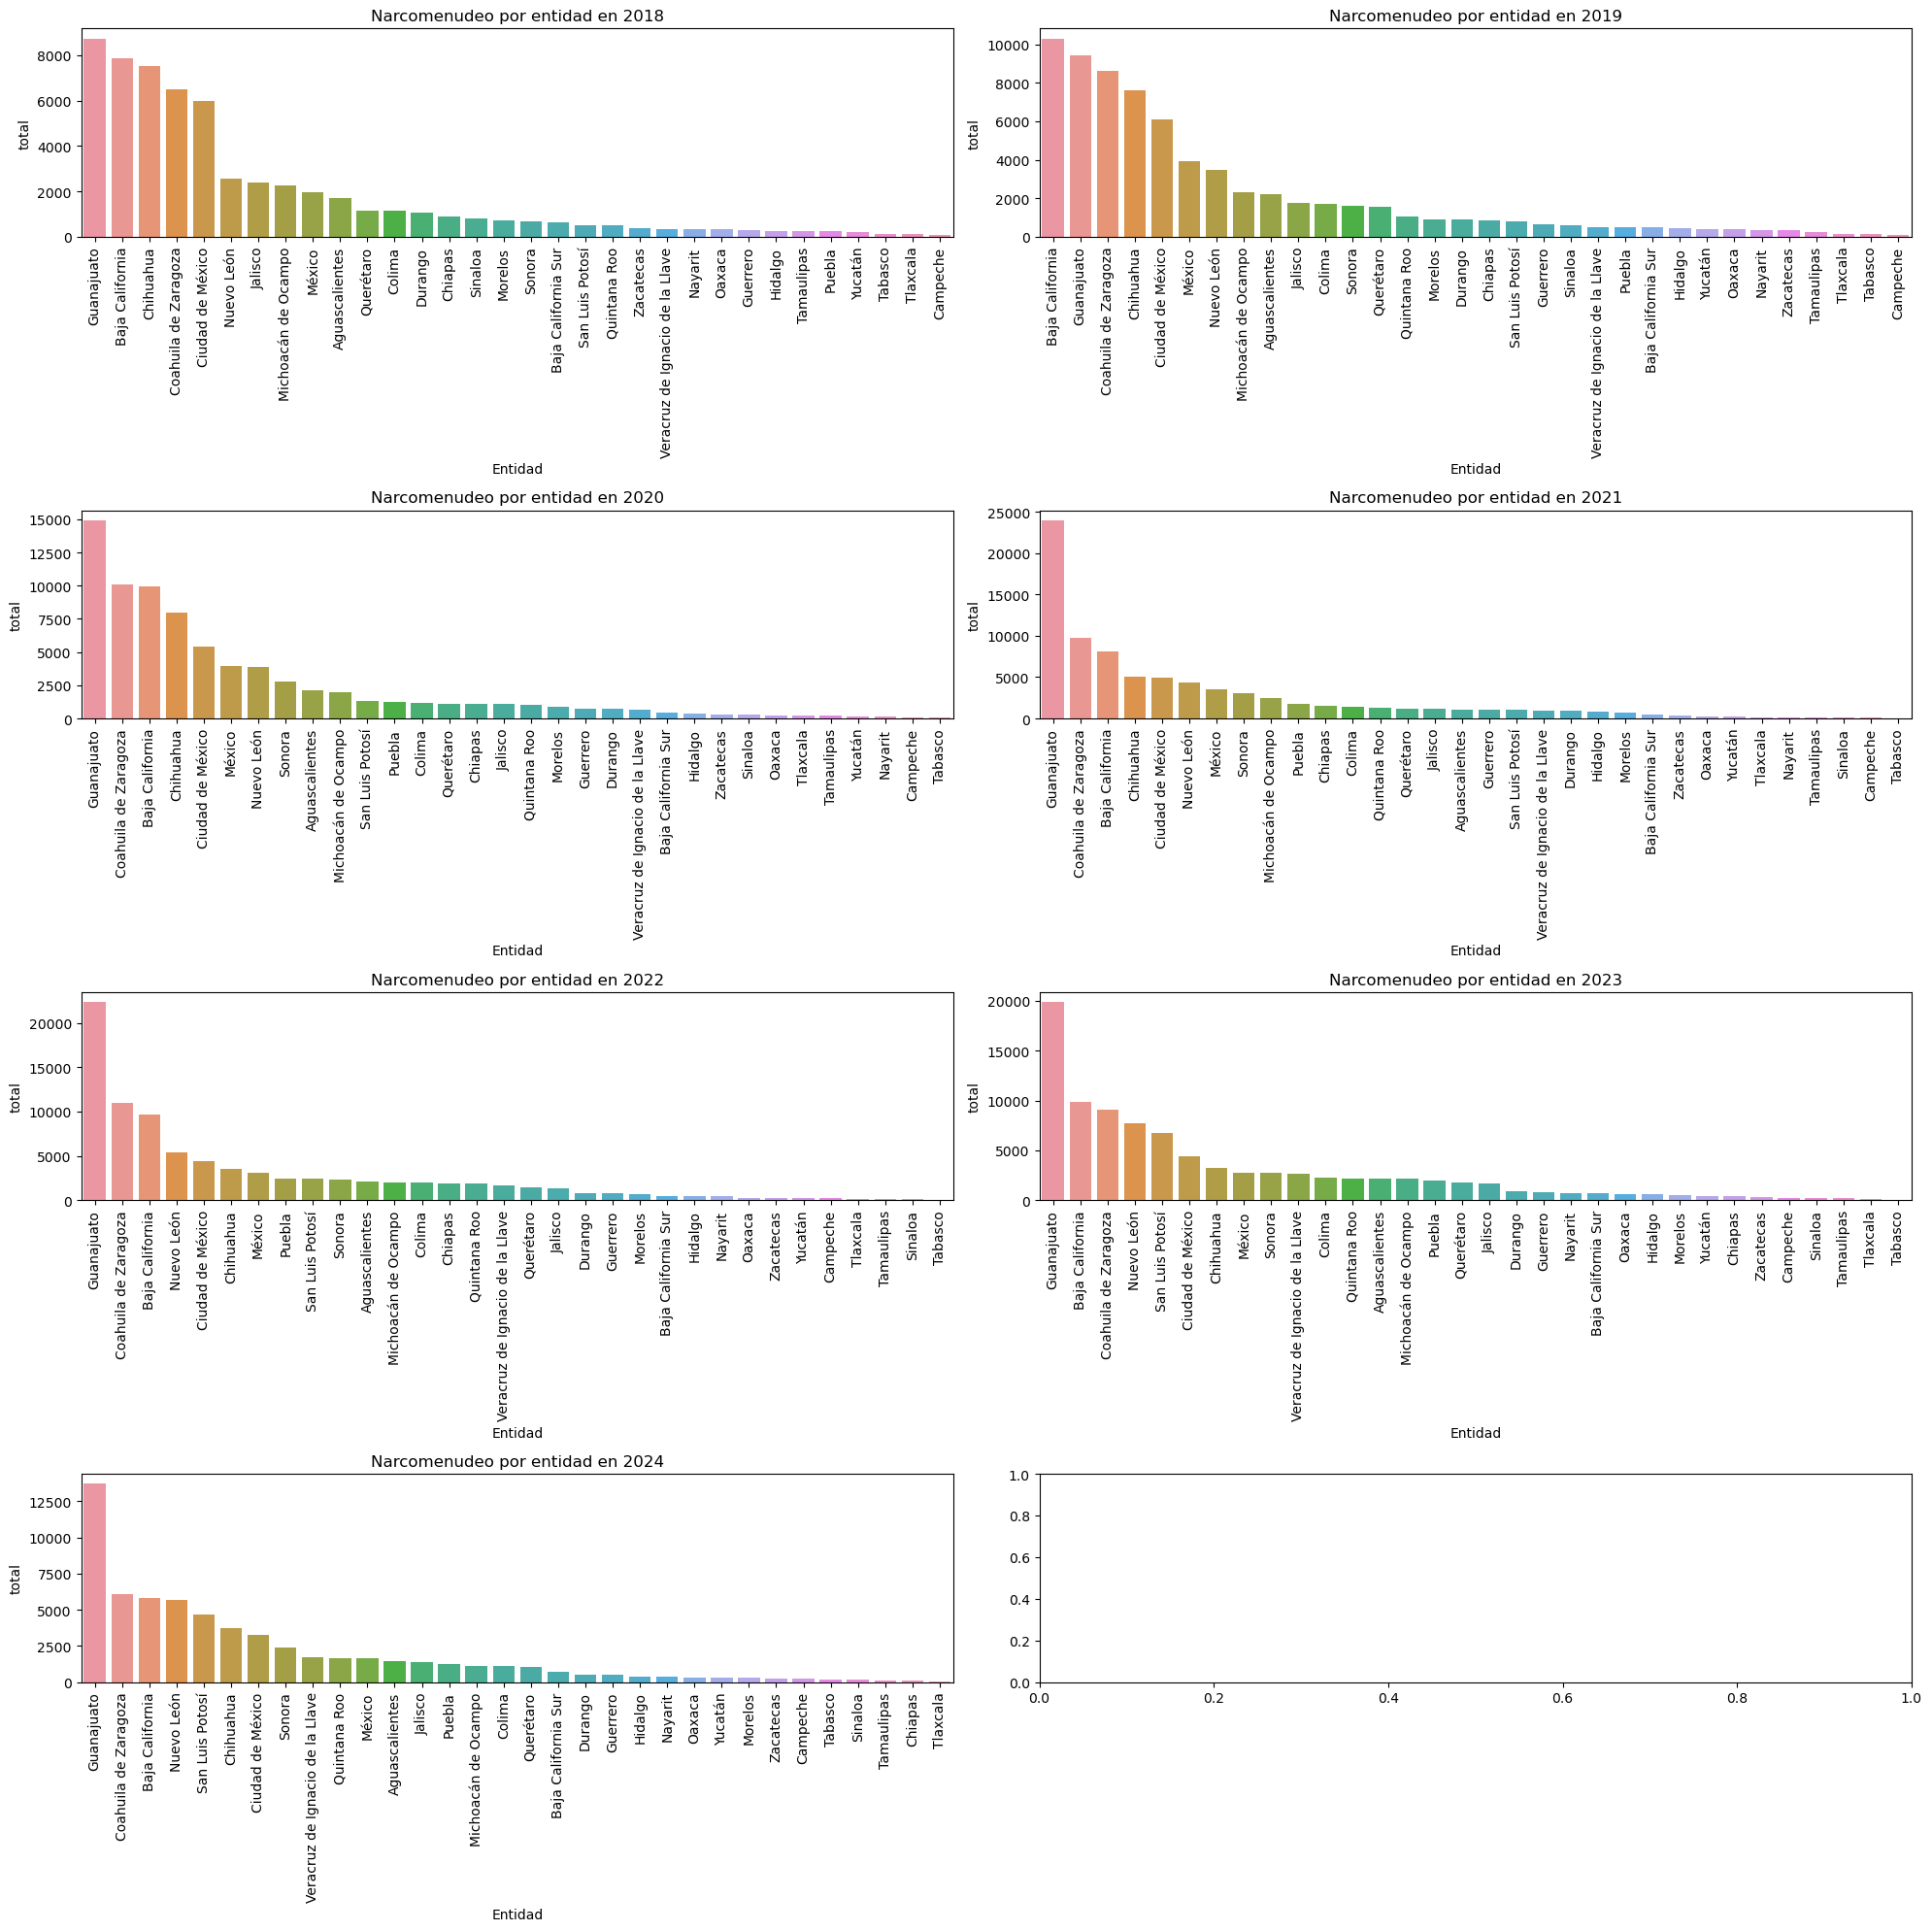

In [55]:
# Crear la figura con subplots (4 filas, 2 columnas)
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

# Gráfica para 2018
df_2018_sorted = df_2018_1_filtered[df_2018_1_filtered['Tipo de delito'] == 'Narcomenudeo'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[0, 0], x='Entidad', y='total', data=df_2018_sorted, errorbar=None)
axes[0, 0].set_title('Narcomenudeo por entidad en 2018')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

# Gráfica para 2019
df_2019_sorted = df_2019_1_filtered[df_2019_1_filtered['Tipo de delito'] == 'Narcomenudeo'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[0, 1], x='Entidad', y='total', data=df_2019_sorted, errorbar=None)
axes[0, 1].set_title('Narcomenudeo por entidad en 2019')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)

# Gráfica para 2020
df_2020_sorted = df_2020_1_filtered[df_2020_1_filtered['Tipo de delito'] == 'Narcomenudeo'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[1, 0], x='Entidad', y='total', data=df_2020_sorted, errorbar=None)
axes[1, 0].set_title('Narcomenudeo por entidad en 2020')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)

# Gráfica para 2021
df_2021_sorted = df_2021_1_filtered[df_2021_1_filtered['Tipo de delito'] == 'Narcomenudeo'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[1, 1], x='Entidad', y='total', data=df_2021_sorted, errorbar=None)
axes[1, 1].set_title('Narcomenudeo por entidad en 2021')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)

# Gráfica para 2022
df_2022_sorted = df_2022_1_filtered[df_2022_1_filtered['Tipo de delito'] == 'Narcomenudeo'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[2, 0], x='Entidad', y='total', data=df_2022_sorted, errorbar=None)
axes[2, 0].set_title('Narcomenudeo por entidad en 2022')
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=90)

# Gráfica para 2023
df_2023_sorted = df_2023_1_filtered[df_2023_1_filtered['Tipo de delito'] == 'Narcomenudeo'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[2, 1], x='Entidad', y='total', data=df_2023_sorted, errorbar=None)
axes[2, 1].set_title('Narcomenudeo por entidad en 2023')
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=90)

# Gráfica para 2024
df_2024_sorted = df_2024_1_filtered[df_2024_1_filtered['Tipo de delito'] == 'Narcomenudeo'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[3, 0], x='Entidad', y='total', data=df_2024_sorted, errorbar=None)
axes[3, 0].set_title('Narcomenudeo por entidad en 2024')
axes[3, 0].set_xticklabels(axes[3, 0].get_xticklabels(), rotation=90)

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar todas las gráficas concatenadas
plt.show()


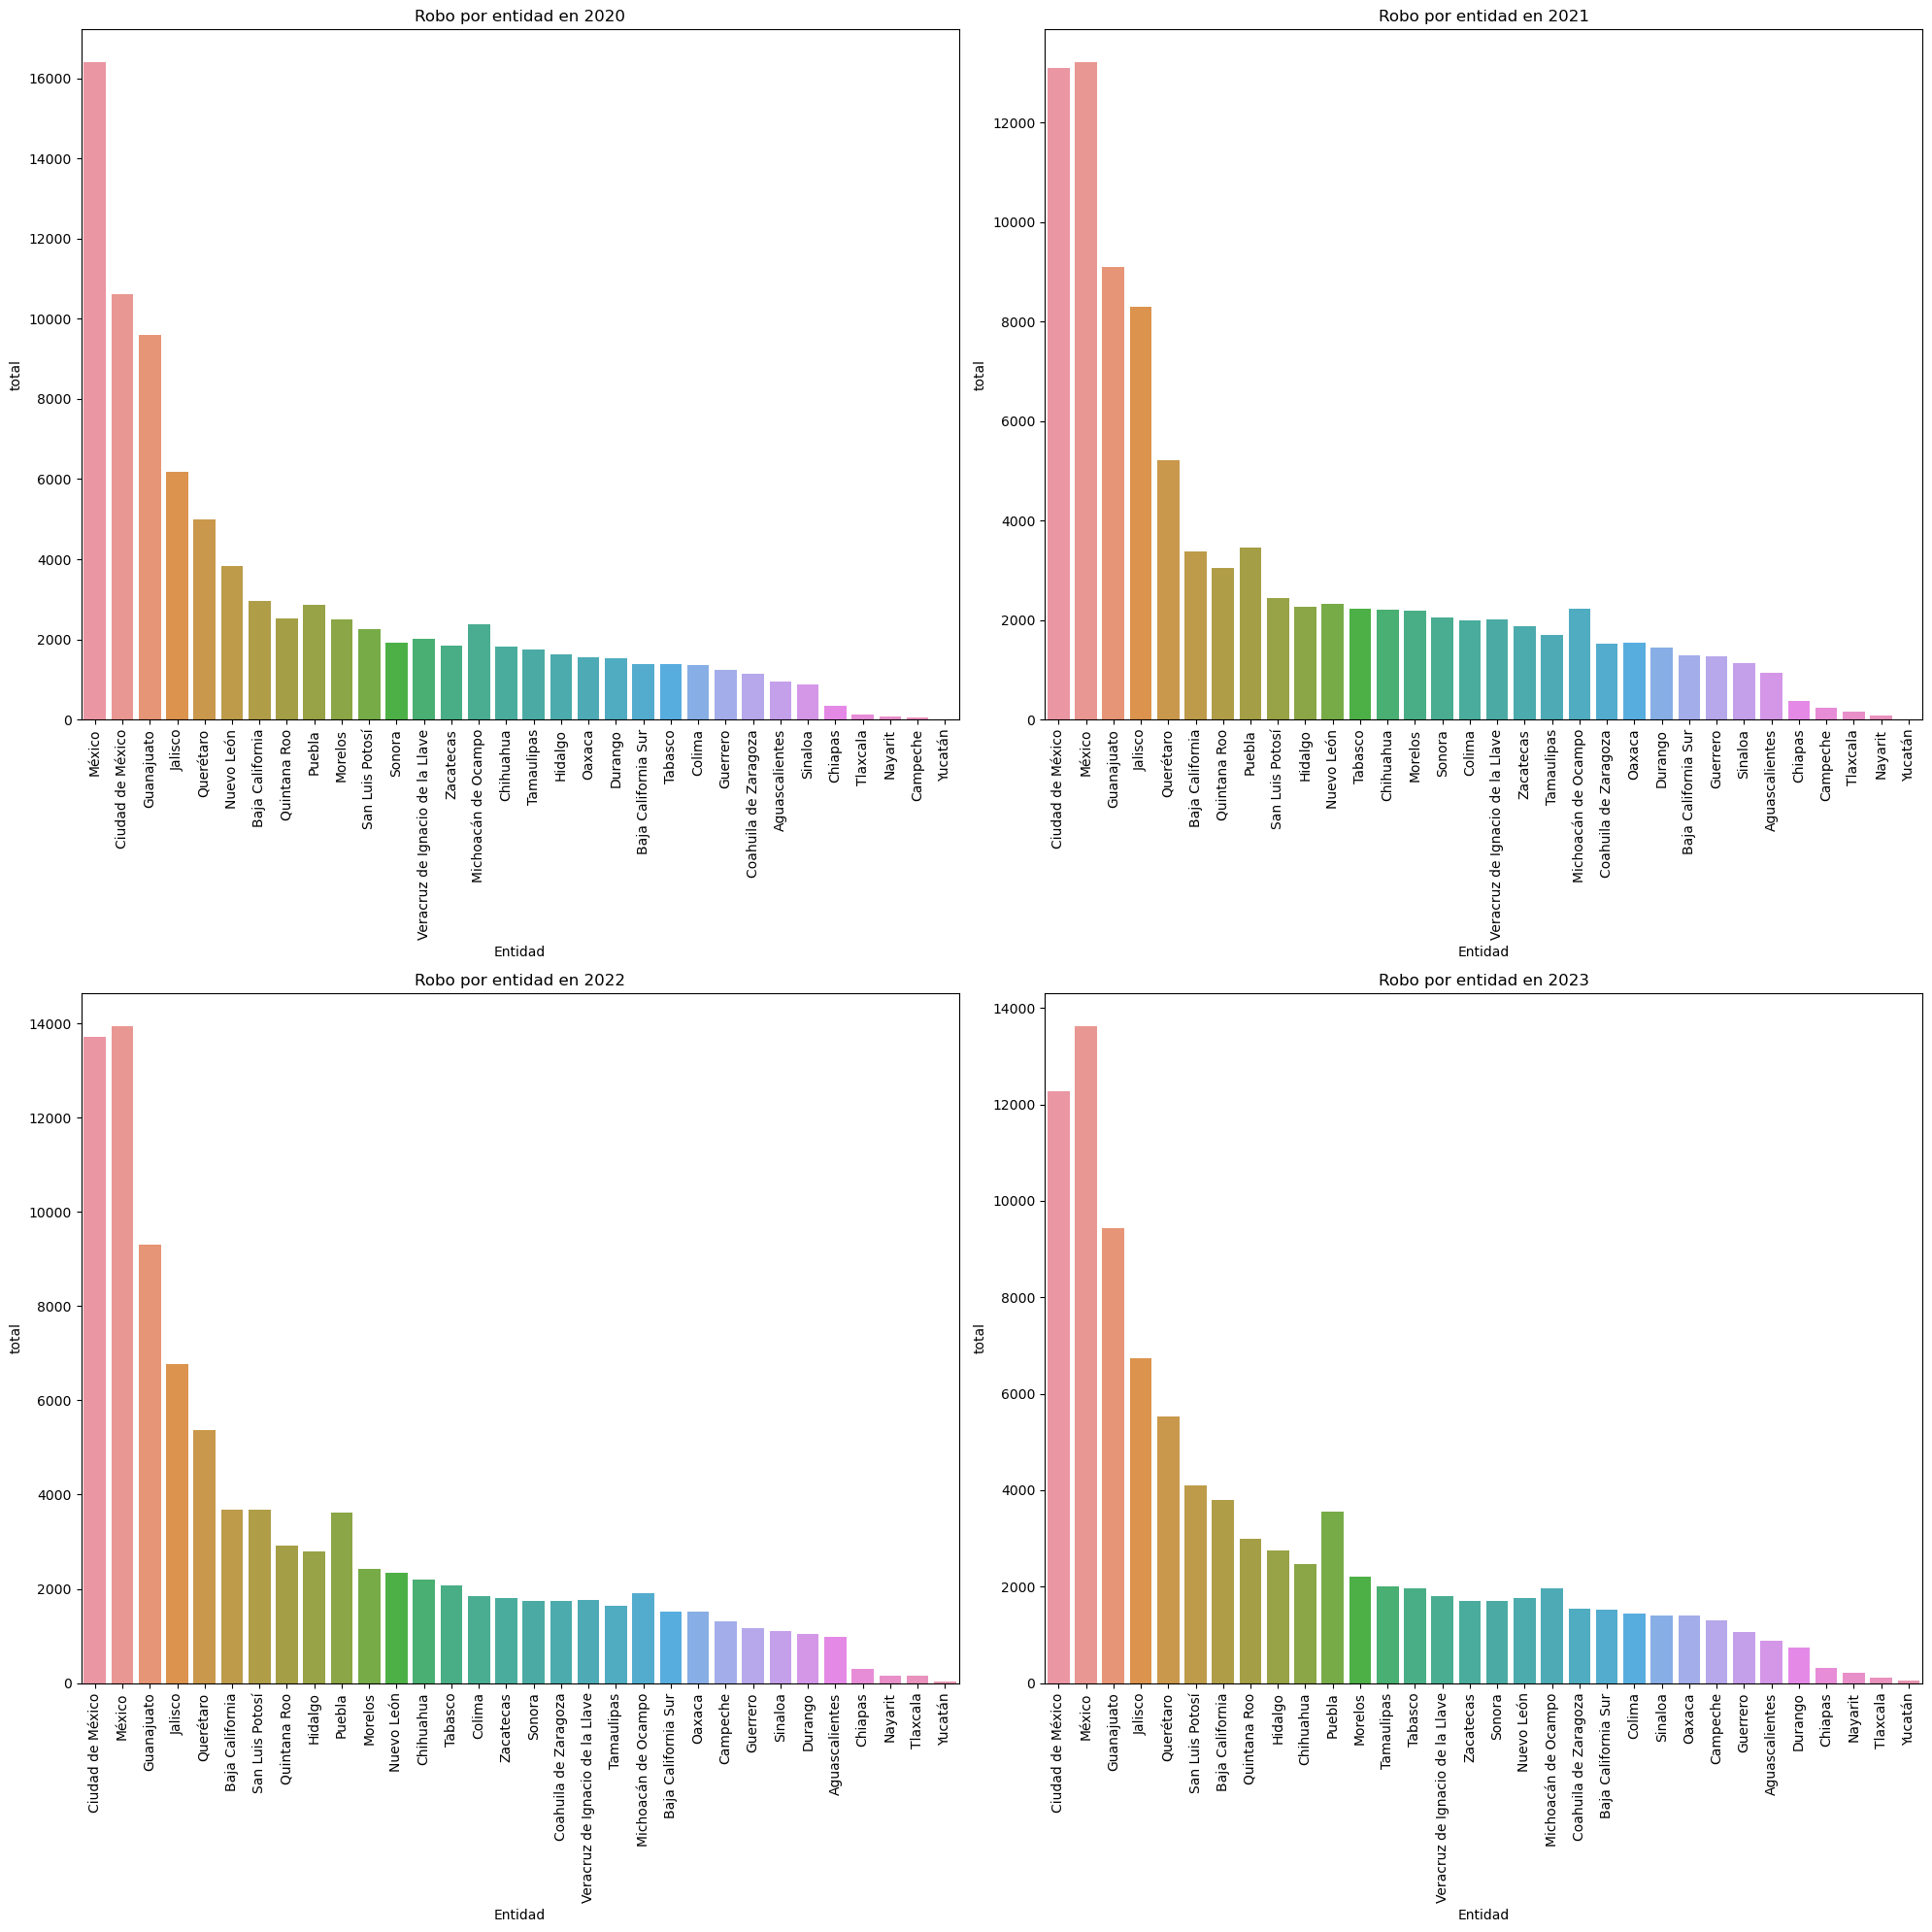

In [58]:
# Crear la figura con subplots (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Gráfica para 2020
df_2020_sorted = df_2020_1_filtered[df_2020_1_filtered['Tipo de delito'] == 'Robo'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[0, 0], x='Entidad', y='total', data=df_2020_sorted, errorbar=None)
axes[0, 0].set_title('Robo por entidad en 2020')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

# Gráfica para 2021
df_2021_sorted = df_2021_1_filtered[df_2021_1_filtered['Tipo de delito'] == 'Robo'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[0, 1], x='Entidad', y='total', data=df_2021_sorted, errorbar=None)
axes[0, 1].set_title('Robo por entidad en 2021')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)

# Gráfica para 2022
df_2022_sorted = df_2022_1_filtered[df_2022_1_filtered['Tipo de delito'] == 'Robo'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[1, 0], x='Entidad', y='total', data=df_2022_sorted, errorbar=None)
axes[1, 0].set_title('Robo por entidad en 2022')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)

# Gráfica para 2023
df_2023_sorted = df_2023_1_filtered[df_2023_1_filtered['Tipo de delito'] == 'Robo'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[1, 1], x='Entidad', y='total', data=df_2023_sorted, errorbar=None)
axes[1, 1].set_title('Robo por entidad en 2023')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar todas las gráficas concatenadas
plt.show()


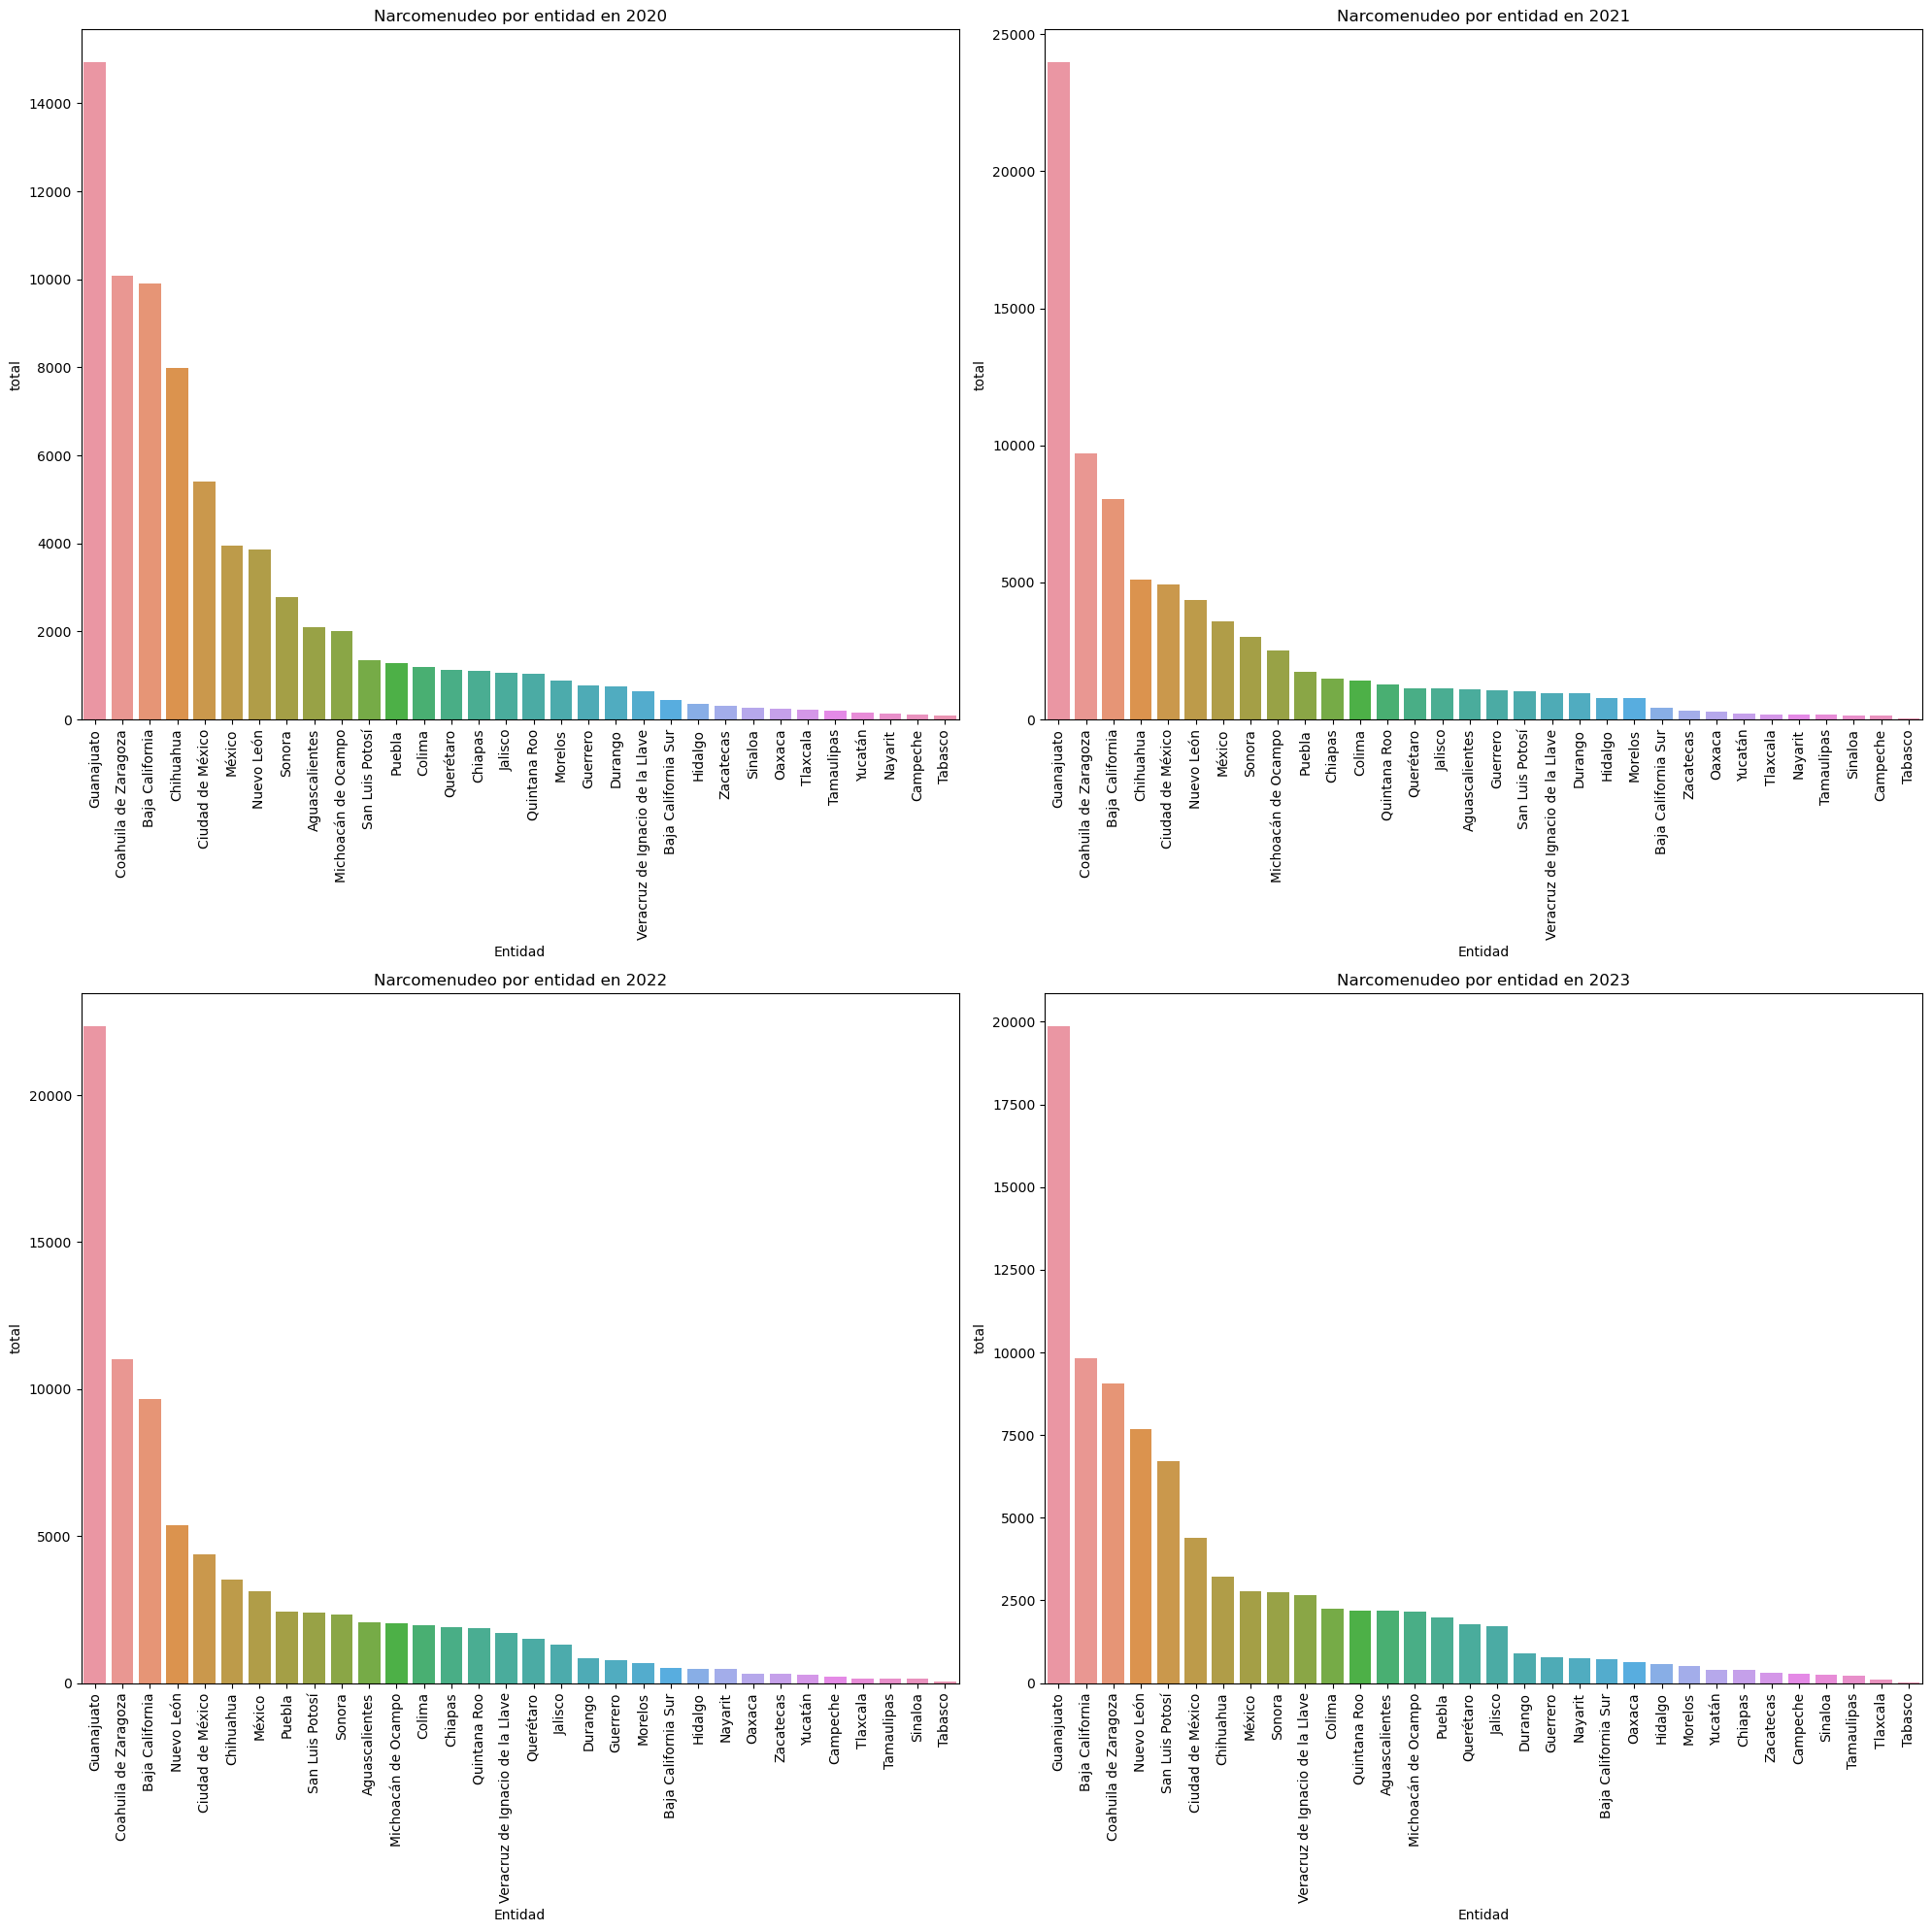

In [60]:
# Crear la figura con subplots (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Gráfica para 2020
df_2020_sorted = df_2020_1_filtered[df_2020_1_filtered['Tipo de delito'] == 'Narcomenudeo'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[0, 0], x='Entidad', y='total', data=df_2020_sorted, errorbar=None)
axes[0, 0].set_title('Narcomenudeo por entidad en 2020')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

# Gráfica para 2021
df_2021_sorted = df_2021_1_filtered[df_2021_1_filtered['Tipo de delito'] == 'Narcomenudeo'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[0, 1], x='Entidad', y='total', data=df_2021_sorted, errorbar=None)
axes[0, 1].set_title('Narcomenudeo por entidad en 2021')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)

# Gráfica para 2022
df_2022_sorted = df_2022_1_filtered[df_2022_1_filtered['Tipo de delito'] == 'Narcomenudeo'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[1, 0], x='Entidad', y='total', data=df_2022_sorted, errorbar=None)
axes[1, 0].set_title('Narcomenudeo por entidad en 2022')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)

# Gráfica para 2023
df_2023_sorted = df_2023_1_filtered[df_2023_1_filtered['Tipo de delito'] == 'Narcomenudeo'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[1, 1], x='Entidad', y='total', data=df_2023_sorted, errorbar=None)
axes[1, 1].set_title('Narcomenudeo por entidad en 2023')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar todas las gráficas concatenadas
plt.show()


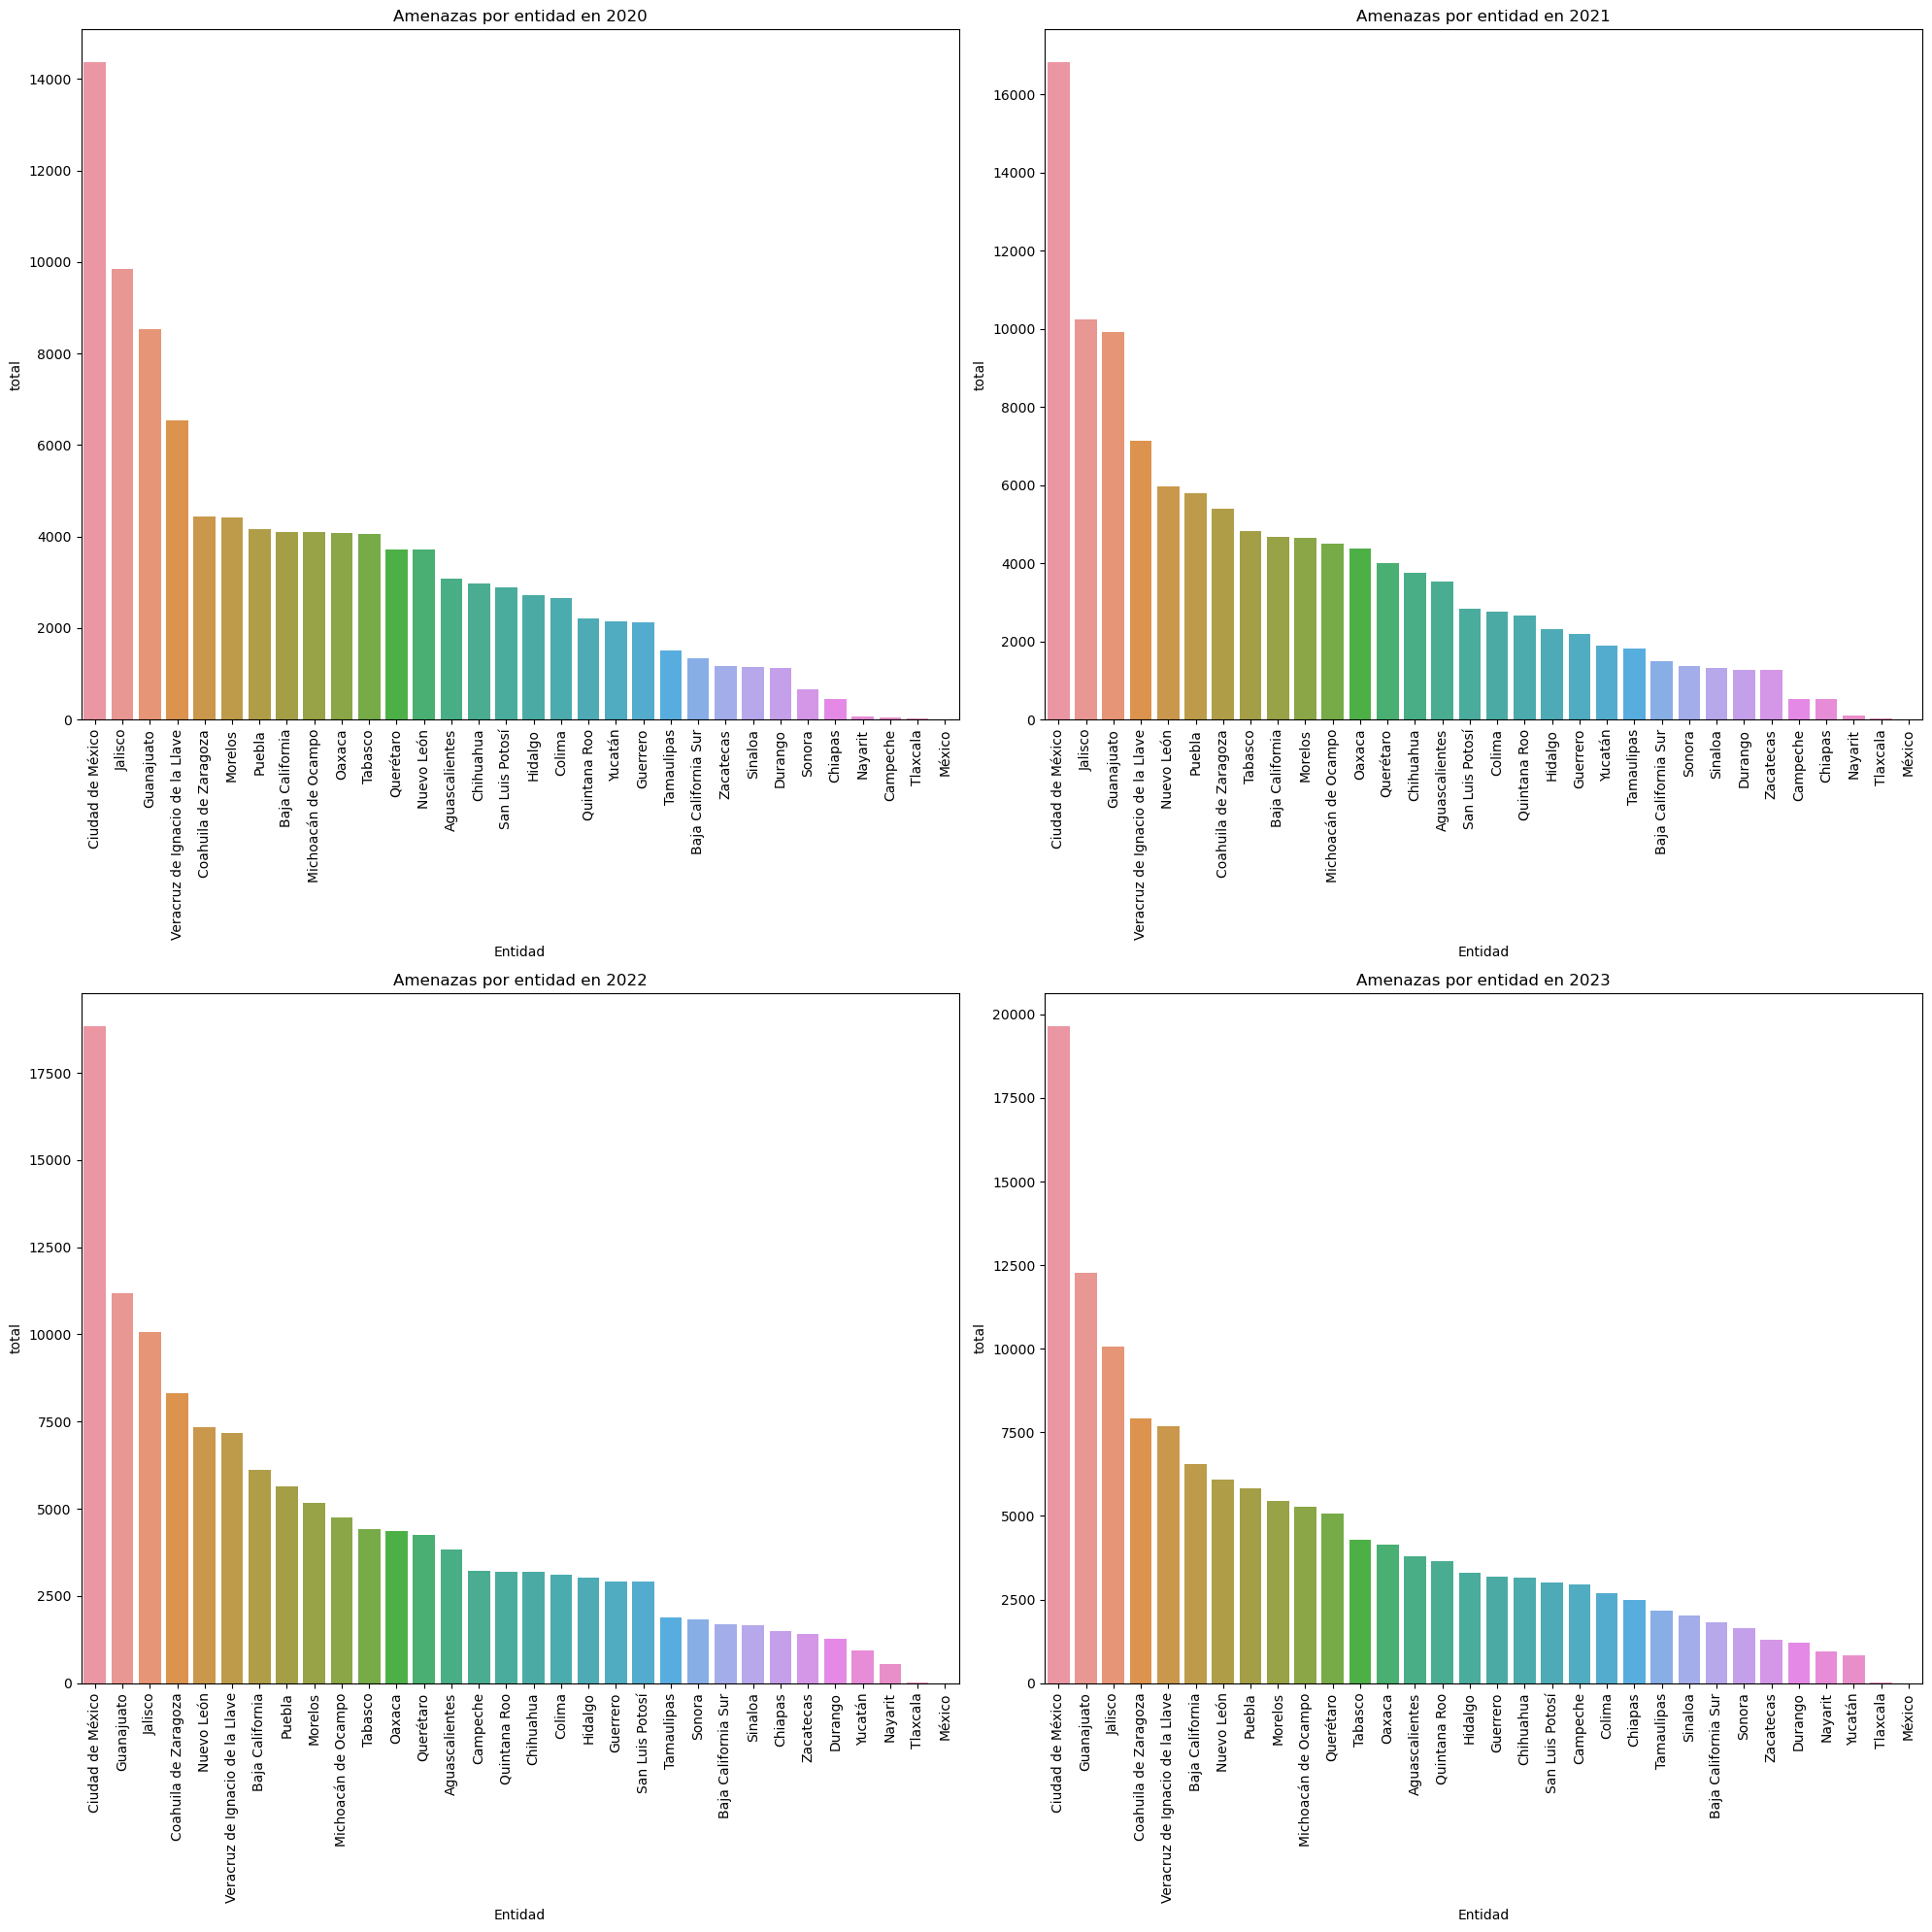

In [61]:
# Crear la figura con subplots (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Gráfica para 2020
df_2020_sorted = df_2020_1_filtered[df_2020_1_filtered['Subtipo de delito'] == 'Amenazas'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[0, 0], x='Entidad', y='total', data=df_2020_sorted, errorbar=None)
axes[0, 0].set_title('Amenazas por entidad en 2020')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

# Gráfica para 2021
df_2021_sorted = df_2021_1_filtered[df_2021_1_filtered['Subtipo de delito'] == 'Amenazas'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[0, 1], x='Entidad', y='total', data=df_2021_sorted, errorbar=None)
axes[0, 1].set_title('Amenazas por entidad en 2021')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)

# Gráfica para 2022
df_2022_sorted = df_2022_1_filtered[df_2022_1_filtered['Subtipo de delito'] == 'Amenazas'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[1, 0], x='Entidad', y='total', data=df_2022_sorted, errorbar=None)
axes[1, 0].set_title('Amenazas por entidad en 2022')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)

# Gráfica para 2023
df_2023_sorted = df_2023_1_filtered[df_2023_1_filtered['Subtipo de delito'] == 'Amenazas'].sort_values(by='total', ascending=False)
sns.barplot(ax=axes[1, 1], x='Entidad', y='total', data=df_2023_sorted, errorbar=None)
axes[1, 1].set_title('Amenazas por entidad en 2023')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar todas las gráficas concatenadas
plt.show()
